In [133]:
# import numpy as np
import pandas as pd
import config # a python file that contains path to TIMSS data files
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
ml_data_1 = pd.read_csv(config.ml_data_1, index_col=False)

In [135]:
x = ml_data_1.drop(columns='mean_PV')
x.sample()

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I
6095,No,None or very few (0–10 books),Agree a little,Agree a little,Once or twice a month,Agree a little,Agree a little,Every or almost every lesson,Disagree a little,Agree a little


In [54]:
y = ml_data_1.mean_PV
y.sample()

3201    460.881686
Name: mean_PV, dtype: float64

In [55]:
from kmodes.kmodes import KModes

# Instantiate the k-modes model
km = KModes(n_clusters=6, init='Huang', n_init=5, verbose=1, n_jobs=1)

# Fit the model to your categorical data
clusters = km.fit_predict(x)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2143, cost: 30948.0
Run 1, iteration: 2/100, moves: 165, cost: 30948.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2651, cost: 29344.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2154, cost: 29862.0
Run 3, iteration: 2/100, moves: 1475, cost: 29862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2042, cost: 30419.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3180, cost: 30684.0
Best run was number 2


In [124]:
# Print the cluster centroids
print(km.cluster_centroids_)

[['No' 'None or very few (0–10 books)' 'Agree a little' 'Agree a little'
  'Never' 'Agree a little' 'Agree a little' 'Some lessons' 'Agree a lot'
  'Agree a lot']
 ['No' 'None or very few (0–10 books)' 'Agree a lot' 'Agree a lot'
  'Never' 'Agree a little' 'Agree a lot' 'Every or almost every lesson'
  'Agree a little' 'Agree a lot']
 ['No' 'None or very few (0–10 books)' 'Agree a lot' 'Agree a lot'
  'Never' 'Agree a little' 'Agree a lot' 'Some lessons' 'Disagree a lot'
  'Agree a lot']
 ['Yes' 'None or very few (0–10 books)' 'Agree a lot' 'Agree a lot'
  'Never' 'Agree a lot' 'Agree a lot' 'Some lessons' 'Agree a little'
  'Agree a lot']
 ['No' 'None or very few (0–10 books)' 'Agree a lot' 'Agree a lot'
  'Never' 'Agree a lot' 'Agree a lot' 'About half the lessons'
  'Agree a lot' 'Agree a lot']
 ['Yes' 'Enough to fill one shelf (11–25 books)' 'Agree a lot'
  'Agree a lot' 'Never' 'Agree a lot' 'Agree a lot' 'Never' 'Agree a lot'
  'Agree a lot']]


In [56]:
clusters.max()

5

In [57]:
clusters

array([3, 3, 3, ..., 3, 4, 5], dtype=uint16)

In [81]:
# Test cluster attribution: The following data is the same as in row:3141 of the current clustered data,
# and should be in cluster 5
km.predict([['Yes','Enough to fill one shelf (11–25 books)','Disagree a little','Agree a little','At least once a week','Agree a lot','Agree a lot','Never','Agree a lot','Agree a lot']])

array([5], dtype=uint16)

The silhouette score is a metric used to evaluate the quality of clustering results. It measures how similar each data point in one cluster is to data points in the same cluster compared to the nearest neighboring cluster. A higher silhouette score indicates better-defined clusters.

The silhouette_score function in scikit-learn requires numerical data, and it cannot handle categorical data with string values directly. To use the silhouette score for clustering evaluation with categorical data, we need to preprocess data appropriately to convert categorical features into numerical format. One common technique for this purpose is one-hot encoding.

Here are the steps to prepare categorical data for silhouette score calculation:

One-Hot Encoding: Converts categorical data into a one-hot encoded format. Each unique category within a categorical feature becomes a new binary (0 or 1) feature. Most machine learning libraries, including scikit-learn, provide tools for one-hot encoding.

In [129]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [136]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit and transform your categorical data using OneHotEncoder
data_encoded = encoder.fit_transform(x)

# Fit and transform your categorical data using LabelEncoder
df_data_encoder = x.apply(le.fit_transform)
df_data_encoder.sample(10)



,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I
1934,0,1,1,0,2,1,1,2,1,1
3251,1,1,1,3,1,1,1,1,2,1
6685,0,0,1,1,2,1,1,2,1,1
6763,1,4,2,1,2,1,1,2,1,1
457,0,4,1,1,2,0,1,0,0,1
6830,0,4,0,2,2,2,0,3,2,0
1118,1,2,0,0,2,1,1,3,1,1
7587,0,4,3,3,1,0,2,1,0,0
2336,1,1,2,3,1,2,0,2,1,2
3635,0,4,0,0,1,1,1,3,1,1


In [139]:
# Renaming Columns in df_data_encoder

columns_old_names = ['BSBG05D','BSBG04','BSBG13E','BSBG13D','BSBG14A','BSBM16A','BSBM17D','BSBM18C','BSBM20E','BSBM20I']
columns_new_names = ['POSSESS_INTERNET','BOOKS','SCHOOL_PRIDE','TEACHER_FAIR','MEAN_TALK','ENJOY_LEARN_MATH','TEACHER_GOOD_EXPLAINER','DISORDER','JOB_INVOLVE_MATH','IMPORTANT_TO_DO_WELL']
# Convert the 2 above lists into a dictionary:
column_names= dict(zip(columns_old_names, columns_new_names))

# rename in the dataframe and the file:
df_data_encoder = df_data_encoder.rename(columns=column_names)
df_data_encoder.sample()

,POSSESS_INTERNET,BOOKS,SCHOOL_PRIDE,TEACHER_FAIR,MEAN_TALK,ENJOY_LEARN_MATH,TEACHER_GOOD_EXPLAINER,DISORDER,JOB_INVOLVE_MATH,IMPORTANT_TO_DO_WELL
1827,0,4,1,1,2,1,1,1,1,1


In [141]:
df_data_encoder['clusters'] = clusters
df_data_encoder.sample()

,POSSESS_INTERNET,BOOKS,SCHOOL_PRIDE,TEACHER_FAIR,MEAN_TALK,ENJOY_LEARN_MATH,TEACHER_GOOD_EXPLAINER,DISORDER,JOB_INVOLVE_MATH,IMPORTANT_TO_DO_WELL,clusters
6702,0,4,1,1,1,1,1,3,1,1,4


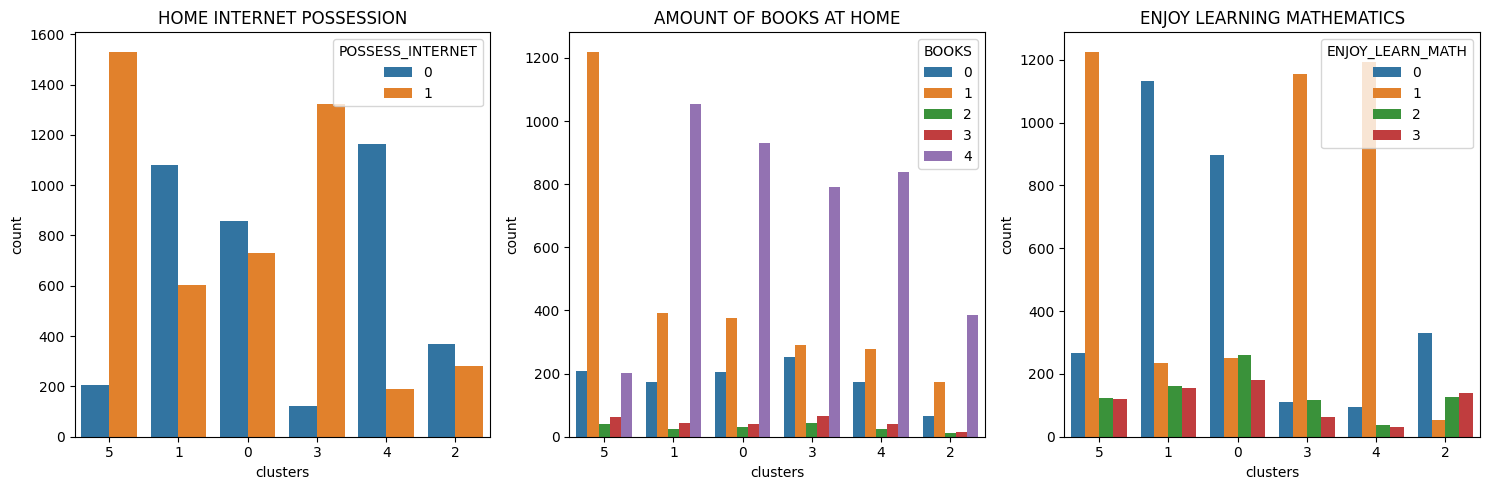

In [164]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['POSSESS_INTERNET'],ax=axs[0])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['BOOKS'],ax=axs[1])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['ENJOY_LEARN_MATH'],ax=axs[2])


axs[0].set_title('HOME INTERNET POSSESSION')
axs[1].set_title('AMOUNT OF BOOKS AT HOME')
axs[2].set_title('ENJOY LEARNING MATHEMATICS')
plt.tight_layout()
""""plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=2.4)
                    """
plt.show()

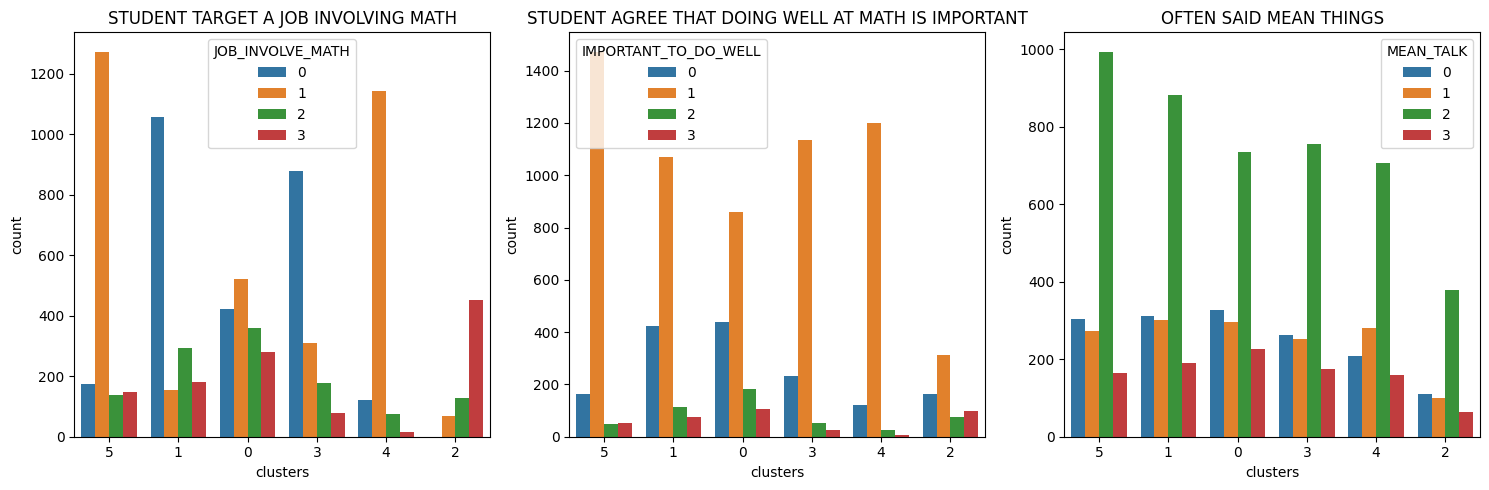

In [168]:
f, axs = plt.subplots(1,3,figsize = (15,5))

sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['JOB_INVOLVE_MATH'],ax=axs[0])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['IMPORTANT_TO_DO_WELL'],ax=axs[1])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['MEAN_TALK'],ax=axs[2])

axs[0].set_title('STUDENT TARGET A JOB INVOLVING MATH')
axs[1].set_title('STUDENT AGREE THAT DOING WELL AT MATH IS IMPORTANT')
axs[2].set_title('OFTEN SAID MEAN THINGS')

plt.tight_layout()
plt.show()

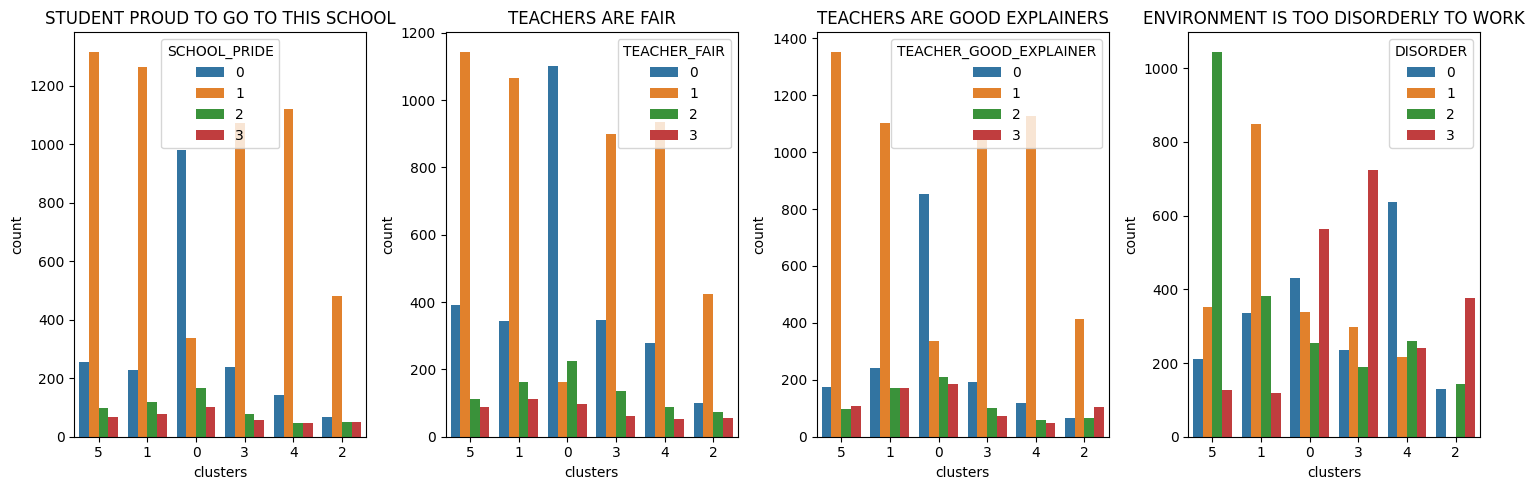

In [169]:
f, axs = plt.subplots(1,4,figsize = (15,5))

sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['SCHOOL_PRIDE'],ax=axs[0])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['TEACHER_FAIR'],ax=axs[1])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['TEACHER_GOOD_EXPLAINER'],ax=axs[2])
sns.countplot(x=df_data_encoder['clusters'],order=df_data_encoder['clusters'].value_counts().index,hue=df_data_encoder['DISORDER'],ax=axs[3])

axs[0].set_title('STUDENT PROUD TO GO TO THIS SCHOOL')
axs[1].set_title('TEACHERS ARE FAIR')
axs[2].set_title('TEACHERS ARE GOOD EXPLAINERS')
axs[3].set_title('ENVIRONMENT IS TOO DISORDERLY TO WORK')


plt.tight_layout()
plt.show()

In [91]:
data_encoded.dtype

dtype('float64')

Clustering with Numerical Data: Apply the clustering algorithm to the one-hot encoded data, which is now in a numerical format.

Calculate Silhouette Score: Let's calculate the silhouette score as follows:

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(data_encoded,clusters)  # "data" is your dataset, and "labels" are the cluster assignments
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.10178689504863322


The score of 0.1 in silhouette suggests that data points may be on or very close to the decision boundary between two neighboring clusters. 

In [92]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(data_encoded,clusters)
print("davies_bouldin_score:", dbi)

davies_bouldin_score: 2.5741721638882655


t-SNE Dimensionality Reduction:

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique that can be useful for visualizing clusters in a lower-dimensional space. It projects high-dimensional data into a 2D or 3D space while preserving the similarity between data points.

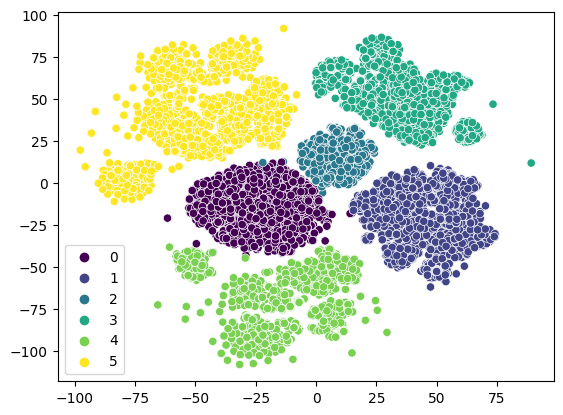

In [96]:
from sklearn.manifold import TSNE
import seaborn as sns

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(data_encoded)

# Create a scatterplot to visualize clusters
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=clusters, palette='viridis')
plt.show()


Now that we have our clusters, we will add their numbers to each data point in our labels data in order to separate each cluster alone and build a separate model for each:

In [99]:
x['clusters'] = clusters

In [100]:
x['labels'] = y

In [101]:
x.describe()

,clusters,labels
count,8458.000000,8458.000000
mean,2.532514,385.328560
std,1.823200,62.364477
min,0.000000,194.209476
25%,1.000000,341.444794
50%,3.000000,379.916982
75%,4.000000,423.390834
max,5.000000,649.182768


In [102]:
x.sample(5)

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,clusters,labels
3956,Yes,None or very few (0–10 books),Agree a little,Agree a lot,At least once a week,Agree a little,Agree a lot,Never,Agree a lot,Agree a lot,5,408.957482
2678,No,None or very few (0–10 books),Agree a lot,Agree a lot,Once or twice a month,Agree a lot,Agree a lot,Every or almost every lesson,Agree a little,Agree a little,1,371.428258
5557,Yes,None or very few (0–10 books),Disagree a little,Disagree a lot,At least once a week,Agree a lot,Disagree a little,Every or almost every lesson,Agree a lot,Disagree a lot,3,462.164768
7526,Yes,None or very few (0–10 books),Agree a little,Disagree a little,A few times a year,Disagree a little,Disagree a lot,Every or almost every lesson,Disagree a little,Disagree a little,0,388.081074
5812,No,None or very few (0–10 books),Agree a lot,Agree a lot,At least once a week,Disagree a lot,Disagree a lot,About half the lessons,Disagree a lot,Disagree a lot,2,330.994958


Let's see what clusters do we have:

In [103]:
list_of_clusters = x['clusters'].unique()
list_of_clusters

array([3, 4, 5, 1, 2, 0], dtype=uint16)

In [104]:
x[['labels','clusters']]

,labels,clusters
0,410.811348,3
1,433.181462,3
2,418.027694,3
3,467.300384,4
4,362.964464,4
...,...,...
8453,401.279696,3
8454,438.474212,1
8455,401.756130,3
8456,312.155188,4


Let's put each cluster in a different dataframe:

In [105]:
y_0 = x[['labels','clusters']].query('clusters==0')
x_0 = x.query('clusters==0')
y_1 = x[['labels','clusters']].query('clusters==1')
x_1 = x.query('clusters==1')
y_2 = x[['labels','clusters']].query('clusters==2')
x_2 = x.query('clusters==2')
y_3 = x[['labels','clusters']].query('clusters==3')
x_3 = x.query('clusters==3')
y_4 = x[['labels','clusters']].query('clusters==4')
x_4 = x.query('clusters==4')
y_5 = x[['labels','clusters']].query('clusters==4')
x_5 = x[x['clusters'] ==4]

In [106]:
x_2.count()

BSBG05D     651
BSBG04      651
BSBG13E     651
BSBG13D     651
BSBG14A     651
BSBM16A     651
BSBM17D     651
BSBM18C     651
BSBM20E     651
BSBM20I     651
clusters    651
labels      651
dtype: int64

In [108]:
x_2.sample()

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,clusters,labels
8226,Yes,Enough to fill one bookcase (26–100 books),Agree a little,Agree a lot,A few times a year,Agree a little,Disagree a little,Never,Disagree a lot,Agree a little,2,408.603776


Let's do some hyperparameters tuning of xgboost algorithm executed on "x_2" dataset using optuna:

In [109]:
import optuna
import xgboost as xgb
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [110]:
x_2.columns

Index(['BSBG05D', 'BSBG04', 'BSBG13E', 'BSBG13D', 'BSBG14A', 'BSBM16A',
       'BSBM17D', 'BSBM18C', 'BSBM20E', 'BSBM20I', 'clusters', 'labels'],
      dtype='object')

Let's keep only necessary features by deleting the 'clusters'  and 'labels' columns

In [111]:
df_list_features = [x_0, x_1, x_2, x_3, x_4, x_5]
df_list_labels = [y_0, y_1, y_3, y_4, y_5]
for df in df_list_features:
    del df['clusters']
    del df['labels']
for df in df_list_labels:
    del df['clusters']

In [112]:
x_2.columns

Index(['BSBG05D', 'BSBG04', 'BSBG13E', 'BSBG13D', 'BSBG14A', 'BSBM16A',
       'BSBM17D', 'BSBM18C', 'BSBM20E', 'BSBM20I'],
      dtype='object')

In [113]:
y_0.columns

Index(['labels'], dtype='object')

Let's start defining our objective function used by optuna, where we will define our parameters:

In [ ]:
#The following line is just to display, on hover, parameters of xgboost regressor

xgb.XGBRFRegressor()

In [114]:
x_0.dtypes

BSBG05D    object
BSBG04     object
BSBG13E    object
BSBG13D    object
BSBG14A    object
BSBM16A    object
BSBM17D    object
BSBM18C    object
BSBM20E    object
BSBM20I    object
dtype: object

In [115]:
x_0 = x_0.astype('category')
x_1 = x_1.astype('category')
x_2 = x_2.astype('category')
x_3 = x_3.astype('category')
x_4 = x_4.astype('category')
x_5 = x_5.astype('category')

In [116]:
x_2.dtypes

BSBG05D    category
BSBG04     category
BSBG13E    category
BSBG13D    category
BSBG14A    category
BSBM16A    category
BSBM17D    category
BSBM18C    category
BSBM20E    category
BSBM20I    category
dtype: object

In [117]:
def objective( trail, data = x_2, target = y_2):
    train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(data,target, test_size=.20, random_state=30)
    param = {
        'tree_method':'hist',
        'enable_categorical':True, # mandatory when we have categorical features
        'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
        'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
        'colsample_bytree':trail.suggest_categorical('colsample_bytree', [.1,.2,.3,.4,.5,.8,.9]),
        'subsample':trail.suggest_categorical('subsample', [.1,.2,.3,.4,.5,.6,.7,.8,.9]),
        'learning_rate':trail.suggest_categorical('learning_rate', [.00001,.0003,.02,.004,.5,1,10]),
        'n_estimator': 30000,
        'max_depth':trail.suggest_categorical('max_depth', [3,4,5,6,7,8,9,10,11]),
        'random_state': trail.suggest_categorical('random_state', [10,30,200,5000]),
        'min_child_weight': trail.suggest_int('min_child_weight',1,200),
        'verbosity': 3
    }
    xgb_x_2_model = xgb.XGBRFRegressor(**param)
    xgb_x_2_model.fit(train_x_2,train_y_2,eval_set = [(test_x_2,test_y_2)], verbose = True)
    prediction_xgb = xgb_x_2_model.predict(test_x_2)
    rmse = mean_squared_error(test_y_2,prediction_xgb)
    return rmse
    

In [118]:
find_param = optuna.create_study(direction='minimize')
find_param.optimize(objective, n_trials = 250)
find_param.best_params

[I 2023-11-07 17:07:56,737] A new study created in memory with name: no-name-05dd27dd-db9e-41a5-8292-9a5ae21fa8e1
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:07:56] ======== Monitor (0): HostSketchContainer ========
[17:07:56] AllReduce: 0.034197s, 1 calls @ 34197us

[17:07:56] MakeCuts: 0.038958s, 1 calls @ 38958us

[17:07:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:1635.44216


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:07:57,192] Trial 0 finished with value: 2674671.058327001 and parameters: {'lambda': 1.5554749343358449e-06, 'alpha': 0.0035003461944790983, 'colsample_bytree': 0.1, 'subsample': 0.4, 'learning_rate': 10, 'max_depth': 6, 'random_state': 200, 'min_child_weight': 152}. Best is trial 0 with value: 2674671.058327001.


[17:07:57] ======== Monitor (0): Learner ========
[17:07:57] Configure: 0.00693s, 1 calls @ 6930us

[17:07:57] EvalOneIter: 0.000151s, 1 calls @ 151us

[17:07:57] GetGradient: 1e-05s, 1 calls @ 10us

[17:07:57] PredictRaw: 5e-06s, 1 calls @ 5us

[17:07:57] UpdateOneIter: 0.05414s, 1 calls @ 54140us

[17:07:57] ======== Monitor (0): GBTree ========
[17:07:57] BoostNewTrees: 0.030734s, 1 calls @ 30734us

[17:07:57] CommitModel: 5e-06s, 1 calls @ 5us

[17:07:57] ======== Monitor (0): HistUpdater ========
[17:07:57] EvaluateSplits: 0.001435s, 200 calls @ 1435us

[17:07:57] InitData: 0.003068s, 200 calls @ 3068us

[17:07:57] InitRoot: 0.023526s, 200 calls @ 23526us

[17:07:57] LeafPartition: 2.6e-05s, 200 calls @ 26us

[17:07:57] UpdateTree: 0.026831s, 200 calls @ 26831us

[17:07:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:07:57] ======== Monitor (0): HostSketchContainer ========
[17:07:57] AllReduce: 9e-06s, 1 calls @ 9us

[17:07:57] MakeCuts: 6.7e-05s, 1 calls @ 67us

[17:07:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:184.54190


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:07:57,710] Trial 1 finished with value: 34055.71229721085 and parameters: {'lambda': 2.5540380350953353e-06, 'alpha': 9.198310066158505e-06, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 0.02, 'max_depth': 9, 'random_state': 30, 'min_child_weight': 122}. Best is trial 1 with value: 34055.71229721085.


[17:07:57] ======== Monitor (0): Learner ========
[17:07:57] Configure: 0.000977s, 1 calls @ 977us

[17:07:57] EvalOneIter: 0.000357s, 1 calls @ 357us

[17:07:57] GetGradient: 6e-06s, 1 calls @ 6us

[17:07:57] PredictRaw: 3e-06s, 1 calls @ 3us

[17:07:57] UpdateOneIter: 0.049882s, 1 calls @ 49882us

[17:07:57] ======== Monitor (0): GBTree ========
[17:07:57] BoostNewTrees: 0.048718s, 1 calls @ 48718us

[17:07:57] CommitModel: 5e-06s, 1 calls @ 5us

[17:07:57] ======== Monitor (0): HistUpdater ========
[17:07:57] BuildHistogram: 0.003491s, 179 calls @ 3491us

[17:07:57] EvaluateSplits: 0.003655s, 379 calls @ 3655us

[17:07:57] InitData: 0.001928s, 200 calls @ 1928us

[17:07:57] InitRoot: 0.016355s, 200 calls @ 16355us

[17:07:57] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:07:57] UpdatePosition: 0.01262s, 179 calls @ 12620us

[17:07:57] UpdateTree: 0.037247s, 200 calls @ 37247us

[17:07:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:07:57] ======== Monitor (0):

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:187.40510


[I 2023-11-07 17:07:57,929] Trial 2 finished with value: 35120.67390423223 and parameters: {'lambda': 0.04911829514996757, 'alpha': 1.3407310638245883e-10, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.004, 'max_depth': 9, 'random_state': 10, 'min_child_weight': 65}. Best is trial 1 with value: 34055.71229721085.


[17:07:57] ======== Monitor (0): Learner ========
[17:07:57] Configure: 0.000808s, 1 calls @ 808us

[17:07:57] EvalOneIter: 0.0004s, 1 calls @ 400us

[17:07:57] GetGradient: 7e-06s, 1 calls @ 7us

[17:07:57] PredictRaw: 2e-06s, 1 calls @ 2us

[17:07:57] UpdateOneIter: 0.09725s, 1 calls @ 97250us

[17:07:57] ======== Monitor (0): GBTree ========
[17:07:57] BoostNewTrees: 0.096348s, 1 calls @ 96348us

[17:07:57] CommitModel: 5e-06s, 1 calls @ 5us

[17:07:57] ======== Monitor (0): HistUpdater ========
[17:07:57] BuildHistogram: 0.047263s, 292 calls @ 47263us

[17:07:57] EvaluateSplits: 0.005982s, 492 calls @ 5982us

[17:07:57] InitData: 0.004452s, 200 calls @ 4452us

[17:07:57] InitRoot: 0.013743s, 200 calls @ 13743us

[17:07:57] LeafPartition: 3e-05s, 200 calls @ 30us

[17:07:57] UpdatePosition: 0.014777s, 292 calls @ 14777us

[17:07:57] UpdateTree: 0.085404s, 200 calls @ 85404us

[17:07:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:07:57] ======== Monitor (0): Ho

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:07:58,062] Trial 3 finished with value: 35369.3422462718 and parameters: {'lambda': 4.

[17:07:58] ======== Monitor (0): Learner ========
[17:07:58] Configure: 0.000965s, 1 calls @ 965us

[17:07:58] EvalOneIter: 0.000156s, 1 calls @ 156us

[17:07:58] GetGradient: 7e-06s, 1 calls @ 7us

[17:07:58] PredictRaw: 2e-06s, 1 calls @ 2us

[17:07:58] UpdateOneIter: 0.031508s, 1 calls @ 31508us

[17:07:58] ======== Monitor (0): GBTree ========
[17:07:58] BoostNewTrees: 0.030434s, 1 calls @ 30434us

[17:07:58] CommitModel: 5e-06s, 1 calls @ 5us

[17:07:58] ======== Monitor (0): HistUpdater ========
[17:07:58] EvaluateSplits: 0.001485s, 200 calls @ 1485us

[17:07:58] InitData: 0.006023s, 200 calls @ 6023us

[17:07:58] InitRoot: 0.019833s, 200 calls @ 19833us

[17:07:58] LeafPartition: 2.6e-05s, 200 calls @ 26us

[17:07:58] UpdateTree: 0.026085s, 200 calls @ 26085us

[17:07:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:07:58] ======== Monitor (0): HostSketchContainer ========
[17:07:58] AllReduce: 6e-06s, 1 calls @ 6us

[17:07:58] MakeCuts: 1.8e-05s, 1 calls @ 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:07:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1632.81398


[I 2023-11-07 17:07:58,411] Trial 4 finished with value: 2666081.445769434 and parameters: {'lambda': 0.00042138655108528206, 'alpha': 1.8422682214118262e-07, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 10, 'max_depth': 3, 'random_state': 5000, 'min_child_weight': 63}. Best is trial 1 with value: 34055.71229721085.


[17:07:58] ======== Monitor (0): Learner ========
[17:07:58] Configure: 0.000902s, 1 calls @ 902us

[17:07:58] EvalOneIter: 0.00117s, 1 calls @ 1170us

[17:07:58] GetGradient: 9e-06s, 1 calls @ 9us

[17:07:58] PredictRaw: 4e-06s, 1 calls @ 4us

[17:07:58] UpdateOneIter: 0.219075s, 1 calls @ 219075us

[17:07:58] ======== Monitor (0): GBTree ========
[17:07:58] BoostNewTrees: 0.185196s, 1 calls @ 185196us

[17:07:58] CommitModel: 5e-06s, 1 calls @ 5us

[17:07:58] ======== Monitor (0): HistUpdater ========
[17:07:58] BuildHistogram: 0.033208s, 242 calls @ 33208us

[17:07:58] EvaluateSplits: 0.03946s, 442 calls @ 39460us

[17:07:58] InitData: 0.005925s, 200 calls @ 5925us

[17:07:58] InitRoot: 0.080868s, 200 calls @ 80868us

[17:07:58] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:07:58] UpdatePosition: 0.044928s, 332 calls @ 44928us

[17:07:58] UpdateTree: 0.180666s, 200 calls @ 180666us

[17:07:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:07:58] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:07:58,547] Trial 5 finished with value: 34057.61261658369 and parameters: {'lambda': 1

[17:07:58] ======== Monitor (0): Learner ========
[17:07:58] Configure: 0.000937s, 1 calls @ 937us

[17:07:58] EvalOneIter: 0.000182s, 1 calls @ 182us

[17:07:58] GetGradient: 8e-06s, 1 calls @ 8us

[17:07:58] PredictRaw: 4e-06s, 1 calls @ 4us

[17:07:58] UpdateOneIter: 0.029726s, 1 calls @ 29726us

[17:07:58] ======== Monitor (0): GBTree ========
[17:07:58] BoostNewTrees: 0.02073s, 1 calls @ 20730us

[17:07:58] CommitModel: 4e-06s, 1 calls @ 4us

[17:07:58] ======== Monitor (0): HistUpdater ========
[17:07:58] BuildHistogram: 0.000629s, 41 calls @ 629us

[17:07:58] EvaluateSplits: 0.003707s, 241 calls @ 3707us

[17:07:58] InitData: 0.00178s, 200 calls @ 1780us

[17:07:58] InitRoot: 0.006673s, 200 calls @ 6673us

[17:07:58] LeafPartition: 2.5e-05s, 200 calls @ 25us

[17:07:58] UpdatePosition: 0.001168s, 41 calls @ 1168us

[17:07:58] UpdateTree: 0.010985s, 200 calls @ 10985us

[17:07:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:07:58] ======== Monitor (0): HostSketchContainer ========
[17:07:58] AllReduce: 1e-05s, 1 calls @ 10us

[17:07:58] MakeCuts: 2.4e-05s, 1 calls @ 24us

[17:07:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:188.12126


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:07:58,808] Trial 6 finished with value: 35389.60950425619 and parameters: {'lambda': 1.9139029182874895e-05, 'alpha': 3.425367844104205e-06, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 0.0003, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 104}. Best is trial 1 with value: 34055.71229721085.


[17:07:58] ======== Monitor (0): Learner ========
[17:07:58] Configure: 0.001047s, 1 calls @ 1047us

[17:07:58] EvalOneIter: 0.000155s, 1 calls @ 155us

[17:07:58] GetGradient: 6e-06s, 1 calls @ 6us

[17:07:58] PredictRaw: 2e-06s, 1 calls @ 2us

[17:07:58] UpdateOneIter: 0.049304s, 1 calls @ 49304us

[17:07:58] ======== Monitor (0): GBTree ========
[17:07:58] BoostNewTrees: 0.048135s, 1 calls @ 48135us

[17:07:58] CommitModel: 1.2e-05s, 1 calls @ 12us

[17:07:58] ======== Monitor (0): HistUpdater ========
[17:07:58] EvaluateSplits: 0.001659s, 200 calls @ 1659us

[17:07:58] InitData: 0.010791s, 200 calls @ 10791us

[17:07:58] InitRoot: 0.021392s, 200 calls @ 21392us

[17:07:58] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:07:58] UpdateTree: 0.032431s, 200 calls @ 32431us

[17:07:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:07:58] ======== Monitor (0): HostSketchContainer ========
[17:07:58] AllReduce: 6e-06s, 1 calls @ 6us

[17:07:58] MakeCuts: 1.7e-05s, 1 calls @ 17us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:07:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:1633.51061


[I 2023-11-07 17:07:59,246] Trial 7 finished with value: 2668356.877458073 and parameters: {'lambda': 7.171593403276412, 'alpha': 0.0025233393472081887, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 10, 'max_depth': 3, 'random_state': 30, 'min_child_weight': 124}. Best is trial 1 with value: 34055.71229721085.


[17:07:59] ======== Monitor (0): Learner ========
[17:07:59] Configure: 0.005123s, 1 calls @ 5123us

[17:07:59] EvalOneIter: 0.000221s, 1 calls @ 221us

[17:07:59] GetGradient: 0.000619s, 1 calls @ 619us

[17:07:59] PredictRaw: 3e-05s, 1 calls @ 30us

[17:07:59] UpdateOneIter: 0.218797s, 1 calls @ 218797us

[17:07:59] ======== Monitor (0): GBTree ========
[17:07:59] BoostNewTrees: 0.16517s, 1 calls @ 165170us

[17:07:59] CommitModel: 5e-06s, 1 calls @ 5us

[17:07:59] ======== Monitor (0): HistUpdater ========
[17:07:59] BuildHistogram: 0.073239s, 99 calls @ 73239us

[17:07:59] EvaluateSplits: 0.020184s, 299 calls @ 20184us

[17:07:59] InitData: 0.008084s, 200 calls @ 8084us

[17:07:59] InitRoot: 0.046154s, 200 calls @ 46154us

[17:07:59] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:07:59] UpdatePosition: 0.013094s, 99 calls @ 13094us

[17:07:59] UpdateTree: 0.151089s, 200 calls @ 151089us

[17:07:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:07:59] ======== Mo

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:07:59,412] Trial 8 finished with value: 1136.7876545825532 and parameters: {'lambda': 

[17:07:59] ======== Monitor (0): Learner ========
[17:07:59] Configure: 0.000799s, 1 calls @ 799us

[17:07:59] EvalOneIter: 0.000183s, 1 calls @ 183us

[17:07:59] GetGradient: 7e-06s, 1 calls @ 7us

[17:07:59] PredictRaw: 3e-06s, 1 calls @ 3us

[17:07:59] UpdateOneIter: 0.032179s, 1 calls @ 32179us

[17:07:59] ======== Monitor (0): GBTree ========
[17:07:59] BoostNewTrees: 0.031291s, 1 calls @ 31291us

[17:07:59] CommitModel: 4e-06s, 1 calls @ 4us

[17:07:59] ======== Monitor (0): HistUpdater ========
[17:07:59] BuildHistogram: 0.000674s, 43 calls @ 674us

[17:07:59] EvaluateSplits: 0.002286s, 243 calls @ 2286us

[17:07:59] InitData: 0.005433s, 200 calls @ 5433us

[17:07:59] InitRoot: 0.005042s, 200 calls @ 5042us

[17:07:59] LeafPartition: 2.5e-05s, 200 calls @ 25us

[17:07:59] UpdatePosition: 0.013794s, 43 calls @ 13794us

[17:07:59] UpdateTree: 0.025641s, 200 calls @ 25641us

[17:07:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:07:59] ======== Monitor (0): HostSketchContainer ========
[17:07:59] AllReduce: 6e-06s, 1 calls @ 6us

[17:07:59] MakeCuts: 1.7e-05s, 1 calls @ 17us

[17:07:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:188.06739


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:07:59,641] Trial 9 finished with value: 35369.34421292284 and parameters: {'lambda': 1.5484133112403214e-10, 'alpha': 2.2103437672664556e-09, 'colsample_bytree': 0.1, 'subsample': 0.7, 'learning_rate': 0.0003, 'max_depth': 3, 'random_state': 30, 'min_child_weight': 57}. Best is trial 8 with value: 1136.7876545825532.


[17:07:59] ======== Monitor (0): Learner ========
[17:07:59] Configure: 0.001038s, 1 calls @ 1038us

[17:07:59] EvalOneIter: 0.000276s, 1 calls @ 276us

[17:07:59] GetGradient: 1e-05s, 1 calls @ 10us

[17:07:59] PredictRaw: 6e-06s, 1 calls @ 6us

[17:07:59] UpdateOneIter: 0.059315s, 1 calls @ 59315us

[17:07:59] ======== Monitor (0): GBTree ========
[17:07:59] BoostNewTrees: 0.048822s, 1 calls @ 48822us

[17:07:59] CommitModel: 6e-06s, 1 calls @ 6us

[17:07:59] ======== Monitor (0): HistUpdater ========
[17:07:59] BuildHistogram: 0.013486s, 177 calls @ 13486us

[17:07:59] EvaluateSplits: 0.004537s, 377 calls @ 4537us

[17:07:59] InitData: 0.001925s, 200 calls @ 1925us

[17:07:59] InitRoot: 0.014776s, 200 calls @ 14776us

[17:07:59] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:07:59] UpdatePosition: 0.011567s, 177 calls @ 11567us

[17:07:59] UpdateTree: 0.044064s, 200 calls @ 44064us

[17:07:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:07:59] ======== Monitor (0): HostSketchContainer ========
[17:07:59] AllReduce: 1e-05s, 1 calls @ 10us

[17:07:59] MakeCuts: 2.2e-05s, 1 calls @ 22us

[17:07:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.49277


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:07:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:00,010] Trial 10 finished with value: 1121.7659054351977 and parameters: {'lambda': 0.016641850558538368, 'alpha': 2.1552701268245165e-08, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 4}. Best is trial 10 with value: 1121.7659054351977.


[17:07:59] ======== Monitor (0): Learner ========
[17:07:59] Configure: 0.000916s, 1 calls @ 916us

[17:07:59] EvalOneIter: 0.008747s, 1 calls @ 8747us

[17:07:59] GetGradient: 9e-06s, 1 calls @ 9us

[17:07:59] PredictRaw: 4e-06s, 1 calls @ 4us

[17:07:59] UpdateOneIter: 0.097351s, 1 calls @ 97351us

[17:07:59] ======== Monitor (0): GBTree ========
[17:07:59] BoostNewTrees: 0.09163s, 1 calls @ 91630us

[17:07:59] CommitModel: 5e-06s, 1 calls @ 5us

[17:07:59] ======== Monitor (0): HistUpdater ========
[17:07:59] BuildHistogram: 0.007761s, 246 calls @ 7761us

[17:07:59] EvaluateSplits: 0.01866s, 446 calls @ 18660us

[17:07:59] InitData: 0.002013s, 200 calls @ 2013us

[17:07:59] InitRoot: 0.018748s, 200 calls @ 18748us

[17:07:59] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:07:59] UpdatePosition: 0.040212s, 246 calls @ 40212us

[17:07:59] UpdateTree: 0.086438s, 200 calls @ 86438us

[17:07:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:00] ======== Monitor (0): HostSketchContainer ========
[17:08:00] AllReduce: 7e-06s, 1 calls @ 7us

[17:08:00] MakeCuts: 1.9e-05s, 1 calls @ 19us

[17:08:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.49182


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:00,498] Trial 11 finished with value: 1121.701771681214 and parameters: {'lambda': 0.007874644895945507, 'alpha': 1.7682237681518026e-08, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 13}. Best is trial 11 with value: 1121.701771681214.


[17:08:00] ======== Monitor (0): Learner ========
[17:08:00] Configure: 0.000996s, 1 calls @ 996us

[17:08:00] EvalOneIter: 0.000415s, 1 calls @ 415us

[17:08:00] GetGradient: 0.001883s, 1 calls @ 1883us

[17:08:00] PredictRaw: 6e-06s, 1 calls @ 6us

[17:08:00] UpdateOneIter: 0.187701s, 1 calls @ 187701us

[17:08:00] ======== Monitor (0): GBTree ========
[17:08:00] BoostNewTrees: 0.142648s, 1 calls @ 142648us

[17:08:00] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:00] ======== Monitor (0): HistUpdater ========
[17:08:00] BuildHistogram: 0.015865s, 244 calls @ 15865us

[17:08:00] EvaluateSplits: 0.021865s, 444 calls @ 21865us

[17:08:00] InitData: 0.017877s, 200 calls @ 17877us

[17:08:00] InitRoot: 0.049434s, 200 calls @ 49434us

[17:08:00] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:00] UpdatePosition: 0.033037s, 244 calls @ 33037us

[17:08:00] UpdateTree: 0.119484s, 200 calls @ 119484us

[17:08:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:00] ========

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.49277


[I 2023-11-07 17:08:00,793] Trial 12 finished with value: 1121.7659054351977 and parameters: {'lambda': 0.003207509041511641, 'alpha': 1.3837883507803922e-07, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 1}. Best is trial 11 with value: 1121.701771681214.


[17:08:00] ======== Monitor (0): Learner ========
[17:08:00] Configure: 0.000896s, 1 calls @ 896us

[17:08:00] EvalOneIter: 0.00033s, 1 calls @ 330us

[17:08:00] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:00] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:00] UpdateOneIter: 0.104996s, 1 calls @ 104996us

[17:08:00] ======== Monitor (0): GBTree ========
[17:08:00] BoostNewTrees: 0.103994s, 1 calls @ 103994us

[17:08:00] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:00] ======== Monitor (0): HistUpdater ========
[17:08:00] BuildHistogram: 0.013819s, 246 calls @ 13819us

[17:08:00] EvaluateSplits: 0.025304s, 446 calls @ 25304us

[17:08:00] InitData: 0.013372s, 200 calls @ 13372us

[17:08:00] InitRoot: 0.046477s, 200 calls @ 46477us

[17:08:00] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:00] UpdatePosition: 0.011262s, 246 calls @ 11262us

[17:08:00] UpdateTree: 0.088531s, 200 calls @ 88531us

[17:08:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:00] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:00,992] Trial 13 finished with value: 35389.04468768911 and parameters: {'lambda': 

[17:08:00] ======== Monitor (0): Learner ========
[17:08:00] Configure: 0.000852s, 1 calls @ 852us

[17:08:00] EvalOneIter: 0.000332s, 1 calls @ 332us

[17:08:00] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:00] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:00] UpdateOneIter: 0.050884s, 1 calls @ 50884us

[17:08:00] ======== Monitor (0): GBTree ========
[17:08:00] BoostNewTrees: 0.049935s, 1 calls @ 49935us

[17:08:00] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:00] ======== Monitor (0): HistUpdater ========
[17:08:00] BuildHistogram: 0.003471s, 246 calls @ 3471us

[17:08:00] EvaluateSplits: 0.006272s, 446 calls @ 6272us

[17:08:00] InitData: 0.00194s, 200 calls @ 1940us

[17:08:00] InitRoot: 0.022039s, 200 calls @ 22039us

[17:08:00] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:00] UpdatePosition: 0.015456s, 246 calls @ 15456us

[17:08:00] UpdateTree: 0.045943s, 200 calls @ 45943us

[17:08:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:01] ======== Monitor (0):

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:01,284] Trial 14 finished with value: 10002.634752852511 and parameters: {'lambda': 0.5514325302747952, 'alpha': 1.7134879662958806e-10, 'colsample_bytree': 0.2, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 33}. Best is trial 11 with value: 1121.701771681214.


[17:08:01] ======== Monitor (0): Learner ========
[17:08:01] Configure: 0.000874s, 1 calls @ 874us

[17:08:01] EvalOneIter: 0.000292s, 1 calls @ 292us

[17:08:01] GetGradient: 1.9e-05s, 1 calls @ 19us

[17:08:01] PredictRaw: 6e-06s, 1 calls @ 6us

[17:08:01] UpdateOneIter: 0.130547s, 1 calls @ 130547us

[17:08:01] ======== Monitor (0): GBTree ========
[17:08:01] BoostNewTrees: 0.115492s, 1 calls @ 115492us

[17:08:01] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:01] ======== Monitor (0): HistUpdater ========
[17:08:01] BuildHistogram: 0.016228s, 166 calls @ 16228us

[17:08:01] EvaluateSplits: 0.010499s, 366 calls @ 10499us

[17:08:01] InitData: 0.010743s, 200 calls @ 10743us

[17:08:01] InitRoot: 0.017509s, 200 calls @ 17509us

[17:08:01] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:01] UpdatePosition: 0.037023s, 166 calls @ 37023us

[17:08:01] UpdateTree: 0.091243s, 200 calls @ 91243us

[17:08:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:01] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:01,442] Trial 15 finished with value: 1108.3973237608266 and parameters: {'lambda':

[17:08:01] ======== Monitor (0): Learner ========
[17:08:01] Configure: 0.000827s, 1 calls @ 827us

[17:08:01] EvalOneIter: 0.000344s, 1 calls @ 344us

[17:08:01] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:01] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:01] UpdateOneIter: 0.038491s, 1 calls @ 38491us

[17:08:01] ======== Monitor (0): GBTree ========
[17:08:01] BoostNewTrees: 0.037576s, 1 calls @ 37576us

[17:08:01] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:01] ======== Monitor (0): HistUpdater ========
[17:08:01] BuildHistogram: 0.00942s, 166 calls @ 9420us

[17:08:01] EvaluateSplits: 0.004866s, 366 calls @ 4866us

[17:08:01] InitData: 0.001937s, 200 calls @ 1937us

[17:08:01] InitRoot: 0.00513s, 200 calls @ 5130us

[17:08:01] LeafPartition: 2.6e-05s, 200 calls @ 26us

[17:08:01] UpdatePosition: 0.013251s, 166 calls @ 13251us

[17:08:01] UpdateTree: 0.033569s, 200 calls @ 33569us

[17:08:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:01] ======== Monitor (0): HostSketchContainer ========
[17:08:01] AllReduce: 8e-06s, 1 calls @ 8us

[17:08:01] MakeCuts: 2.2e-05s, 1 calls @ 22us

[17:08:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.37792
[17:08:01] ======== Monitor (0): Learner ========
[17:08:01] Configure: 0.000864s, 1 calls @ 864us

[17:08:01] EvalOneIter: 0.000317s, 1 calls @ 317us

[17:08:01] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:01] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:01] UpdateOneIter: 0.033751s, 1 calls @ 33751us

[17:08:01] ======== Monitor (0): GBTree ========
[17:08:01] BoostNewTrees: 0.032653s, 1 calls @ 32653us

[17:08:01] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:01] ======== Monitor (0): HistUpdater ========
[17:08:01] BuildHistogram: 0.002095s, 109 calls @ 2095us

[17:08:01] EvaluateSplits: 0.003359s, 309 calls @ 3359us

[17:08:01] InitData: 0.005628s, 200 calls @ 5628us

[17:08:01] InitRoot: 0.012969s, 200 calls @ 12969us

[17:08:01] Lea

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:01,632] Trial 16 finished with value: 1114.08545663474 and parameters: {'lambda': 0.00031798597505759604, 'alpha': 7.670485565550736e-05, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 7, 'random_state': 5000, 'min_child_weight': 36}. Best is trial 15 with value: 1108.3973237608266.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_logunifor

[17:08:01] ======== Monitor (0): HostSketchContainer ========
[17:08:01] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:01] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.49721
[17:08:01] ======== Monitor (0): Learner ========
[17:08:01] Configure: 0.000875s, 1 calls @ 875us

[17:08:01] EvalOneIter: 0.000245s, 1 calls @ 245us

[17:08:01] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:01] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:01] UpdateOneIter: 0.099153s, 1 calls @ 99153us

[17:08:01] ======== Monitor (0): GBTree ========
[17:08:01] BoostNewTrees: 0.08378s, 1 calls @ 83780us

[17:08:01] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:01] ======== Monitor (0): HistUpdater ========
[17:08:01] BuildHistogram: 0.001567s, 96 calls @ 1567us

[17:08:01] EvaluateSplits: 0.002801s, 296 calls @ 2801us

[17:08:01] InitData: 0.003597s, 200 calls @ 3597us

[17:08:01] InitRoot: 0.032905s, 200 calls @ 32905us

[17:08:01] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:01] UpdatePosition: 0.03365s, 96 calls @ 33650us

[17:08:01] UpdateTree: 0.073211s, 200 calls @ 73211us

[17:08:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


[I 2023-11-07 17:08:01,961] Trial 17 finished with value: 1122.0633824707738 and parameters: {'lambda': 0.00016019691080852017, 'alpha': 0.00016455390545669677, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 7, 'random_state': 5000, 'min_child_weight': 42}. Best is trial 15 with value: 1108.3973237608266.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:02] ======== Monitor (0): HostSketchContainer ========
[17:08:02] AllReduce: 0.015791s, 1 calls @ 15791us

[17:08:02] MakeCuts: 0.025356s, 1 calls @ 25356us

[17:08:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:100.03944


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:02,409] Trial 18 finished with value: 10007.889242854148 and parameters: {'lambda': 0.00029998198439824136, 'alpha': 5.595466426203404e-05, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 0.5, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 75}. Best is trial 15 with value: 1108.3973237608266.


[17:08:02] ======== Monitor (0): Learner ========
[17:08:02] Configure: 0.001216s, 1 calls @ 1216us

[17:08:02] EvalOneIter: 0.000169s, 1 calls @ 169us

[17:08:02] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:02] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:02] UpdateOneIter: 0.035088s, 1 calls @ 35088us

[17:08:02] ======== Monitor (0): GBTree ========
[17:08:02] BoostNewTrees: 0.0235s, 1 calls @ 23500us

[17:08:02] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:02] ======== Monitor (0): HistUpdater ========
[17:08:02] EvaluateSplits: 0.006907s, 200 calls @ 6907us

[17:08:02] InitData: 0.001798s, 200 calls @ 1798us

[17:08:02] InitRoot: 0.015418s, 200 calls @ 15418us

[17:08:02] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:02] UpdateTree: 0.01744s, 200 calls @ 17440us

[17:08:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:02] ======== Monitor (0): HostSketchContainer ========
[17:08:02] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:02] MakeCuts: 1.5e-05s, 1 calls @ 15

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.11976


[I 2023-11-07 17:08:02,656] Trial 19 finished with value: 35389.04468768911 and parameters: {'lambda': 0.5130193385827883, 'alpha': 2.2517631926672367e-06, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1e-05, 'max_depth': 4, 'random_state': 5000, 'min_child_weight': 34}. Best is trial 15 with value: 1108.3973237608266.


[17:08:02] ======== Monitor (0): Learner ========
[17:08:02] Configure: 0.001604s, 1 calls @ 1604us

[17:08:02] EvalOneIter: 0.000459s, 1 calls @ 459us

[17:08:02] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:02] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:02] UpdateOneIter: 0.11368s, 1 calls @ 113680us

[17:08:02] ======== Monitor (0): GBTree ========
[17:08:02] BoostNewTrees: 0.107582s, 1 calls @ 107582us

[17:08:02] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:02] ======== Monitor (0): HistUpdater ========
[17:08:02] BuildHistogram: 0.037508s, 313 calls @ 37508us

[17:08:02] EvaluateSplits: 0.015502s, 513 calls @ 15502us

[17:08:02] InitData: 0.002162s, 200 calls @ 2162us

[17:08:02] InitRoot: 0.007375s, 200 calls @ 7375us

[17:08:02] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:02] UpdatePosition: 0.040535s, 380 calls @ 40535us

[17:08:02] UpdateTree: 0.102437s, 200 calls @ 102437us

[17:08:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:02] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:02,798] Trial 20 finished with value: 35128.67619499651 and parameters: {'lambda': 

[17:08:02] ======== Monitor (0): Learner ========
[17:08:02] Configure: 0.000995s, 1 calls @ 995us

[17:08:02] EvalOneIter: 0.000167s, 1 calls @ 167us

[17:08:02] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:02] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:02] UpdateOneIter: 0.016456s, 1 calls @ 16456us

[17:08:02] ======== Monitor (0): GBTree ========
[17:08:02] BoostNewTrees: 0.015324s, 1 calls @ 15324us

[17:08:02] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:02] ======== Monitor (0): HistUpdater ========
[17:08:02] EvaluateSplits: 0.001577s, 200 calls @ 1577us

[17:08:02] InitData: 0.00236s, 200 calls @ 2360us

[17:08:02] InitRoot: 0.005024s, 200 calls @ 5024us

[17:08:02] LeafPartition: 2.6e-05s, 200 calls @ 26us

[17:08:02] UpdateTree: 0.007616s, 200 calls @ 7616us

[17:08:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:02] ======== Monitor (0): HostSketchContainer ========
[17:08:02] AllReduce: 0.00995s, 1 calls @ 9950us

[17:08:02] MakeCuts: 0.011652s, 1 calls @ 11652us

[17:08:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.05818


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:03,161] Trial 21 finished with value: 1092.843142905693 and parameters: {'lambda': 0.004097554366295451, 'alpha': 1.6053511436834663e-06, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 11, 'random_state': 5000, 'min_child_weight': 25}. Best is trial 21 with value: 1092.843142905693.


[17:08:03] ======== Monitor (0): Learner ========
[17:08:03] Configure: 0.001147s, 1 calls @ 1147us

[17:08:03] EvalOneIter: 0.000318s, 1 calls @ 318us

[17:08:03] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:03] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:03] UpdateOneIter: 0.098924s, 1 calls @ 98924us

[17:08:03] ======== Monitor (0): GBTree ========
[17:08:03] BoostNewTrees: 0.09768s, 1 calls @ 97680us

[17:08:03] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:03] ======== Monitor (0): HistUpdater ========
[17:08:03] BuildHistogram: 0.016715s, 201 calls @ 16715us

[17:08:03] EvaluateSplits: 0.00462s, 401 calls @ 4620us

[17:08:03] InitData: 0.006685s, 200 calls @ 6685us

[17:08:03] InitRoot: 0.009906s, 200 calls @ 9906us

[17:08:03] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:03] UpdatePosition: 0.02824s, 201 calls @ 28240us

[17:08:03] UpdateTree: 0.065097s, 200 calls @ 65097us

[17:08:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:03] ======== Monitor (0): 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.05818
[17:08:03] ======== Monitor (0): Learner ========
[17:08:03] Configure: 0.002116s, 1 calls @ 2116us

[17:08:03] EvalOneIter: 0.000321s, 1 calls @ 321us

[17:08:03] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:03] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:03] UpdateOneIter: 0.075395s, 1 calls @ 75395us

[17:08:03] ======== Monitor (0): GBTree ========
[17:08:03] BoostNewTrees: 0.051084s, 1 calls @ 51084us

[17:08:03] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:03] ======== Monitor (0): HistUpdater ========
[17:08:03] BuildHistogram: 0.004009s, 201 calls @ 4009us

[17:08:03] EvaluateSplits: 0.00378s, 401 calls @ 3780us

[17:08:03] InitData: 0.001944s, 200 calls @ 1944us

[17:08:03] InitRoot: 0.007184s, 200 calls @ 7184us

[17:08:03] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:03] UpdatePosition: 0.031202s, 201 calls @ 31202us

[17:08:03] UpdateTree: 0.047183s, 200 calls @ 47183us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:03,381] Trial 22 finished with value: 1092.843142905693 and parameters: {'lambda': 0.0018085408342075526, 'alpha': 1.5791594765952836e-06, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 11, 'random_state': 5000, 'min_child_weight': 25}. Best is trial 21 with value: 1092.843142905693.


[17:08:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:03] ======== Monitor (0): HostSketchContainer ========
[17:08:03] AllReduce: 0.007659s, 1 calls @ 7659us

[17:08:03] MakeCuts: 0.019704s, 1 calls @ 19704us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.10695
[17:08:03] ======== Monitor (0): Learner ========
[17:08:03] Configure: 0.000991s, 1 calls @ 991us

[17:08:03] EvalOneIter: 0.000393s, 1 calls @ 393us

[17:08:03] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:03] PredictRaw: 9e-06s, 1 calls @ 9us

[17:08:03] UpdateOneIter: 0.10483s, 1 calls @ 104830us

[17:08:03] ======== Monitor (0): GBTree ========
[17:08:03] BoostNewTrees: 0.103663s, 1 calls @ 103663us

[17:08:03] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:03] ======== Monitor (0): HistUpdater ========
[17:08:03] BuildHistogram: 0.020548s, 217 calls @ 20548us

[17:08:03] EvaluateSplits: 0.006272s, 417 calls @ 6272us

[17:08:03] InitData: 0.011069s, 200 calls @ 11069us

[17:08:03] InitRoot: 0.006493s, 200 calls @ 6493us

[17:08:03] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:03] UpdatePosition: 0.028732s, 217 calls @ 28732us

[17:08:03] UpdateTree: 0.071282s, 200 calls @ 71282us

[I 2023-11-07 17:08:03,815] Trial 23 finished with value: 1096.0703191656053 and parameters: {'lambda': 0.004231749745072189, 'alpha': 9.213849786101469e-07, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 11, 'random_state': 5000, 'min_child_weight': 23}. Best is trial 21 with value: 1092.843142905693.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS

[17:08:04] ======== Monitor (0): HostSketchContainer ========
[17:08:04] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:04] MakeCuts: 1.7e-05s, 1 calls @ 17us

[17:08:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.07726
[17:08:04] ======== Monitor (0): Learner ========
[17:08:04] Configure: 0.001064s, 1 calls @ 1064us

[17:08:04] EvalOneIter: 0.000423s, 1 calls @ 423us

[17:08:04] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:04] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:04] UpdateOneIter: 0.139361s, 1 calls @ 139361us

[17:08:04] ======== Monitor (0): GBTree ========
[17:08:04] BoostNewTrees: 0.138186s, 1 calls @ 138186us

[17:08:04] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:04] ======== Monitor (0): HistUpdater ========
[17:08:04] BuildHistogram: 0.057665s, 236 calls @ 57665us

[17:08:04] EvaluateSplits: 0.036324s, 436 calls @ 36324us

[17:08:04] InitData: 0.017716s, 200 calls @ 17716us

[17:08:04] InitRoot: 0.018014s, 200 calls @ 18014us

[17:08:0

[I 2023-11-07 17:08:04,243] Trial 24 finished with value: 1094.1053392675956 and parameters: {'lambda': 0.004329721164112662, 'alpha': 5.710379046772801e-07, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 11, 'random_state': 5000, 'min_child_weight': 22}. Best is trial 21 with value: 1092.843142905693.


[17:08:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:04] ======== Monitor (0): HostSketchContainer ========
[17:08:04] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:04] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.69803
[17:08:04] ======== Monitor (0): Learner ========
[17:08:04] Configure: 0.000854s, 1 calls @ 854us

[17:08:04] EvalOneIter: 0.000222s, 1 calls @ 222us

[17:08:04] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:04] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:04] UpdateOneIter: 0.033608s, 1 calls @ 33608us

[17:08:04] ======== Monitor (0): GBTree ========
[17:08:04] BoostNewTrees: 0.032649s, 1 calls @ 32649us

[17:08:04] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:04] ======== Monitor (0): HistUpdater ========
[17:08:04] BuildHistogram: 0.000854s, 55 calls @ 854us

[17:08:04] EvaluateSplits: 0.004968s, 255 calls @ 4968us

[17:08:04] InitData: 0.001927s, 200 calls @ 1927

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:04,416] Trial 25 finished with value: 1135.5574767554665 and parameters: {'lambda':

[17:08:04] ======== Monitor (0): HostSketchContainer ========
[17:08:04] AllReduce: 0.023791s, 1 calls @ 23791us

[17:08:04] MakeCuts: 0.028294s, 1 calls @ 28294us

[17:08:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:188.12126


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:04,718] Trial 26 finished with value: 35389.60950425619 and parameters: {'lambda': 0.252039548804968, 'alpha': 7.325770741652089e-06, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 11, 'random_state': 10, 'min_child_weight': 76}. Best is trial 21 with value: 1092.843142905693.


[17:08:04] ======== Monitor (0): Learner ========
[17:08:04] Configure: 0.00099s, 1 calls @ 990us

[17:08:04] EvalOneIter: 0.000168s, 1 calls @ 168us

[17:08:04] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:04] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:04] UpdateOneIter: 0.022033s, 1 calls @ 22033us

[17:08:04] ======== Monitor (0): GBTree ========
[17:08:04] BoostNewTrees: 0.020783s, 1 calls @ 20783us

[17:08:04] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:04] ======== Monitor (0): HistUpdater ========
[17:08:04] EvaluateSplits: 0.001574s, 200 calls @ 1574us

[17:08:04] InitData: 0.002615s, 200 calls @ 2615us

[17:08:04] InitRoot: 0.004946s, 200 calls @ 4946us

[17:08:04] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:04] UpdateTree: 0.007791s, 200 calls @ 7791us

[17:08:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:04] ======== Monitor (0): HostSketchContainer ========
[17:08:04] AllReduce: 0.003933s, 1 calls @ 3933us

[17:08:04] MakeCuts: 0.017755s, 1 calls @ 17755us

[17:08:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.59347


[I 2023-11-07 17:08:05,744] Trial 27 finished with value: 1062.3345346088372 and parameters: {'lambda': 0.046939962858207104, 'alpha': 6.623072607178745e-07, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 17}. Best is trial 27 with value: 1062.3345346088372.


[17:08:05] ======== Monitor (0): Learner ========
[17:08:05] Configure: 0.003252s, 1 calls @ 3252us

[17:08:05] EvalOneIter: 0.000618s, 1 calls @ 618us

[17:08:05] GetGradient: 0.016697s, 1 calls @ 16697us

[17:08:05] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:05] UpdateOneIter: 0.627017s, 1 calls @ 627017us

[17:08:05] ======== Monitor (0): GBTree ========
[17:08:05] BoostNewTrees: 0.570211s, 1 calls @ 570211us

[17:08:05] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:05] ======== Monitor (0): HistUpdater ========
[17:08:05] BuildHistogram: 0.172567s, 654 calls @ 172567us

[17:08:05] EvaluateSplits: 0.102022s, 854 calls @ 102022us

[17:08:05] InitData: 0.030763s, 200 calls @ 30763us

[17:08:05] InitRoot: 0.090162s, 200 calls @ 90162us

[17:08:05] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:08:05] UpdatePosition: 0.162135s, 654 calls @ 162135us

[17:08:05] UpdateTree: 0.53453s, 200 calls @ 534530us

[17:08:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:05] ====

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:187.40514


[I 2023-11-07 17:08:06,013] Trial 28 finished with value: 35120.68757235861 and parameters: {'lambda': 0.08439122987915171, 'alpha': 1.1955825232961233e-05, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.004, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 47}. Best is trial 27 with value: 1062.3345346088372.


[17:08:05] ======== Monitor (0): Learner ========
[17:08:05] Configure: 0.000847s, 1 calls @ 847us

[17:08:05] EvalOneIter: 0.005943s, 1 calls @ 5943us

[17:08:05] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:05] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:05] UpdateOneIter: 0.132363s, 1 calls @ 132363us

[17:08:05] ======== Monitor (0): GBTree ========
[17:08:05] BoostNewTrees: 0.119526s, 1 calls @ 119526us

[17:08:05] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:05] ======== Monitor (0): HistUpdater ========
[17:08:05] BuildHistogram: 0.019822s, 296 calls @ 19822us

[17:08:05] EvaluateSplits: 0.031276s, 496 calls @ 31276us

[17:08:05] InitData: 0.007133s, 200 calls @ 7133us

[17:08:05] InitRoot: 0.052847s, 200 calls @ 52847us

[17:08:05] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:05] UpdatePosition: 0.008845s, 296 calls @ 8845us

[17:08:05] UpdateTree: 0.093723s, 200 calls @ 93723us

[17:08:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:06] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:184.52732


[I 2023-11-07 17:08:06,377] Trial 29 finished with value: 34050.329695673565 and parameters: {'lambda': 4.004662249503239, 'alpha': 1.4547809765308597e-06, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 12}. Best is trial 27 with value: 1062.3345346088372.


[17:08:06] ======== Monitor (0): Learner ========
[17:08:06] Configure: 0.022886s, 1 calls @ 22886us

[17:08:06] EvalOneIter: 0.00333s, 1 calls @ 3330us

[17:08:06] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:06] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:06] UpdateOneIter: 0.216109s, 1 calls @ 216109us

[17:08:06] ======== Monitor (0): GBTree ========
[17:08:06] BoostNewTrees: 0.193084s, 1 calls @ 193084us

[17:08:06] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:06] ======== Monitor (0): HistUpdater ========
[17:08:06] BuildHistogram: 0.03665s, 810 calls @ 36650us

[17:08:06] EvaluateSplits: 0.055409s, 1010 calls @ 55409us

[17:08:06] InitData: 0.003001s, 200 calls @ 3001us

[17:08:06] InitRoot: 0.022089s, 200 calls @ 22089us

[17:08:06] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:08:06] UpdatePosition: 0.073217s, 812 calls @ 73217us

[17:08:06] UpdateTree: 0.188827s, 200 calls @ 188827us

[17:08:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:06] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:06,562] Trial 30 finished with value: 35389.04468768911 and parameters: {'lambda': 

[17:08:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:06] ======== Monitor (0): HostSketchContainer ========
[17:08:06] AllReduce: 0.016571s, 1 calls @ 16571us

[17:08:06] MakeCuts: 0.043336s, 1 calls @ 43336us

[17:08:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.87670


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:07,119] Trial 31 finished with value: 1080.877492659926 and parameters: {'lambda': 0.00171082526283404, 'alpha': 5.389800316259328e-07, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 19}. Best is trial 27 with value: 1062.3345346088372.


[17:08:07] ======== Monitor (0): Learner ========
[17:08:07] Configure: 0.005363s, 1 calls @ 5363us

[17:08:07] EvalOneIter: 0.000535s, 1 calls @ 535us

[17:08:07] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:07] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:07] UpdateOneIter: 0.186402s, 1 calls @ 186402us

[17:08:07] ======== Monitor (0): GBTree ========
[17:08:07] BoostNewTrees: 0.180815s, 1 calls @ 180815us

[17:08:07] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:07] ======== Monitor (0): HistUpdater ========
[17:08:07] BuildHistogram: 0.077722s, 461 calls @ 77722us

[17:08:07] EvaluateSplits: 0.009017s, 661 calls @ 9017us

[17:08:07] InitData: 0.005322s, 200 calls @ 5322us

[17:08:07] InitRoot: 0.005697s, 200 calls @ 5697us

[17:08:07] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:07] UpdatePosition: 0.063918s, 461 calls @ 63918us

[17:08:07] UpdateTree: 0.16075s, 200 calls @ 160750us

[17:08:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:07] ======== Monitor (0

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:07,308] Trial 32 finished with value: 1078.1410856082996 and parameters: {'lambda':

[17:08:07] ======== Monitor (0): HostSketchContainer ========
[17:08:07] AllReduce: 7e-06s, 1 calls @ 7us

[17:08:07] MakeCuts: 2.5e-05s, 1 calls @ 25us

[17:08:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.86569
[17:08:07] ======== Monitor (0): Learner ========
[17:08:07] Configure: 0.000919s, 1 calls @ 919us

[17:08:07] EvalOneIter: 0.000521s, 1 calls @ 521us

[17:08:07] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:07] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:07] UpdateOneIter: 0.147884s, 1 calls @ 147884us

[17:08:07] ======== Monitor (0): GBTree ========
[17:08:07] BoostNewTrees: 0.142644s, 1 calls @ 142644us

[17:08:07] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:07] ======== Monitor (0): HistUpdater ========
[17:08:07] BuildHistogram: 0.023695s, 486 calls @ 23695us

[17:08:07] EvaluateSplits: 0.02117s, 686 calls @ 21170us

[17:08:07] InitData: 0.002228s, 200 calls @ 2228us

[17:08:07] InitRoot: 0.055942s, 200 calls @ 55942us

[17:08:07] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:07] UpdatePosition: 0.035578s, 486 calls @ 35578us

[17:08:07] UpdateTree: 0.134081s, 200 calls @ 134081us



[I 2023-11-07 17:08:07,610] Trial 33 finished with value: 1080.1533263852527 and parameters: {'lambda': 0.016602280654766367, 'alpha': 8.781398988761624e-06, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 17}. Best is trial 27 with value: 1062.3345346088372.


[17:08:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:07] ======== Monitor (0): HostSketchContainer ========
[17:08:07] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:07] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:99.87776


[I 2023-11-07 17:08:07,906] Trial 34 finished with value: 9975.565827030587 and parameters: {'lambda': 0.05897552125505433, 'alpha': 4.3158766718433105e-06, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 30, 'min_child_weight': 13}. Best is trial 27 with value: 1062.3345346088372.


[17:08:07] ======== Monitor (0): Learner ========
[17:08:07] Configure: 0.000814s, 1 calls @ 814us

[17:08:07] EvalOneIter: 0.00064s, 1 calls @ 640us

[17:08:07] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:07] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:07] UpdateOneIter: 0.156079s, 1 calls @ 156079us

[17:08:07] ======== Monitor (0): GBTree ========
[17:08:07] BoostNewTrees: 0.155171s, 1 calls @ 155171us

[17:08:07] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:07] ======== Monitor (0): HistUpdater ========
[17:08:07] BuildHistogram: 0.055608s, 544 calls @ 55608us

[17:08:07] EvaluateSplits: 0.025423s, 744 calls @ 25423us

[17:08:07] InitData: 0.012946s, 200 calls @ 12946us

[17:08:07] InitRoot: 0.007615s, 200 calls @ 7615us

[17:08:07] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:07] UpdatePosition: 0.048986s, 544 calls @ 48986us

[17:08:07] UpdateTree: 0.14933s, 200 calls @ 149330us

[17:08:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:08] ======== Monitor (0): HostSketchContainer ========
[17:08:08] AllReduce: 0.006221s, 1 calls @ 6221us

[17:08:08] MakeCuts: 0.029799s, 1 calls @ 29799us

[17:08:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:1630.48546


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:08,305] Trial 35 finished with value: 2658482.824673461 and parameters: {'lambda': 0.018273830718715654, 'alpha': 7.68471909257054e-06, 'colsample_bytree': 0.4, 'subsample': 0.3, 'learning_rate': 10, 'max_depth': 10, 'random_state': 30, 'min_child_weight': 45}. Best is trial 27 with value: 1062.3345346088372.


[17:08:08] ======== Monitor (0): Learner ========
[17:08:08] Configure: 0.000846s, 1 calls @ 846us

[17:08:08] EvalOneIter: 0.000271s, 1 calls @ 271us

[17:08:08] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:08] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:08] UpdateOneIter: 0.041877s, 1 calls @ 41877us

[17:08:08] ======== Monitor (0): GBTree ========
[17:08:08] BoostNewTrees: 0.040823s, 1 calls @ 40823us

[17:08:08] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:08] ======== Monitor (0): HistUpdater ========
[17:08:08] BuildHistogram: 0.002941s, 151 calls @ 2941us

[17:08:08] EvaluateSplits: 0.004518s, 351 calls @ 4518us

[17:08:08] InitData: 0.001965s, 200 calls @ 1965us

[17:08:08] InitRoot: 0.019033s, 200 calls @ 19033us

[17:08:08] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:08] UpdatePosition: 0.00672s, 151 calls @ 6720us

[17:08:08] UpdateTree: 0.032789s, 200 calls @ 32789us

[17:08:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:08] ======== Monitor (0): HostSketchContainer ========
[17:08:08] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:08] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:184.54660


[I 2023-11-07 17:08:08,844] Trial 36 finished with value: 34057.448789155605 and parameters: {'lambda': 0.0007028882284906208, 'alpha': 2.152491237543022e-05, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.02, 'max_depth': 4, 'random_state': 30, 'min_child_weight': 58}. Best is trial 27 with value: 1062.3345346088372.


[17:08:08] ======== Monitor (0): Learner ========
[17:08:08] Configure: 0.00136s, 1 calls @ 1360us

[17:08:08] EvalOneIter: 0.000249s, 1 calls @ 249us

[17:08:08] GetGradient: 1e-05s, 1 calls @ 10us

[17:08:08] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:08] UpdateOneIter: 0.394331s, 1 calls @ 394331us

[17:08:08] ======== Monitor (0): GBTree ========
[17:08:08] BoostNewTrees: 0.363104s, 1 calls @ 363104us

[17:08:08] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:08] ======== Monitor (0): HistUpdater ========
[17:08:08] BuildHistogram: 0.013532s, 133 calls @ 13532us

[17:08:08] EvaluateSplits: 0.061377s, 333 calls @ 61377us

[17:08:08] InitData: 0.052116s, 200 calls @ 52116us

[17:08:08] InitRoot: 0.18492s, 200 calls @ 184920us

[17:08:08] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:08] UpdatePosition: 0.015362s, 133 calls @ 15362us

[17:08:08] UpdateTree: 0.275047s, 200 calls @ 275047us

[17:08:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:08] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:08,991] Trial 37 finished with value: 1148.437513146942 and parameters: {'lambda': 

[17:08:09] ======== Monitor (0): HostSketchContainer ========
[17:08:09] AllReduce: 7e-06s, 1 calls @ 7us

[17:08:09] MakeCuts: 1.8e-05s, 1 calls @ 18us

[17:08:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:188.12126
[17:08:09] ======== Monitor (0): Learner ========

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:09,202] Trial 38 finished with value: 35389.60950425619 and parameters: {'lambda': 5.496985003210618e-06, 'alpha': 2.6484876187309693e-05, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.0003, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 197}. Best is trial 27 with value: 1062.3345346088372.



[17:08:09] Configure: 0.000987s, 1 calls @ 987us

[17:08:09] EvalOneIter: 0.000167s, 1 calls @ 167us

[17:08:09] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:09] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:09] UpdateOneIter: 0.034502s, 1 calls @ 34502us

[17:08:09] ======== Monitor (0): GBTree ========
[17:08:09] BoostNewTrees: 0.033407s, 1 calls @ 33407us

[17:08:09] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:09] ======== Monitor (0): HistUpdater ========
[17:08:09] EvaluateSplits: 0.002192s, 200 calls @ 2192us

[17:08:09] InitData: 0.002763s, 200 calls @ 2763us

[17:08:09] InitRoot: 0.011845s, 200 calls @ 11845us

[17:08:09] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:09] UpdateTree: 0.014837s, 200 calls @ 14837us

[17:08:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:09] ======== Monitor (0): HostSketchContainer ========
[17:08:09] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:09] MakeCuts: 1.6e-05s, 1 calls @ 16us



/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:187.40518


[I 2023-11-07 17:08:09,479] Trial 39 finished with value: 35120.703303086375 and parameters: {'lambda': 0.000611445706853218, 'alpha': 2.4421309945790935e-07, 'colsample_bytree': 0.2, 'subsample': 0.9, 'learning_rate': 0.004, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 143}. Best is trial 27 with value: 1062.3345346088372.


[17:08:09] ======== Monitor (0): Learner ========
[17:08:09] Configure: 0.000926s, 1 calls @ 926us

[17:08:09] EvalOneIter: 0.014565s, 1 calls @ 14565us

[17:08:09] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:09] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:09] UpdateOneIter: 0.113187s, 1 calls @ 113187us

[17:08:09] ======== Monitor (0): GBTree ========
[17:08:09] BoostNewTrees: 0.112151s, 1 calls @ 112151us

[17:08:09] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:09] ======== Monitor (0): HistUpdater ========
[17:08:09] BuildHistogram: 0.00153s, 96 calls @ 1530us

[17:08:09] EvaluateSplits: 0.029378s, 296 calls @ 29378us

[17:08:09] InitData: 0.001985s, 200 calls @ 1985us

[17:08:09] InitRoot: 0.02224s, 200 calls @ 22240us

[17:08:09] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:09] UpdatePosition: 0.053735s, 96 calls @ 53735us

[17:08:09] UpdateTree: 0.107917s, 200 calls @ 107917us

[17:08:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:09] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:09,718] Trial 40 finished with value: 2665154.7098402847 and parameters: {'lambda':

[17:08:09] ======== Monitor (0): Learner ========
[17:08:09] Configure: 0.000918s, 1 calls @ 918us

[17:08:09] EvalOneIter: 0.00049s, 1 calls @ 490us

[17:08:09] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:09] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:09] UpdateOneIter: 0.08462s, 1 calls @ 84620us

[17:08:09] ======== Monitor (0): GBTree ========
[17:08:09] BoostNewTrees: 0.083548s, 1 calls @ 83548us

[17:08:09] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:09] ======== Monitor (0): HistUpdater ========
[17:08:09] BuildHistogram: 0.005451s, 407 calls @ 5451us

[17:08:09] EvaluateSplits: 0.005919s, 607 calls @ 5919us

[17:08:09] InitData: 0.012831s, 200 calls @ 12831us

[17:08:09] InitRoot: 0.010378s, 200 calls @ 10378us

[17:08:09] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:09] UpdatePosition: 0.039485s, 407 calls @ 39485us

[17:08:09] UpdateTree: 0.073511s, 200 calls @ 73511us

[17:08:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:09] ======== Monitor (0): H

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.79818


[I 2023-11-07 17:08:09,986] Trial 41 finished with value: 1075.7206565542785 and parameters: {'lambda': 0.009397932747464316, 'alpha': 5.815019563855399e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 21}. Best is trial 27 with value: 1062.3345346088372.


[17:08:09] ======== Monitor (0): Learner ========
[17:08:09] Configure: 0.000831s, 1 calls @ 831us

[17:08:09] EvalOneIter: 0.000843s, 1 calls @ 843us

[17:08:09] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:09] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:09] UpdateOneIter: 0.101718s, 1 calls @ 101718us

[17:08:09] ======== Monitor (0): GBTree ========
[17:08:09] BoostNewTrees: 0.100796s, 1 calls @ 100796us

[17:08:09] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:09] ======== Monitor (0): HistUpdater ========
[17:08:09] BuildHistogram: 0.018175s, 650 calls @ 18175us

[17:08:09] EvaluateSplits: 0.011334s, 850 calls @ 11334us

[17:08:09] InitData: 0.004412s, 200 calls @ 4412us

[17:08:09] InitRoot: 0.021752s, 200 calls @ 21752us

[17:08:09] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:09] UpdatePosition: 0.040114s, 650 calls @ 40114us

[17:08:09] UpdateTree: 0.0962s, 200 calls @ 96200us

[17:08:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:10] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.82952


[I 2023-11-07 17:08:10,540] Trial 42 finished with value: 1077.7776649452876 and parameters: {'lambda': 0.013326145508672343, 'alpha': 5.8842655754954615e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 38}. Best is trial 27 with value: 1062.3345346088372.


[17:08:10] ======== Monitor (0): Learner ========
[17:08:10] Configure: 0.000803s, 1 calls @ 803us

[17:08:10] EvalOneIter: 0.000565s, 1 calls @ 565us

[17:08:10] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:10] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:10] UpdateOneIter: 0.415427s, 1 calls @ 415427us

[17:08:10] ======== Monitor (0): GBTree ========
[17:08:10] BoostNewTrees: 0.414529s, 1 calls @ 414529us

[17:08:10] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:10] ======== Monitor (0): HistUpdater ========
[17:08:10] BuildHistogram: 0.156832s, 433 calls @ 156832us

[17:08:10] EvaluateSplits: 0.061604s, 633 calls @ 61604us

[17:08:10] InitData: 0.003941s, 200 calls @ 3941us

[17:08:10] InitRoot: 0.00984s, 200 calls @ 9840us

[17:08:10] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:10] UpdatePosition: 0.178501s, 433 calls @ 178501us

[17:08:10] UpdateTree: 0.410341s, 200 calls @ 410341us

[17:08:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:10] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:10,727] Trial 43 finished with value: 1086.1461742280246 and parameters: {'lambda':

[17:08:10] ======== Monitor (0): HostSketchContainer ========
[17:08:10] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:10] MakeCuts: 1.7e-05s, 1 calls @ 17us

[17:08:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.74110
[17:08:10] ======== Monitor (0): Learner ========
[17:08:10] Configure: 0.000986s, 1 calls @ 986us

[17:08:10] EvalOneIter: 0.000309s, 1 calls @ 309us

[17:08:10] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:10] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:10] UpdateOneIter: 0.050594s, 1 calls @ 50594us

[17:08:10] ======== Monitor (0): GBTree ========
[17:08:10] BoostNewTrees: 0.047946s, 1 calls @ 47946us

[17:08:10] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:10] ======== Monitor (0): HistUpdater ========
[17:08:10] BuildHistogram: 0.00738s, 216 calls @ 7380us

[17:08:10] EvaluateSplits: 0.006119s, 416 calls @ 6119us

[17:08:10] InitData: 0.009722s, 200 calls @ 9722us

[17:08:10] InitRoot: 0.013712s, 200 calls @ 13712us

[17:08:10] Leaf

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:10,912] Trial 44 finished with value: 1071.9793402746498 and parameters: {'lambda': 0.15344379989656973, 'alpha': 3.6168240500924274e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 67}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform

[17:08:10] ======== Monitor (0): HostSketchContainer ========
[17:08:10] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:10] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.94999
[17:08:11] ======== Monitor (0): Learner ========
[17:08:11] Configure: 0.001026s, 1 calls @ 1026us

[17:08:11] EvalOneIter: 0.00044s, 1 calls @ 440us

[17:08:11] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:11] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:11] UpdateOneIter: 0.13624s, 1 calls @ 136240us

[17:08:11] ======== Monitor (0): GBTree ========
[17:08:11] BoostNewTrees: 0.134344s, 1 calls @ 134344us

[17:08:11] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:11] ======== Monitor (0): HistUpdater ========
[17:08:11] BuildHistogram: 0.044386s, 211 calls @ 44386us

[17:08:11] EvaluateSplits: 0.019813s, 411 calls @ 19813us

[17:08:11] InitData: 0.013419s, 200 calls @ 13419us

[17:08:11] InitRoot: 0.02744s, 200 calls @ 27440us

[17:08:11] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:11] UpdatePosition: 0.023461s, 211 calls @ 23461us

[17:08:11] UpdateTree: 0.127467s, 200 calls @ 127467us

[17:08:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method

[I 2023-11-07 17:08:11,196] Trial 45 finished with value: 1085.7016405297738 and parameters: {'lambda': 0.24139187878078142, 'alpha': 2.8517925132341053e-08, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 68}. Best is trial 27 with value: 1062.3345346088372.


[17:08:11] ======== Monitor (0): HostSketchContainer ========
[17:08:11] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:11] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:188.06739


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:11,454] Trial 46 finished with value: 35369.34044010566 and parameters: {'lambda': 

[17:08:11] ======== Monitor (0): Learner ========
[17:08:11] Configure: 0.000817s, 1 calls @ 817us

[17:08:11] EvalOneIter: 0.00037s, 1 calls @ 370us

[17:08:11] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:11] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:11] UpdateOneIter: 0.073711s, 1 calls @ 73711us

[17:08:11] ======== Monitor (0): GBTree ========
[17:08:11] BoostNewTrees: 0.072801s, 1 calls @ 72801us

[17:08:11] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:11] ======== Monitor (0): HistUpdater ========
[17:08:11] BuildHistogram: 0.010117s, 294 calls @ 10117us

[17:08:11] EvaluateSplits: 0.005308s, 494 calls @ 5308us

[17:08:11] InitData: 0.013917s, 200 calls @ 13917us

[17:08:11] InitRoot: 0.016401s, 200 calls @ 16401us

[17:08:11] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:11] UpdatePosition: 0.008045s, 294 calls @ 8045us

[17:08:11] UpdateTree: 0.052821s, 200 calls @ 52821us

[17:08:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:11] ======== Monitor (0)

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.79801
[17:08:11] ======== Monitor (0): Learner ========


[I 2023-11-07 17:08:11,809] Trial 47 finished with value: 1075.7091814707096 and parameters: {'lambda': 1.0193024706698963, 'alpha': 5.242292857008886e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 65}. Best is trial 27 with value: 1062.3345346088372.


[17:08:11] Configure: 0.000893s, 1 calls @ 893us

[17:08:11] EvalOneIter: 0.000357s, 1 calls @ 357us

[17:08:11] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:11] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:11] UpdateOneIter: 0.133775s, 1 calls @ 133775us

[17:08:11] ======== Monitor (0): GBTree ========
[17:08:11] BoostNewTrees: 0.132655s, 1 calls @ 132655us

[17:08:11] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:11] ======== Monitor (0): HistUpdater ========
[17:08:11] BuildHistogram: 0.005449s, 203 calls @ 5449us

[17:08:11] EvaluateSplits: 0.018645s, 403 calls @ 18645us

[17:08:11] InitData: 0.01277s, 200 calls @ 12770us

[17:08:11] InitRoot: 0.060989s, 200 calls @ 60989us

[17:08:11] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:11] UpdatePosition: 0.038561s, 232 calls @ 38561us

[17:08:11] UpdateTree: 0.121321s, 200 calls @ 121321us

[17:08:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:12] ======== Monitor (0): HostSketchContainer ========
[17:08:12] AllReduce: 0.014468s, 1 calls @ 14468us

[17:08:12] MakeCuts: 0.023921s, 1 calls @ 23921us

[17:08:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:184.54653


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:12,231] Trial 48 finished with value: 34057.42081204842 and parameters: {'lambda': 1.4488149777225077, 'alpha': 7.956751957493365e-08, 'colsample_bytree': 0.2, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 112}. Best is trial 27 with value: 1062.3345346088372.


[17:08:12] ======== Monitor (0): Learner ========
[17:08:12] Configure: 0.00652s, 1 calls @ 6520us

[17:08:12] EvalOneIter: 0.000557s, 1 calls @ 557us

[17:08:12] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:12] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:12] UpdateOneIter: 0.032548s, 1 calls @ 32548us

[17:08:12] ======== Monitor (0): GBTree ========
[17:08:12] BoostNewTrees: 0.023486s, 1 calls @ 23486us

[17:08:12] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:12] ======== Monitor (0): HistUpdater ========
[17:08:12] BuildHistogram: 0.001844s, 77 calls @ 1844us

[17:08:12] EvaluateSplits: 0.008588s, 277 calls @ 8588us

[17:08:12] InitData: 0.001816s, 200 calls @ 1816us

[17:08:12] InitRoot: 0.006729s, 200 calls @ 6729us

[17:08:12] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:12] UpdatePosition: 0.002264s, 77 calls @ 2264us

[17:08:12] UpdateTree: 0.019518s, 200 calls @ 19518us

[17:08:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:12] ======== Monitor (0): Ho

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.79801
[17:08:12] ======== Monitor (0): Learner ========
[17:08:12] Configure: 0.000889s, 1 calls @ 889us

[17:08:12] EvalOneIter: 0.00034s, 1 calls @ 340us

[17:08:12] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:12] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:12] UpdateOneIter: 0.170923s, 1 calls @ 170923us

[17:08:12] ======== Monitor (0): GBTree ========
[17:08:12] BoostNewTrees: 0.169942s, 1 calls @ 169942us

[17:08:12] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:12] ======== Monitor (0): HistUpdater ========
[17:08:12] BuildHistogram: 0.017423s, 203 calls @ 17423us

[17:08:12] EvaluateSplits: 0.03422s, 403 calls @ 34220us

[17:08:12] InitData: 0.026558s, 200 calls @ 26558us

[17:08:12] InitRoot: 0.065824s, 200 calls @ 65824us

[17:08:12] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:12] UpdatePosition: 0.043999s, 232 calls @ 43999us

[17:08:12] UpdateTree: 0.160784s, 200 calls @ 160784us

[I 2023-11-07 17:08:12,574] Trial 49 finished with value: 1075.7091814707096 and parameters: {'lambda': 8.384500179732765, 'alpha': 1.0768982251431978e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 65}. Best is trial 27 with value: 1062.3345346088372.


[17:08:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:12] ======== Monitor (0): HostSketchContainer ========
[17:08:12] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:12] MakeCuts: 1.8e-05s, 1 calls @ 18us

[17:08:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.50989


[I 2023-11-07 17:08:12,905] Trial 50 finished with value: 1122.912728582506 and parameters: {'lambda': 7.831728981901896, 'alpha': 1.7489284772169011e-09, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 87}. Best is trial 27 with value: 1062.3345346088372.


[17:08:12] ======== Monitor (0): Learner ========
[17:08:12] Configure: 0.000808s, 1 calls @ 808us

[17:08:12] EvalOneIter: 0.000239s, 1 calls @ 239us

[17:08:12] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:12] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:12] UpdateOneIter: 0.134773s, 1 calls @ 134773us

[17:08:12] ======== Monitor (0): GBTree ========
[17:08:12] BoostNewTrees: 0.133862s, 1 calls @ 133862us

[17:08:12] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:12] ======== Monitor (0): HistUpdater ========
[17:08:12] BuildHistogram: 0.007006s, 119 calls @ 7006us

[17:08:12] EvaluateSplits: 0.020632s, 319 calls @ 20632us

[17:08:12] InitData: 0.03135s, 200 calls @ 31350us

[17:08:12] InitRoot: 0.071838s, 200 calls @ 71838us

[17:08:12] LeafPartition: 2.5e-05s, 200 calls @ 25us

[17:08:12] UpdatePosition: 0.004063s, 119 calls @ 4063us

[17:08:12] UpdateTree: 0.115838s, 200 calls @ 115838us

[17:08:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:12] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.76466


[I 2023-11-07 17:08:13,471] Trial 51 finished with value: 1073.523272241291 and parameters: {'lambda': 1.541216321868897, 'alpha': 1.0643016973347422e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 66}. Best is trial 27 with value: 1062.3345346088372.


[17:08:13] ======== Monitor (0): Learner ========
[17:08:13] Configure: 0.001915s, 1 calls @ 1915us

[17:08:13] EvalOneIter: 0.000397s, 1 calls @ 397us

[17:08:13] GetGradient: 0.002781s, 1 calls @ 2781us

[17:08:13] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:13] UpdateOneIter: 0.279663s, 1 calls @ 279663us

[17:08:13] ======== Monitor (0): GBTree ========
[17:08:13] BoostNewTrees: 0.252416s, 1 calls @ 252416us

[17:08:13] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:13] ======== Monitor (0): HistUpdater ========
[17:08:13] BuildHistogram: 0.058971s, 203 calls @ 58971us

[17:08:13] EvaluateSplits: 0.017404s, 403 calls @ 17404us

[17:08:13] InitData: 0.019193s, 200 calls @ 19193us

[17:08:13] InitRoot: 0.076982s, 200 calls @ 76982us

[17:08:13] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:13] UpdatePosition: 0.044983s, 228 calls @ 44983us

[17:08:13] UpdateTree: 0.216607s, 200 calls @ 216607us

[17:08:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:13] =======

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.80969


[I 2023-11-07 17:08:13,783] Trial 52 finished with value: 1076.4757106024 and parameters: {'lambda': 2.483718295850605, 'alpha': 1.2101905126196943e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 69}. Best is trial 27 with value: 1062.3345346088372.


[17:08:13] ======== Monitor (0): Learner ========
[17:08:13] Configure: 0.000818s, 1 calls @ 818us

[17:08:13] EvalOneIter: 0.000373s, 1 calls @ 373us

[17:08:13] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:13] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:13] UpdateOneIter: 0.154651s, 1 calls @ 154651us

[17:08:13] ======== Monitor (0): GBTree ========
[17:08:13] BoostNewTrees: 0.153737s, 1 calls @ 153737us

[17:08:13] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:13] ======== Monitor (0): HistUpdater ========
[17:08:13] BuildHistogram: 0.00975s, 202 calls @ 9750us

[17:08:13] EvaluateSplits: 0.019383s, 402 calls @ 19383us

[17:08:13] InitData: 0.023242s, 200 calls @ 23242us

[17:08:13] InitRoot: 0.09699s, 200 calls @ 96990us

[17:08:13] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:13] UpdatePosition: 0.009402s, 211 calls @ 9402us

[17:08:13] UpdateTree: 0.1428s, 200 calls @ 142800us

[17:08:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:13] ======== Monitor (0)

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:13,944] Trial 53 finished with value: 1115.2301018960213 and parameters: {'lambda':

[17:08:14] ======== Monitor (0): HostSketchContainer ========
[17:08:14] AllReduce: 7e-06s, 1 calls @ 7us

[17:08:14] MakeCuts: 2e-05s, 1 calls @ 20us

[17:08:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.81547


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:14,219] Trial 54 finished with value: 1076.8553101904088 and parameters: {'lambda': 9.506745842145436, 'alpha': 2.7183218806982913e-08, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 76}. Best is trial 27 with value: 1062.3345346088372.


[17:08:14] ======== Monitor (0): Learner ========
[17:08:14] Configure: 0.000976s, 1 calls @ 976us

[17:08:14] EvalOneIter: 0.001356s, 1 calls @ 1356us

[17:08:14] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:14] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:14] UpdateOneIter: 0.046796s, 1 calls @ 46796us

[17:08:14] ======== Monitor (0): GBTree ========
[17:08:14] BoostNewTrees: 0.04554s, 1 calls @ 45540us

[17:08:14] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:14] ======== Monitor (0): HistUpdater ========
[17:08:14] BuildHistogram: 0.003427s, 223 calls @ 3427us

[17:08:14] EvaluateSplits: 0.004538s, 423 calls @ 4538us

[17:08:14] InitData: 0.00263s, 200 calls @ 2630us

[17:08:14] InitRoot: 0.009772s, 200 calls @ 9772us

[17:08:14] LeafPartition: 2.6e-05s, 200 calls @ 26us

[17:08:14] UpdatePosition: 0.015927s, 243 calls @ 15927us

[17:08:14] UpdateTree: 0.035071s, 200 calls @ 35071us

[17:08:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:14] ======== Monitor (0): HostSketchContainer ========
[17:08:14] AllReduce: 7e-06s, 1 calls @ 7us

[17:08:14] MakeCuts: 1.9e-05s, 1 calls @ 19us

[17:08:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:99.96560


[I 2023-11-07 17:08:14,736] Trial 55 finished with value: 9993.12161875557 and parameters: {'lambda': 0.17071657427261608, 'alpha': 1.5724629239121151e-07, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 57}. Best is trial 27 with value: 1062.3345346088372.


[17:08:14] ======== Monitor (0): Learner ========
[17:08:14] Configure: 0.000889s, 1 calls @ 889us

[17:08:14] EvalOneIter: 0.000445s, 1 calls @ 445us

[17:08:14] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:14] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:14] UpdateOneIter: 0.272866s, 1 calls @ 272866us

[17:08:14] ======== Monitor (0): GBTree ========
[17:08:14] BoostNewTrees: 0.27177s, 1 calls @ 271770us

[17:08:14] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:14] ======== Monitor (0): HistUpdater ========
[17:08:14] BuildHistogram: 0.094786s, 199 calls @ 94786us

[17:08:14] EvaluateSplits: 0.061849s, 399 calls @ 61849us

[17:08:14] InitData: 0.022836s, 200 calls @ 22836us

[17:08:14] InitRoot: 0.11697s, 200 calls @ 116970us

[17:08:14] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:14] UpdatePosition: 0.008309s, 244 calls @ 8309us

[17:08:14] UpdateTree: 0.257265s, 200 calls @ 257265us

[17:08:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:14] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.11976


[I 2023-11-07 17:08:15,100] Trial 56 finished with value: 35389.04468768911 and parameters: {'lambda': 0.7643462556262773, 'alpha': 9.633659377743292e-10, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1e-05, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 83}. Best is trial 27 with value: 1062.3345346088372.


[17:08:15] ======== Monitor (0): Learner ========
[17:08:15] Configure: 0.000792s, 1 calls @ 792us

[17:08:15] EvalOneIter: 0.000307s, 1 calls @ 307us

[17:08:15] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:15] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:15] UpdateOneIter: 0.169607s, 1 calls @ 169607us

[17:08:15] ======== Monitor (0): GBTree ========
[17:08:15] BoostNewTrees: 0.168716s, 1 calls @ 168716us

[17:08:15] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:15] ======== Monitor (0): HistUpdater ========
[17:08:15] BuildHistogram: 0.002601s, 168 calls @ 2601us

[17:08:15] EvaluateSplits: 0.025655s, 368 calls @ 25655us

[17:08:15] InitData: 0.025872s, 200 calls @ 25872us

[17:08:15] InitRoot: 0.093092s, 200 calls @ 93092us

[17:08:15] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:15] UpdatePosition: 0.012288s, 168 calls @ 12288us

[17:08:15] UpdateTree: 0.144617s, 200 calls @ 144617us

[17:08:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:15] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.53761


[I 2023-11-07 17:08:15,445] Trial 57 finished with value: 1124.7711230875786 and parameters: {'lambda': 2.4915906551479816, 'alpha': 8.525705622558054e-09, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 96}. Best is trial 27 with value: 1062.3345346088372.


[17:08:15] ======== Monitor (0): Learner ========
[17:08:15] Configure: 0.005724s, 1 calls @ 5724us

[17:08:15] EvalOneIter: 0.010527s, 1 calls @ 10527us

[17:08:15] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:15] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:15] UpdateOneIter: 0.150736s, 1 calls @ 150736us

[17:08:15] ======== Monitor (0): GBTree ========
[17:08:15] BoostNewTrees: 0.14336s, 1 calls @ 143360us

[17:08:15] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:15] ======== Monitor (0): HistUpdater ========
[17:08:15] BuildHistogram: 0.039232s, 66 calls @ 39232us

[17:08:15] EvaluateSplits: 0.016489s, 266 calls @ 16489us

[17:08:15] InitData: 0.030229s, 200 calls @ 30229us

[17:08:15] InitRoot: 0.033819s, 200 calls @ 33819us

[17:08:15] LeafPartition: 2.6e-05s, 200 calls @ 26us

[17:08:15] UpdatePosition: 0.00294s, 66 calls @ 2940us

[17:08:15] UpdateTree: 0.115622s, 200 calls @ 115622us

[17:08:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:15] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:15,634] Trial 58 finished with value: 2664352.7426687283 and parameters: {'lambda':

[17:08:15] ======== Monitor (0): HostSketchContainer ========
[17:08:15] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:15] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.50375
[17:08:15] ======== Monitor (0): Learner ========
[17:08:15] Configure: 0.000818s, 1 calls @ 818us

[17:08:15] EvalOneIter: 0.000247s, 1 calls @ 247us

[17:08:15] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:15] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:15] UpdateOneIter: 0.039965s, 1 calls @ 39965us

[17:08:15] ======== Monitor (0): GBTree ========
[17:08:15] BoostNewTrees: 0.037299s, 1 calls @ 37299us

[17:08:15] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:15] ======== Monitor (0): HistUpdater ========
[17:08:15] BuildHistogram: 0.001723s, 124 calls @ 1723us

[17:08:15] EvaluateSplits: 0.003262s, 324 calls @ 3262us

[17:08:15] InitData: 0.016749s, 200 calls @ 16749us

[17:08:15] InitRoot: 0.009029s, 200 calls @ 9029us

[17:08:15] Lea

/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:15,822] Trial 59 finished with value: 1122.5011291685482 and parameters: {'lambda': 0.15341883354073774, 'alpha': 3.763950814134341e-07, 'colsample_bytree': 0.1, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 62}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This

[17:08:15] ======== Monitor (0): HostSketchContainer ========
[17:08:15] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:15] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.12126


[I 2023-11-07 17:08:16,388] Trial 60 finished with value: 35389.60950425619 and parameters: {'lambda': 0.6863831299027817, 'alpha': 9.608766193225445e-08, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 10, 'random_state': 200, 'min_child_weight': 81}. Best is trial 27 with value: 1062.3345346088372.


[17:08:16] ======== Monitor (0): Learner ========
[17:08:16] Configure: 0.002047s, 1 calls @ 2047us

[17:08:16] EvalOneIter: 0.000158s, 1 calls @ 158us

[17:08:16] GetGradient: 0.006674s, 1 calls @ 6674us

[17:08:16] PredictRaw: 6e-06s, 1 calls @ 6us

[17:08:16] UpdateOneIter: 0.41138s, 1 calls @ 411380us

[17:08:16] ======== Monitor (0): GBTree ========
[17:08:16] BoostNewTrees: 0.387548s, 1 calls @ 387548us

[17:08:16] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:16] ======== Monitor (0): HistUpdater ========
[17:08:16] EvaluateSplits: 0.070807s, 200 calls @ 70807us

[17:08:16] InitData: 0.065331s, 200 calls @ 65331us

[17:08:16] InitRoot: 0.262477s, 200 calls @ 262477us

[17:08:16] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:16] UpdateTree: 0.328071s, 200 calls @ 328071us

[17:08:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:16] ======== Monitor (0): HostSketchContainer ========
[17:08:16] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:16] MakeCuts: 1.6e-05s

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.80034


[I 2023-11-07 17:08:16,781] Trial 61 finished with value: 1075.8621004199842 and parameters: {'lambda': 3.350503915853781, 'alpha': 1.1095546286603686e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 64}. Best is trial 27 with value: 1062.3345346088372.


[17:08:16] ======== Monitor (0): Learner ========
[17:08:16] Configure: 0.001079s, 1 calls @ 1079us

[17:08:16] EvalOneIter: 0.000332s, 1 calls @ 332us

[17:08:16] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:16] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:16] UpdateOneIter: 0.239281s, 1 calls @ 239281us

[17:08:16] ======== Monitor (0): GBTree ========
[17:08:16] BoostNewTrees: 0.238107s, 1 calls @ 238107us

[17:08:16] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:16] ======== Monitor (0): HistUpdater ========
[17:08:16] BuildHistogram: 0.054655s, 204 calls @ 54655us

[17:08:16] EvaluateSplits: 0.011834s, 404 calls @ 11834us

[17:08:16] InitData: 0.029124s, 200 calls @ 29124us

[17:08:16] InitRoot: 0.067825s, 200 calls @ 67825us

[17:08:16] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:16] UpdatePosition: 0.054313s, 235 calls @ 54313us

[17:08:16] UpdateTree: 0.216183s, 200 calls @ 216183us

[17:08:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:16] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.76466


[I 2023-11-07 17:08:17,301] Trial 62 finished with value: 1073.523272241291 and parameters: {'lambda': 4.556530822750868, 'alpha': 5.947395770827067e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 66}. Best is trial 27 with value: 1062.3345346088372.


[17:08:17] ======== Monitor (0): Learner ========
[17:08:17] Configure: 0.001124s, 1 calls @ 1124us

[17:08:17] EvalOneIter: 0.000319s, 1 calls @ 319us

[17:08:17] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:17] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:17] UpdateOneIter: 0.340282s, 1 calls @ 340282us

[17:08:17] ======== Monitor (0): GBTree ========
[17:08:17] BoostNewTrees: 0.339062s, 1 calls @ 339062us

[17:08:17] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:17] ======== Monitor (0): HistUpdater ========
[17:08:17] BuildHistogram: 0.097433s, 203 calls @ 97433us

[17:08:17] EvaluateSplits: 0.035823s, 403 calls @ 35823us

[17:08:17] InitData: 0.016697s, 200 calls @ 16697us

[17:08:17] InitRoot: 0.0491s, 200 calls @ 49100us

[17:08:17] LeafPartition: 0.014402s, 200 calls @ 14402us

[17:08:17] UpdatePosition: 0.076155s, 228 calls @ 76155us

[17:08:17] UpdateTree: 0.287298s, 200 calls @ 287298us

[17:08:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:17] ======== Mo

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.82786


[I 2023-11-07 17:08:17,679] Trial 63 finished with value: 1077.6686672838878 and parameters: {'lambda': 0.7902207670560353, 'alpha': 3.976057967623607e-09, 'colsample_bytree': 0.9, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 31}. Best is trial 27 with value: 1062.3345346088372.


[17:08:17] ======== Monitor (0): Learner ========
[17:08:17] Configure: 0.001093s, 1 calls @ 1093us

[17:08:17] EvalOneIter: 0.000539s, 1 calls @ 539us

[17:08:17] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:17] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:17] UpdateOneIter: 0.263507s, 1 calls @ 263507us

[17:08:17] ======== Monitor (0): GBTree ========
[17:08:17] BoostNewTrees: 0.250536s, 1 calls @ 250536us

[17:08:17] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:17] ======== Monitor (0): HistUpdater ========
[17:08:17] BuildHistogram: 0.007106s, 263 calls @ 7106us

[17:08:17] EvaluateSplits: 0.044655s, 463 calls @ 44655us

[17:08:17] InitData: 0.044085s, 200 calls @ 44085us

[17:08:17] InitRoot: 0.101244s, 200 calls @ 101244us

[17:08:17] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:17] UpdatePosition: 0.054915s, 363 calls @ 54915us

[17:08:17] UpdateTree: 0.222946s, 200 calls @ 222946us

[17:08:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:17] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.77914


[I 2023-11-07 17:08:18,393] Trial 64 finished with value: 1074.4721761416865 and parameters: {'lambda': 4.197187519795592, 'alpha': 3.800574075482423e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 71}. Best is trial 27 with value: 1062.3345346088372.


[17:08:18] ======== Monitor (0): Learner ========
[17:08:18] Configure: 0.001425s, 1 calls @ 1425us

[17:08:18] EvalOneIter: 0.000307s, 1 calls @ 307us

[17:08:18] GetGradient: 0.021652s, 1 calls @ 21652us

[17:08:18] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:18] UpdateOneIter: 0.383891s, 1 calls @ 383891us

[17:08:18] ======== Monitor (0): GBTree ========
[17:08:18] BoostNewTrees: 0.282699s, 1 calls @ 282699us

[17:08:18] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:18] ======== Monitor (0): HistUpdater ========
[17:08:18] BuildHistogram: 0.055423s, 200 calls @ 55423us

[17:08:18] EvaluateSplits: 0.041553s, 400 calls @ 41553us

[17:08:18] InitData: 0.032557s, 200 calls @ 32557us

[17:08:18] InitRoot: 0.08534s, 200 calls @ 85340us

[17:08:18] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:18] UpdatePosition: 0.047146s, 207 calls @ 47146us

[17:08:18] UpdateTree: 0.240897s, 200 calls @ 240897us

[17:08:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:18] =======

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:187.40510


[I 2023-11-07 17:08:18,831] Trial 65 finished with value: 35120.67383877645 and parameters: {'lambda': 9.4419680695437, 'alpha': 3.5827625035647525e-08, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.004, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 73}. Best is trial 27 with value: 1062.3345346088372.


[17:08:18] ======== Monitor (0): Learner ========
[17:08:18] Configure: 0.006259s, 1 calls @ 6259us

[17:08:18] EvalOneIter: 0.000341s, 1 calls @ 341us

[17:08:18] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:18] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:18] UpdateOneIter: 0.239392s, 1 calls @ 239392us

[17:08:18] ======== Monitor (0): GBTree ========
[17:08:18] BoostNewTrees: 0.233021s, 1 calls @ 233021us

[17:08:18] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:18] ======== Monitor (0): HistUpdater ========
[17:08:18] BuildHistogram: 0.002806s, 167 calls @ 2806us

[17:08:18] EvaluateSplits: 0.014765s, 367 calls @ 14765us

[17:08:18] InitData: 0.0354s, 200 calls @ 35400us

[17:08:18] InitRoot: 0.173879s, 200 calls @ 173879us

[17:08:18] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:18] UpdatePosition: 0.004471s, 167 calls @ 4471us

[17:08:18] UpdateTree: 0.219529s, 200 calls @ 219529us

[17:08:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:18] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:19,071] Trial 66 finished with value: 35369.35255969038 and parameters: {'lambda': 

[17:08:19] ======== Monitor (0): Learner ========
[17:08:19] Configure: 0.000836s, 1 calls @ 836us

[17:08:19] EvalOneIter: 0.00022s, 1 calls @ 220us

[17:08:19] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:19] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:19] UpdateOneIter: 0.070642s, 1 calls @ 70642us

[17:08:19] ======== Monitor (0): GBTree ========
[17:08:19] BoostNewTrees: 0.069273s, 1 calls @ 69273us

[17:08:19] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:19] ======== Monitor (0): HistUpdater ========
[17:08:19] BuildHistogram: 0.004652s, 93 calls @ 4652us

[17:08:19] EvaluateSplits: 0.012997s, 293 calls @ 12997us

[17:08:19] InitData: 0.003s, 200 calls @ 3000us

[17:08:19] InitRoot: 0.038829s, 200 calls @ 38829us

[17:08:19] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:19] UpdatePosition: 0.002802s, 93 calls @ 2802us

[17:08:19] UpdateTree: 0.052494s, 200 calls @ 52494us

[17:08:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:19] ======== Monitor (0): Host

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.84478


[I 2023-11-07 17:08:19,399] Trial 67 finished with value: 1078.7798415335828 and parameters: {'lambda': 1.1608220526799162, 'alpha': 1.3702075363655682e-07, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 55}. Best is trial 27 with value: 1062.3345346088372.


[17:08:19] ======== Monitor (0): Learner ========
[17:08:19] Configure: 0.004814s, 1 calls @ 4814us

[17:08:19] EvalOneIter: 0.000426s, 1 calls @ 426us

[17:08:19] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:19] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:19] UpdateOneIter: 0.159238s, 1 calls @ 159238us

[17:08:19] ======== Monitor (0): GBTree ========
[17:08:19] BoostNewTrees: 0.154283s, 1 calls @ 154283us

[17:08:19] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:19] ======== Monitor (0): HistUpdater ========
[17:08:19] BuildHistogram: 0.006207s, 334 calls @ 6207us

[17:08:19] EvaluateSplits: 0.021863s, 534 calls @ 21863us

[17:08:19] InitData: 0.045343s, 200 calls @ 45343us

[17:08:19] InitRoot: 0.027934s, 200 calls @ 27934us

[17:08:19] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:19] UpdatePosition: 0.029829s, 334 calls @ 29829us

[17:08:19] UpdateTree: 0.118393s, 200 calls @ 118393us

[17:08:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:19] ======== Monitor (0): HostSketchContainer ========
[17:08:19] AllReduce: 0.043757s, 1 calls @ 43757us

[17:08:19] MakeCuts: 0.061645s, 1 calls @ 61645us

[17:08:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.14654


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:20,127] Trial 68 finished with value: 1098.6928703331084 and parameters: {'lambda': 0.40498497402279926, 'alpha': 5.121581066372269e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 82}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization


[17:08:20] ======== Monitor (0): Learner ========
[17:08:20] Configure: 0.000967s, 1 calls @ 967us

[17:08:20] EvalOneIter: 0.000288s, 1 calls @ 288us

[17:08:20] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:20] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:20] UpdateOneIter: 0.116794s, 1 calls @ 116794us

[17:08:20] ======== Monitor (0): GBTree ========
[17:08:20] BoostNewTrees: 0.114947s, 1 calls @ 114947us

[17:08:20] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:20] ======== Monitor (0): HistUpdater ========
[17:08:20] BuildHistogram: 0.002532s, 170 calls @ 2532us

[17:08:20] EvaluateSplits: 0.025512s, 370 calls @ 25512us

[17:08:20] InitData: 0.007017s, 200 calls @ 7017us

[17:08:20] InitRoot: 0.084869s, 200 calls @ 84869us

[17:08:20] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:20] UpdatePosition: 0.005552s, 170 calls @ 5552us

[17:08:20] UpdateTree: 0.103034s, 200 calls @ 103034us

[17:08:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:20] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.11976


[I 2023-11-07 17:08:20,452] Trial 69 finished with value: 35389.04468768911 and parameters: {'lambda': 1.7733669863284385, 'alpha': 1.5220142198740507e-08, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1e-05, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 62}. Best is trial 27 with value: 1062.3345346088372.


[17:08:20] ======== Monitor (0): Learner ========
[17:08:20] Configure: 0.000905s, 1 calls @ 905us

[17:08:20] EvalOneIter: 0.007731s, 1 calls @ 7731us

[17:08:20] GetGradient: 1.1e-05s, 1 calls @ 11us

[17:08:20] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:20] UpdateOneIter: 0.14171s, 1 calls @ 141710us

[17:08:20] ======== Monitor (0): GBTree ========
[17:08:20] BoostNewTrees: 0.140685s, 1 calls @ 140685us

[17:08:20] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:20] ======== Monitor (0): HistUpdater ========
[17:08:20] BuildHistogram: 0.025311s, 222 calls @ 25311us

[17:08:20] EvaluateSplits: 0.02974s, 422 calls @ 29740us

[17:08:20] InitData: 0.025497s, 200 calls @ 25497us

[17:08:20] InitRoot: 0.026293s, 200 calls @ 26293us

[17:08:20] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:20] UpdatePosition: 0.020438s, 316 calls @ 20438us

[17:08:20] UpdateTree: 0.124075s, 200 calls @ 124075us

[17:08:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:20] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:20,636] Trial 70 finished with value: 1122.7084589832061 and parameters: {'lambda':

[17:08:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:20] ======== Monitor (0): HostSketchContainer ========
[17:08:20] AllReduce: 0.000819s, 1 calls @ 819us

[17:08:20] MakeCuts: 0.002079s, 1 calls @ 2079us

[17:08:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.79094


[I 2023-11-07 17:08:20,940] Trial 71 finished with value: 1075.246022502574 and parameters: {'lambda': 0.43142199812019005, 'alpha': 2.2878268028954336e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 72}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:20] ======== Monitor (0): Learner ========
[17:08:20] Configure: 0.00095s, 1 calls @ 950us

[17:08:20] EvalOneIter: 0.000363s, 1 calls @ 363us

[17:08:20] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:20] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:20] UpdateOneIter: 0.113735s, 1 calls @ 113735us

[17:08:20] ======== Monitor (0): GBTree ========
[17:08:20] BoostNewTrees: 0.112542s, 1 calls @ 112542us

[17:08:20] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:20] ======== Monitor (0): HistUpdater ========
[17:08:20] BuildHistogram: 0.010589s, 202 calls @ 10589us

[17:08:20] EvaluateSplits: 0.004031s, 402 calls @ 4031us

[17:08:20] InitData: 0.009343s, 200 calls @ 9343us

[17:08:20] InitRoot: 0.045643s, 200 calls @ 45643us

[17:08:20] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:20] UpdatePosition: 0.037288s, 202 calls @ 37288us

[17:08:20] UpdateTree: 0.105923s, 200 calls @ 105923us

[17:08:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:21] ======== Monitor 

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.82434


[I 2023-11-07 17:08:21,520] Trial 72 finished with value: 1077.4371131210517 and parameters: {'lambda': 0.13667352449616188, 'alpha': 2.389414533785584e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 73}. Best is trial 27 with value: 1062.3345346088372.


[17:08:21] ======== Monitor (0): Learner ========
[17:08:21] Configure: 0.001012s, 1 calls @ 1012us

[17:08:21] EvalOneIter: 0.000392s, 1 calls @ 392us

[17:08:21] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:21] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:21] UpdateOneIter: 0.392561s, 1 calls @ 392561us

[17:08:21] ======== Monitor (0): GBTree ========
[17:08:21] BoostNewTrees: 0.391427s, 1 calls @ 391427us

[17:08:21] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:21] ======== Monitor (0): HistUpdater ========
[17:08:21] BuildHistogram: 0.032895s, 200 calls @ 32895us

[17:08:21] EvaluateSplits: 0.083828s, 400 calls @ 83828us

[17:08:21] InitData: 0.041913s, 200 calls @ 41913us

[17:08:21] InitRoot: 0.11322s, 200 calls @ 113220us

[17:08:21] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:21] UpdatePosition: 0.050744s, 200 calls @ 50744us

[17:08:21] UpdateTree: 0.279668s, 200 calls @ 279668us

[17:08:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:21] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.79206


[I 2023-11-07 17:08:21,909] Trial 73 finished with value: 1075.3194914465573 and parameters: {'lambda': 0.37376064583314866, 'alpha': 6.28812758464543e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 66}. Best is trial 27 with value: 1062.3345346088372.


[17:08:21] ======== Monitor (0): Learner ========
[17:08:21] Configure: 0.000866s, 1 calls @ 866us

[17:08:21] EvalOneIter: 0.000325s, 1 calls @ 325us

[17:08:21] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:21] PredictRaw: 6e-06s, 1 calls @ 6us

[17:08:21] UpdateOneIter: 0.18479s, 1 calls @ 184790us

[17:08:21] ======== Monitor (0): GBTree ========
[17:08:21] BoostNewTrees: 0.180831s, 1 calls @ 180831us

[17:08:21] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:21] ======== Monitor (0): HistUpdater ========
[17:08:21] BuildHistogram: 0.010623s, 226 calls @ 10623us

[17:08:21] EvaluateSplits: 0.022841s, 426 calls @ 22841us

[17:08:21] InitData: 0.020457s, 200 calls @ 20457us

[17:08:21] InitRoot: 0.054321s, 200 calls @ 54321us

[17:08:21] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:21] UpdatePosition: 0.046071s, 226 calls @ 46071us

[17:08:21] UpdateTree: 0.147552s, 200 calls @ 147552us

[17:08:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:21] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:99.92330


[I 2023-11-07 17:08:22,195] Trial 74 finished with value: 9984.666381954576 and parameters: {'lambda': 0.40930055974330726, 'alpha': 6.170150314652883e-08, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 69}. Best is trial 27 with value: 1062.3345346088372.


[17:08:22] ======== Monitor (0): Learner ========
[17:08:22] Configure: 0.000859s, 1 calls @ 859us

[17:08:22] EvalOneIter: 0.000287s, 1 calls @ 287us

[17:08:22] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:22] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:22] UpdateOneIter: 0.13043s, 1 calls @ 130430us

[17:08:22] ======== Monitor (0): GBTree ========
[17:08:22] BoostNewTrees: 0.121823s, 1 calls @ 121823us

[17:08:22] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:22] ======== Monitor (0): HistUpdater ========
[17:08:22] BuildHistogram: 0.026477s, 183 calls @ 26477us

[17:08:22] EvaluateSplits: 0.014373s, 383 calls @ 14373us

[17:08:22] InitData: 0.005324s, 200 calls @ 5324us

[17:08:22] InitRoot: 0.024049s, 200 calls @ 24049us

[17:08:22] LeafPartition: 0.012052s, 200 calls @ 12052us

[17:08:22] UpdatePosition: 0.009142s, 183 calls @ 9142us

[17:08:22] UpdateTree: 0.090157s, 200 calls @ 90157us

[17:08:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:22] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.25682


[I 2023-11-07 17:08:22,535] Trial 75 finished with value: 1106.0162054081088 and parameters: {'lambda': 0.08962671213003343, 'alpha': 1.1366278367056874e-07, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 80}. Best is trial 27 with value: 1062.3345346088372.


[17:08:22] ======== Monitor (0): Learner ========
[17:08:22] Configure: 0.000882s, 1 calls @ 882us

[17:08:22] EvalOneIter: 0.000285s, 1 calls @ 285us

[17:08:22] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:22] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:22] UpdateOneIter: 0.160584s, 1 calls @ 160584us

[17:08:22] ======== Monitor (0): GBTree ========
[17:08:22] BoostNewTrees: 0.159396s, 1 calls @ 159396us

[17:08:22] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:22] ======== Monitor (0): HistUpdater ========
[17:08:22] BuildHistogram: 0.009816s, 125 calls @ 9816us

[17:08:22] EvaluateSplits: 0.044886s, 325 calls @ 44886us

[17:08:22] InitData: 0.006362s, 200 calls @ 6362us

[17:08:22] InitRoot: 0.08755s, 200 calls @ 87550us

[17:08:22] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:22] UpdatePosition: 0.035169s, 125 calls @ 35169us

[17:08:22] UpdateTree: 0.140834s, 200 calls @ 140834us

[17:08:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:22] ======== Monitor (0): HostSketchContainer ========
[17:08:22] AllReduce: 0.012007s, 1 calls @ 12007us

[17:08:22] MakeCuts: 0.012718s, 1 calls @ 12718us

[17:08:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:184.54614
[17:08:22] ======== Monitor (0): Learner ========
[17:08:22] Configure: 0.001016s, 1 calls @ 1016us

[17:08:22] EvalOneIter: 0.000436s, 1 calls @ 436us

[17:08:22] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:22] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:22] UpdateOneIter: 0.092359s, 1 calls @ 92359us

[17:08:22] ======== Monitor (0): GBTree ========
[17:08:22] BoostNewTrees: 0.091245s, 1 calls @ 91245us

[17:08:22] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:22] ======== Monitor (0): HistUpdater ========
[17:08:22] BuildHistogram: 0.028304s, 353 calls @ 28304us

[17:08:22] EvaluateSplits: 0.010209s, 553 calls @ 10209us

[17:08:22] InitData: 0.007112s, 200 calls @ 7112us

[17:08:22] InitRoot: 0.008418s, 200 calls @ 8418us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:23,054] Trial 76 finished with value: 34057.27755394405 and parameters: {'lambda': 1.0797612788771327, 'alpha': 3.3440604833427594e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 44}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_logunifor

[17:08:23] ======== Monitor (0): HostSketchContainer ========
[17:08:23] AllReduce: 0.027592s, 1 calls @ 27592us

[17:08:23] MakeCuts: 0.055624s, 1 calls @ 55624us

[17:08:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.51205


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:23,524] Trial 77 finished with value: 1123.0573998574816 and parameters: {'lambda': 0.41596486003571587, 'alpha': 7.971544851200958e-07, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 90}. Best is trial 27 with value: 1062.3345346088372.


[17:08:23] ======== Monitor (0): Learner ========
[17:08:23] Configure: 0.000867s, 1 calls @ 867us

[17:08:23] EvalOneIter: 0.000303s, 1 calls @ 303us

[17:08:23] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:23] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:23] UpdateOneIter: 0.029452s, 1 calls @ 29452us

[17:08:23] ======== Monitor (0): GBTree ========
[17:08:23] BoostNewTrees: 0.028382s, 1 calls @ 28382us

[17:08:23] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:23] ======== Monitor (0): HistUpdater ========
[17:08:23] BuildHistogram: 0.001771s, 117 calls @ 1771us

[17:08:23] EvaluateSplits: 0.002426s, 317 calls @ 2426us

[17:08:23] InitData: 0.001847s, 200 calls @ 1847us

[17:08:23] InitRoot: 0.014787s, 200 calls @ 14787us

[17:08:23] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:23] UpdatePosition: 0.003678s, 117 calls @ 3678us

[17:08:23] UpdateTree: 0.023572s, 200 calls @ 23572us

[17:08:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:23] ======== Monitor (0):

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.12126


[I 2023-11-07 17:08:23,813] Trial 78 finished with value: 35389.60950425619 and parameters: {'lambda': 0.03230166913999566, 'alpha': 3.808949347189612e-08, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 130}. Best is trial 27 with value: 1062.3345346088372.


[17:08:23] ======== Monitor (0): Learner ========
[17:08:23] Configure: 0.001005s, 1 calls @ 1005us

[17:08:23] EvalOneIter: 0.000169s, 1 calls @ 169us

[17:08:23] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:23] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:23] UpdateOneIter: 0.106904s, 1 calls @ 106904us

[17:08:23] ======== Monitor (0): GBTree ========
[17:08:23] BoostNewTrees: 0.077697s, 1 calls @ 77697us

[17:08:23] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:23] ======== Monitor (0): HistUpdater ========
[17:08:23] EvaluateSplits: 0.016663s, 200 calls @ 16663us

[17:08:23] InitData: 0.0053s, 200 calls @ 5300us

[17:08:23] InitRoot: 0.04083s, 200 calls @ 40830us

[17:08:23] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:23] UpdateTree: 0.046376s, 200 calls @ 46376us

[17:08:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:23] ======== Monitor (0): HostSketchContainer ========
[17:08:23] AllReduce: 0.006917s, 1 calls @ 6917us

[17:08:24] MakeCuts: 0.007549s, 1 calls @ 7549us

[17:08:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.92721


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:24,226] Trial 79 finished with value: 1084.201144657452 and parameters: {'lambda': 0.0902522012055601, 'alpha': 2.363199596800391e-06, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 6, 'random_state': 10, 'min_child_weight': 52}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization


[17:08:24] ======== Monitor (0): Learner ========
[17:08:24] Configure: 0.001146s, 1 calls @ 1146us

[17:08:24] EvalOneIter: 0.000498s, 1 calls @ 498us

[17:08:24] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:24] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:24] UpdateOneIter: 0.137084s, 1 calls @ 137084us

[17:08:24] ======== Monitor (0): GBTree ========
[17:08:24] BoostNewTrees: 0.135496s, 1 calls @ 135496us

[17:08:24] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:24] ======== Monitor (0): HistUpdater ========
[17:08:24] BuildHistogram: 0.034948s, 422 calls @ 34948us

[17:08:24] EvaluateSplits: 0.034423s, 622 calls @ 34423us

[17:08:24] InitData: 0.01758s, 200 calls @ 17580us

[17:08:24] InitRoot: 0.01771s, 200 calls @ 17710us

[17:08:24] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:24] UpdatePosition: 0.02763s, 423 calls @ 27630us

[17:08:24] UpdateTree: 0.126775s, 200 calls @ 126775us

[17:08:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:24] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1632.04730


[I 2023-11-07 17:08:24,545] Trial 80 finished with value: 2663578.3519449383 and parameters: {'lambda': 1.8910475964924824, 'alpha': 1.2465258585502563e-07, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 10, 'max_depth': 8, 'random_state': 200, 'min_child_weight': 59}. Best is trial 27 with value: 1062.3345346088372.


[17:08:24] ======== Monitor (0): Learner ========
[17:08:24] Configure: 0.000814s, 1 calls @ 814us

[17:08:24] EvalOneIter: 0.000372s, 1 calls @ 372us

[17:08:24] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:24] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:24] UpdateOneIter: 0.158725s, 1 calls @ 158725us

[17:08:24] ======== Monitor (0): GBTree ========
[17:08:24] BoostNewTrees: 0.157813s, 1 calls @ 157813us

[17:08:24] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:24] ======== Monitor (0): HistUpdater ========
[17:08:24] BuildHistogram: 0.015868s, 238 calls @ 15868us

[17:08:24] EvaluateSplits: 0.025948s, 438 calls @ 25948us

[17:08:24] InitData: 0.005406s, 200 calls @ 5406us

[17:08:24] InitRoot: 0.039482s, 200 calls @ 39482us

[17:08:24] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:24] UpdatePosition: 0.041109s, 238 calls @ 41109us

[17:08:24] UpdateTree: 0.11041s, 200 calls @ 110410us

[17:08:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:24] ======== Monitor (0): HostSketchContainer ========
[17:08:24] AllReduce: 0.011805s, 1 calls @ 11805us

[17:08:24] MakeCuts: 0.043821s, 1 calls @ 43821us

[17:08:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.76407


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:25,096] Trial 81 finished with value: 1073.4843888366158 and parameters: {'lambda': 5.144593648037502, 'alpha': 1.497537865122638e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 67}. Best is trial 27 with value: 1062.3345346088372.


[17:08:25] ======== Monitor (0): Learner ========
[17:08:25] Configure: 0.001182s, 1 calls @ 1182us

[17:08:25] EvalOneIter: 0.000801s, 1 calls @ 801us

[17:08:25] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:25] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:25] UpdateOneIter: 0.044259s, 1 calls @ 44259us

[17:08:25] ======== Monitor (0): GBTree ========
[17:08:25] BoostNewTrees: 0.042364s, 1 calls @ 42364us

[17:08:25] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:25] ======== Monitor (0): HistUpdater ========
[17:08:25] BuildHistogram: 0.002942s, 202 calls @ 2942us

[17:08:25] EvaluateSplits: 0.004064s, 402 calls @ 4064us

[17:08:25] InitData: 0.001955s, 200 calls @ 1955us

[17:08:25] InitRoot: 0.005753s, 200 calls @ 5753us

[17:08:25] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:25] UpdatePosition: 0.00578s, 226 calls @ 5780us

[17:08:25] UpdateTree: 0.019535s, 200 calls @ 19535us

[17:08:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:25] ======== Monitor (0): HostSketchContainer ========
[17:08:25] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:25] MakeCuts: 1.5e-05s, 1 calls @ 15us

[17:08:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.82402


[I 2023-11-07 17:08:26,080] Trial 82 finished with value: 1077.4164855297852 and parameters: {'lambda': 4.312614891160736, 'alpha': 1.6803704592102508e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 10, 'random_state': 200, 'min_child_weight': 74}. Best is trial 27 with value: 1062.3345346088372.


[17:08:26] ======== Monitor (0): Learner ========
[17:08:26] Configure: 0.00119s, 1 calls @ 1190us

[17:08:26] EvalOneIter: 0.000297s, 1 calls @ 297us

[17:08:26] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:26] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:26] UpdateOneIter: 0.762399s, 1 calls @ 762399us

[17:08:26] ======== Monitor (0): GBTree ========
[17:08:26] BoostNewTrees: 0.761099s, 1 calls @ 761099us

[17:08:26] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:26] ======== Monitor (0): HistUpdater ========
[17:08:26] BuildHistogram: 0.202565s, 200 calls @ 202565us

[17:08:26] EvaluateSplits: 0.125671s, 400 calls @ 125671us

[17:08:26] InitData: 0.038837s, 200 calls @ 38837us

[17:08:26] InitRoot: 0.201859s, 200 calls @ 201859us

[17:08:26] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:26] UpdatePosition: 0.181963s, 200 calls @ 181963us

[17:08:26] UpdateTree: 0.691137s, 200 calls @ 691137us

[17:08:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:26] ======== M

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.77981


[I 2023-11-07 17:08:26,488] Trial 83 finished with value: 1074.5158564376675 and parameters: {'lambda': 0.22638657752295796, 'alpha': 6.100326367871995e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 68}. Best is trial 27 with value: 1062.3345346088372.


[17:08:26] ======== Monitor (0): Learner ========
[17:08:26] Configure: 0.001279s, 1 calls @ 1279us

[17:08:26] EvalOneIter: 0.000315s, 1 calls @ 315us

[17:08:26] GetGradient: 0.007094s, 1 calls @ 7094us

[17:08:26] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:26] UpdateOneIter: 0.248606s, 1 calls @ 248606us

[17:08:26] ======== Monitor (0): GBTree ========
[17:08:26] BoostNewTrees: 0.240075s, 1 calls @ 240075us

[17:08:26] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:26] ======== Monitor (0): HistUpdater ========
[17:08:26] BuildHistogram: 0.035207s, 213 calls @ 35207us

[17:08:26] EvaluateSplits: 0.064163s, 413 calls @ 64163us

[17:08:26] InitData: 0.009847s, 200 calls @ 9847us

[17:08:26] InitRoot: 0.142708s, 200 calls @ 142708us

[17:08:26] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:26] UpdatePosition: 0.023129s, 213 calls @ 23129us

[17:08:26] UpdateTree: 0.214871s, 200 calls @ 214871us

[17:08:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:26] =======

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.85003


[I 2023-11-07 17:08:27,114] Trial 84 finished with value: 1145.8245644427923 and parameters: {'lambda': 0.21898497288936825, 'alpha': 5.757043701341295e-09, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 179}. Best is trial 27 with value: 1062.3345346088372.


[17:08:27] ======== Monitor (0): Learner ========
[17:08:27] Configure: 0.001616s, 1 calls @ 1616us

[17:08:27] EvalOneIter: 0.000171s, 1 calls @ 171us

[17:08:27] GetGradient: 0.011289s, 1 calls @ 11289us

[17:08:27] PredictRaw: 8e-06s, 1 calls @ 8us

[17:08:27] UpdateOneIter: 0.412476s, 1 calls @ 412476us

[17:08:27] ======== Monitor (0): GBTree ========
[17:08:27] BoostNewTrees: 0.35676s, 1 calls @ 356760us

[17:08:27] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:27] ======== Monitor (0): HistUpdater ========
[17:08:27] EvaluateSplits: 0.044624s, 200 calls @ 44624us

[17:08:27] InitData: 0.08338s, 200 calls @ 83380us

[17:08:27] InitRoot: 0.203748s, 200 calls @ 203748us

[17:08:27] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:27] UpdateTree: 0.287411s, 200 calls @ 287411us

[17:08:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:27] ======== Monitor (0): HostSketchContainer ========
[17:08:27] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:27] MakeCuts: 1.6e-05s, 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:27,319] Trial 85 finished with value: 35120.83569090291 and parameters: {'lambda': 

[17:08:27] ======== Monitor (0): HostSketchContainer ========
[17:08:27] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:27] MakeCuts: 1.5e-05s, 1 calls @ 15us

[17:08:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.19115


[I 2023-11-07 17:08:27,777] Trial 86 finished with value: 1101.652481192033 and parameters: {'lambda': 5.360432795538365, 'alpha': 1.898461316705091e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 85}. Best is trial 27 with value: 1062.3345346088372.


[17:08:27] ======== Monitor (0): Learner ========
[17:08:27] Configure: 0.000988s, 1 calls @ 988us

[17:08:27] EvalOneIter: 0.000266s, 1 calls @ 266us

[17:08:27] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:27] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:27] UpdateOneIter: 0.290779s, 1 calls @ 290779us

[17:08:27] ======== Monitor (0): GBTree ========
[17:08:27] BoostNewTrees: 0.275081s, 1 calls @ 275081us

[17:08:27] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:27] ======== Monitor (0): HistUpdater ========
[17:08:27] BuildHistogram: 0.07598s, 155 calls @ 75980us

[17:08:27] EvaluateSplits: 0.064263s, 355 calls @ 64263us

[17:08:27] InitData: 0.013427s, 200 calls @ 13427us

[17:08:27] InitRoot: 0.079003s, 200 calls @ 79003us

[17:08:27] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:27] UpdatePosition: 0.040898s, 155 calls @ 40898us

[17:08:27] UpdateTree: 0.246158s, 200 calls @ 246158us

[17:08:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:27] ======== Monitor (0): HostSketchContainer ========
[17:08:27] AllReduce: 0.005925s, 1 calls @ 5925us

[17:08:27] MakeCuts: 0.013709s, 1 calls @ 13709us

[17:08:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.98707


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:28,167] Trial 87 finished with value: 1088.1467502362943 and parameters: {'lambda': 1.9281612114510451, 'alpha': 7.018989432556973e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 78}. Best is trial 27 with value: 1062.3345346088372.


[17:08:28] ======== Monitor (0): Learner ========
[17:08:28] Configure: 0.00102s, 1 calls @ 1020us

[17:08:28] EvalOneIter: 0.000282s, 1 calls @ 282us

[17:08:28] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:28] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:28] UpdateOneIter: 0.102652s, 1 calls @ 102652us

[17:08:28] ======== Monitor (0): GBTree ========
[17:08:28] BoostNewTrees: 0.101533s, 1 calls @ 101533us

[17:08:28] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:28] ======== Monitor (0): HistUpdater ========
[17:08:28] BuildHistogram: 0.014244s, 182 calls @ 14244us

[17:08:28] EvaluateSplits: 0.004865s, 382 calls @ 4865us

[17:08:28] InitData: 0.005776s, 200 calls @ 5776us

[17:08:28] InitRoot: 0.038863s, 200 calls @ 38863us

[17:08:28] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:28] UpdatePosition: 0.023591s, 182 calls @ 23591us

[17:08:28] UpdateTree: 0.085592s, 200 calls @ 85592us

[17:08:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:28] ======== Monitor (0): HostSketchContainer ========
[17:08:28] AllReduce: 0.011955s, 1 calls @ 11955us

[17:08:28] MakeCuts: 0.011974s, 1 calls @ 11974us

[17:08:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.06744


[I 2023-11-07 17:08:29,026] Trial 88 finished with value: 35369.36143918874 and parameters: {'lambda': 0.31991940642735295, 'alpha': 2.7683508236168205e-08, 'colsample_bytree': 0.2, 'subsample': 0.8, 'learning_rate': 0.0003, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 94}. Best is trial 27 with value: 1062.3345346088372.


[17:08:28] ======== Monitor (0): Learner ========
[17:08:28] Configure: 0.000989s, 1 calls @ 989us

[17:08:28] EvalOneIter: 0.000302s, 1 calls @ 302us

[17:08:28] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:28] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:28] UpdateOneIter: 0.547783s, 1 calls @ 547783us

[17:08:28] ======== Monitor (0): GBTree ========
[17:08:28] BoostNewTrees: 0.546634s, 1 calls @ 546634us

[17:08:28] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:28] ======== Monitor (0): HistUpdater ========
[17:08:28] BuildHistogram: 0.124172s, 144 calls @ 124172us

[17:08:28] EvaluateSplits: 0.077212s, 344 calls @ 77212us

[17:08:28] InitData: 0.029914s, 200 calls @ 29914us

[17:08:28] InitRoot: 0.121856s, 200 calls @ 121856us

[17:08:28] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:28] UpdatePosition: 0.128621s, 144 calls @ 128621us

[17:08:28] UpdateTree: 0.451814s, 200 calls @ 451814us

[17:08:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:29] ======== Mo

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.83044


[I 2023-11-07 17:08:29,524] Trial 89 finished with value: 1077.8374957266687 and parameters: {'lambda': 2.5602204297540996, 'alpha': 1.898194689894139e-07, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 7, 'random_state': 30, 'min_child_weight': 48}. Best is trial 27 with value: 1062.3345346088372.


[17:08:29] ======== Monitor (0): Learner ========
[17:08:29] Configure: 0.000865s, 1 calls @ 865us

[17:08:29] EvalOneIter: 0.000561s, 1 calls @ 561us

[17:08:29] GetGradient: 0.014062s, 1 calls @ 14062us

[17:08:29] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:29] UpdateOneIter: 0.314757s, 1 calls @ 314757us

[17:08:29] ======== Monitor (0): GBTree ========
[17:08:29] BoostNewTrees: 0.208299s, 1 calls @ 208299us

[17:08:29] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:29] ======== Monitor (0): HistUpdater ========
[17:08:29] BuildHistogram: 0.037697s, 428 calls @ 37697us

[17:08:29] EvaluateSplits: 0.021238s, 628 calls @ 21238us

[17:08:29] InitData: 0.015792s, 200 calls @ 15792us

[17:08:29] InitRoot: 0.038144s, 200 calls @ 38144us

[17:08:29] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:29] UpdatePosition: 0.06771s, 428 calls @ 67710us

[17:08:29] UpdateTree: 0.174378s, 200 calls @ 174378us

[17:08:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:29] ======== M

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.77692


[I 2023-11-07 17:08:29,964] Trial 90 finished with value: 1074.3264740216616 and parameters: {'lambda': 0.05817081878621498, 'alpha': 6.12797917653102e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 42}. Best is trial 27 with value: 1062.3345346088372.


[17:08:29] ======== Monitor (0): Learner ========
[17:08:29] Configure: 0.000866s, 1 calls @ 866us

[17:08:29] EvalOneIter: 0.003307s, 1 calls @ 3307us

[17:08:29] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:29] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:29] UpdateOneIter: 0.242198s, 1 calls @ 242198us

[17:08:29] ======== Monitor (0): GBTree ========
[17:08:29] BoostNewTrees: 0.238423s, 1 calls @ 238423us

[17:08:29] CommitModel: 7e-06s, 1 calls @ 7us

[17:08:29] ======== Monitor (0): HistUpdater ========
[17:08:29] BuildHistogram: 0.039922s, 310 calls @ 39922us

[17:08:29] EvaluateSplits: 0.04605s, 510 calls @ 46050us

[17:08:29] InitData: 0.014112s, 200 calls @ 14112us

[17:08:29] InitRoot: 0.09597s, 200 calls @ 95970us

[17:08:29] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:29] UpdatePosition: 0.01211s, 365 calls @ 12110us

[17:08:29] UpdateTree: 0.196382s, 200 calls @ 196382us

[17:08:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:30] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.75440


[I 2023-11-07 17:08:30,619] Trial 91 finished with value: 1072.8507072767081 and parameters: {'lambda': 0.05775746801365454, 'alpha': 7.376449374212234e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 60}. Best is trial 27 with value: 1062.3345346088372.


[17:08:30] ======== Monitor (0): Learner ========
[17:08:30] Configure: 0.000981s, 1 calls @ 981us

[17:08:30] EvalOneIter: 0.000369s, 1 calls @ 369us

[17:08:30] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:30] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:30] UpdateOneIter: 0.51216s, 1 calls @ 512160us

[17:08:30] ======== Monitor (0): GBTree ========
[17:08:30] BoostNewTrees: 0.511064s, 1 calls @ 511064us

[17:08:30] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:30] ======== Monitor (0): HistUpdater ========
[17:08:30] BuildHistogram: 0.191572s, 260 calls @ 191572us

[17:08:30] EvaluateSplits: 0.094375s, 460 calls @ 94375us

[17:08:30] InitData: 0.016626s, 200 calls @ 16626us

[17:08:30] InitRoot: 0.032935s, 200 calls @ 32935us

[17:08:30] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:30] UpdatePosition: 0.147398s, 260 calls @ 147398us

[17:08:30] UpdateTree: 0.464263s, 200 calls @ 464263us

[17:08:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:30] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.74228


[I 2023-11-07 17:08:31,030] Trial 92 finished with value: 1072.0568280906489 and parameters: {'lambda': 0.059918210184379025, 'alpha': 8.411127873085453e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 58}. Best is trial 27 with value: 1062.3345346088372.


[17:08:30] ======== Monitor (0): Learner ========
[17:08:30] Configure: 0.000809s, 1 calls @ 809us

[17:08:30] EvalOneIter: 0.000439s, 1 calls @ 439us

[17:08:30] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:30] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:30] UpdateOneIter: 0.234224s, 1 calls @ 234224us

[17:08:30] ======== Monitor (0): GBTree ========
[17:08:30] BoostNewTrees: 0.233322s, 1 calls @ 233322us

[17:08:30] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:30] ======== Monitor (0): HistUpdater ========
[17:08:30] BuildHistogram: 0.04164s, 276 calls @ 41640us

[17:08:30] EvaluateSplits: 0.04111s, 476 calls @ 41110us

[17:08:30] InitData: 0.008906s, 200 calls @ 8906us

[17:08:30] InitRoot: 0.030736s, 200 calls @ 30736us

[17:08:30] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:08:30] UpdatePosition: 0.090403s, 277 calls @ 90403us

[17:08:30] UpdateTree: 0.209395s, 200 calls @ 209395us

[17:08:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:31] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.79520


[I 2023-11-07 17:08:31,768] Trial 93 finished with value: 1075.5254702088562 and parameters: {'lambda': 0.05325002778850746, 'alpha': 9.783783999655827e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 9}. Best is trial 27 with value: 1062.3345346088372.


[17:08:31] ======== Monitor (0): Learner ========
[17:08:31] Configure: 0.003369s, 1 calls @ 3369us

[17:08:31] EvalOneIter: 0.000637s, 1 calls @ 637us

[17:08:31] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:31] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:31] UpdateOneIter: 0.379048s, 1 calls @ 379048us

[17:08:31] ======== Monitor (0): GBTree ========
[17:08:31] BoostNewTrees: 0.366217s, 1 calls @ 366217us

[17:08:31] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:31] ======== Monitor (0): HistUpdater ========
[17:08:31] BuildHistogram: 0.110246s, 319 calls @ 110246us

[17:08:31] EvaluateSplits: 0.062255s, 519 calls @ 62255us

[17:08:31] InitData: 0.014048s, 200 calls @ 14048us

[17:08:31] InitRoot: 0.055301s, 200 calls @ 55301us

[17:08:31] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:31] UpdatePosition: 0.12538s, 419 calls @ 125380us

[17:08:31] UpdateTree: 0.347052s, 200 calls @ 347052us

[17:08:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:31] ======== Mon

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.77692


[I 2023-11-07 17:08:32,408] Trial 94 finished with value: 1074.3264740216616 and parameters: {'lambda': 0.09663452059607495, 'alpha': 2.432562997755326e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 42}. Best is trial 27 with value: 1062.3345346088372.


[17:08:32] ======== Monitor (0): Learner ========
[17:08:32] Configure: 0.000832s, 1 calls @ 832us

[17:08:32] EvalOneIter: 0.000527s, 1 calls @ 527us

[17:08:32] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:32] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:32] UpdateOneIter: 0.492444s, 1 calls @ 492444us

[17:08:32] ======== Monitor (0): GBTree ========
[17:08:32] BoostNewTrees: 0.491509s, 1 calls @ 491509us

[17:08:32] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:32] ======== Monitor (0): HistUpdater ========
[17:08:32] BuildHistogram: 0.147641s, 310 calls @ 147641us

[17:08:32] EvaluateSplits: 0.12358s, 510 calls @ 123580us

[17:08:32] InitData: 0.009516s, 200 calls @ 9516us

[17:08:32] InitRoot: 0.042731s, 200 calls @ 42731us

[17:08:32] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:32] UpdatePosition: 0.147248s, 365 calls @ 147248us

[17:08:32] UpdateTree: 0.447492s, 200 calls @ 447492us

[17:08:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:32] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.80207
[17:08:32] ======== Monitor (0): Learner ========
[17:08:32] Configure: 0.000959s, 1 calls @ 959us

[17:08:32] EvalOneIter: 0.000559s, 1 calls @ 559us

[17:08:32] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:32] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:32] UpdateOneIter: 0.172135s, 1 calls @ 172135us

[17:08:32] ======== Monitor (0): GBTree ========
[17:08:32] BoostNewTrees: 0.148695s, 1 calls @ 148695us

[17:08:32] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:32] ======== Monitor (0): HistUpdater ========
[17:08:32] BuildHistogram: 0.063769s, 312 calls @ 63769us

[17:08:32] EvaluateSplits: 0.021619s, 512 calls @ 21619us

[17:08:32] InitData: 0.008863s, 200 calls @ 8863us

[17:08:32] InitRoot: 0.0142s, 200 calls @ 14200us

[17:08:32] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:32] UpdatePosition: 0.0299s, 389 calls @ 29900us

[17:08:32] UpdateTree: 0.137914s, 200 calls @ 137914us


[I 2023-11-07 17:08:32,820] Trial 95 finished with value: 1075.9760292209992 and parameters: {'lambda': 0.027469151000810117, 'alpha': 1.3577829655845565e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 39}. Best is trial 27 with value: 1062.3345346088372.


[17:08:32] ======== Monitor (0): HostSketchContainer ========
[17:08:32] AllReduce: 0.012825s, 1 calls @ 12825us

[17:08:32] MakeCuts: 0.023624s, 1 calls @ 23624us

[17:08:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.11976


[I 2023-11-07 17:08:33,264] Trial 96 finished with value: 35389.044419241545 and parameters: {'lambda': 0.007652702077123507, 'alpha': 3.187930771023088e-09, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1e-05, 'max_depth': 4, 'random_state': 30, 'min_child_weight': 28}. Best is trial 27 with value: 1062.3345346088372.


[17:08:33] ======== Monitor (0): Learner ========
[17:08:33] Configure: 0.003978s, 1 calls @ 3978us

[17:08:33] EvalOneIter: 0.00058s, 1 calls @ 580us

[17:08:33] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:33] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:33] UpdateOneIter: 0.215048s, 1 calls @ 215048us

[17:08:33] ======== Monitor (0): GBTree ========
[17:08:33] BoostNewTrees: 0.204267s, 1 calls @ 204267us

[17:08:33] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:33] ======== Monitor (0): HistUpdater ========
[17:08:33] BuildHistogram: 0.017606s, 313 calls @ 17606us

[17:08:33] EvaluateSplits: 0.031043s, 513 calls @ 31043us

[17:08:33] InitData: 0.037385s, 200 calls @ 37385us

[17:08:33] InitRoot: 0.072745s, 200 calls @ 72745us

[17:08:33] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:33] UpdatePosition: 0.061644s, 406 calls @ 61644us

[17:08:33] UpdateTree: 0.198069s, 200 calls @ 198069us

[17:08:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:33] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:184.54712


[I 2023-11-07 17:08:33,987] Trial 97 finished with value: 34057.63744205467 and parameters: {'lambda': 0.11247204460418683, 'alpha': 5.046665587298461e-10, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 4, 'random_state': 10, 'min_child_weight': 43}. Best is trial 27 with value: 1062.3345346088372.


[17:08:33] ======== Monitor (0): Learner ========
[17:08:33] Configure: 0.000841s, 1 calls @ 841us

[17:08:33] EvalOneIter: 0.000341s, 1 calls @ 341us

[17:08:33] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:33] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:33] UpdateOneIter: 0.568171s, 1 calls @ 568171us

[17:08:33] ======== Monitor (0): GBTree ========
[17:08:33] BoostNewTrees: 0.566745s, 1 calls @ 566745us

[17:08:33] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:33] ======== Monitor (0): HistUpdater ========
[17:08:33] BuildHistogram: 0.265749s, 219 calls @ 265749us

[17:08:33] EvaluateSplits: 0.067111s, 419 calls @ 67111us

[17:08:33] InitData: 0.029073s, 200 calls @ 29073us

[17:08:33] InitRoot: 0.079114s, 200 calls @ 79114us

[17:08:33] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:33] UpdatePosition: 0.100171s, 219 calls @ 100171us

[17:08:33] UpdateTree: 0.53514s, 200 calls @ 535140us

[17:08:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:34] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:99.94917


[I 2023-11-07 17:08:34,452] Trial 98 finished with value: 9989.83586769499 and parameters: {'lambda': 0.05955237601930162, 'alpha': 2.0896833359780717e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 59}. Best is trial 27 with value: 1062.3345346088372.


[17:08:34] ======== Monitor (0): Learner ========
[17:08:34] Configure: 0.001086s, 1 calls @ 1086us

[17:08:34] EvalOneIter: 0.000373s, 1 calls @ 373us

[17:08:34] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:34] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:34] UpdateOneIter: 0.241954s, 1 calls @ 241954us

[17:08:34] ======== Monitor (0): GBTree ========
[17:08:34] BoostNewTrees: 0.236189s, 1 calls @ 236189us

[17:08:34] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:34] ======== Monitor (0): HistUpdater ========
[17:08:34] BuildHistogram: 0.088826s, 259 calls @ 88826us

[17:08:34] EvaluateSplits: 0.04218s, 459 calls @ 42180us

[17:08:34] InitData: 0.011619s, 200 calls @ 11619us

[17:08:34] InitRoot: 0.038624s, 200 calls @ 38624us

[17:08:34] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:34] UpdatePosition: 0.045044s, 259 calls @ 45044us

[17:08:34] UpdateTree: 0.218668s, 200 calls @ 218668us

[17:08:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:34] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:76.00143


[I 2023-11-07 17:08:34,780] Trial 99 finished with value: 5776.217536100867 and parameters: {'lambda': 0.16229199889137116, 'alpha': 2.4536298028002494e-09, 'colsample_bytree': 0.1, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 4, 'random_state': 30, 'min_child_weight': 51}. Best is trial 27 with value: 1062.3345346088372.


[17:08:34] ======== Monitor (0): Learner ========
[17:08:34] Configure: 0.001385s, 1 calls @ 1385us

[17:08:34] EvalOneIter: 0.011873s, 1 calls @ 11873us

[17:08:34] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:34] PredictRaw: 6e-06s, 1 calls @ 6us

[17:08:34] UpdateOneIter: 0.089111s, 1 calls @ 89111us

[17:08:34] ======== Monitor (0): GBTree ========
[17:08:34] BoostNewTrees: 0.065307s, 1 calls @ 65307us

[17:08:34] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:34] ======== Monitor (0): HistUpdater ========
[17:08:34] EvaluateSplits: 0.001827s, 200 calls @ 1827us

[17:08:34] InitData: 0.028569s, 200 calls @ 28569us

[17:08:34] InitRoot: 0.0192s, 200 calls @ 19200us

[17:08:34] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:34] UpdateTree: 0.048023s, 200 calls @ 48023us

[17:08:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:34] ======== Monitor (0): HostSketchContainer ========
[17:08:34] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:34] MakeCuts: 1.7e-05s, 1 calls 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.95085


[I 2023-11-07 17:08:35,455] Trial 100 finished with value: 1085.7588467468593 and parameters: {'lambda': 0.03086701822184201, 'alpha': 3.730153170777321e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 36}. Best is trial 27 with value: 1062.3345346088372.


[17:08:35] ======== Monitor (0): Learner ========
[17:08:35] Configure: 0.000953s, 1 calls @ 953us

[17:08:35] EvalOneIter: 0.000595s, 1 calls @ 595us

[17:08:35] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:35] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:35] UpdateOneIter: 0.521247s, 1 calls @ 521247us

[17:08:35] ======== Monitor (0): GBTree ========
[17:08:35] BoostNewTrees: 0.51663s, 1 calls @ 516630us

[17:08:35] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:35] ======== Monitor (0): HistUpdater ========
[17:08:35] BuildHistogram: 0.026548s, 312 calls @ 26548us

[17:08:35] EvaluateSplits: 0.106054s, 512 calls @ 106054us

[17:08:35] InitData: 0.046036s, 200 calls @ 46036us

[17:08:35] InitRoot: 0.232682s, 200 calls @ 232682us

[17:08:35] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:08:35] UpdatePosition: 0.107711s, 406 calls @ 107711us

[17:08:35] UpdateTree: 0.440225s, 200 calls @ 440225us

[17:08:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:35] ======== Mon

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.75440


[I 2023-11-07 17:08:35,778] Trial 101 finished with value: 1072.8507072767081 and parameters: {'lambda': 0.23285503623757062, 'alpha': 7.1019475740742525e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 60}. Best is trial 27 with value: 1062.3345346088372.


[17:08:35] ======== Monitor (0): Learner ========
[17:08:35] Configure: 0.000988s, 1 calls @ 988us

[17:08:35] EvalOneIter: 0.019024s, 1 calls @ 19024us

[17:08:35] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:35] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:35] UpdateOneIter: 0.142336s, 1 calls @ 142336us

[17:08:35] ======== Monitor (0): GBTree ========
[17:08:35] BoostNewTrees: 0.140776s, 1 calls @ 140776us

[17:08:35] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:35] ======== Monitor (0): HistUpdater ========
[17:08:35] BuildHistogram: 0.045829s, 260 calls @ 45829us

[17:08:35] EvaluateSplits: 0.007549s, 460 calls @ 7549us

[17:08:35] InitData: 0.006042s, 200 calls @ 6042us

[17:08:35] InitRoot: 0.05197s, 200 calls @ 51970us

[17:08:35] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:35] UpdatePosition: 0.024418s, 260 calls @ 24418us

[17:08:35] UpdateTree: 0.132272s, 200 calls @ 132272us

[17:08:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:35] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.78397


[I 2023-11-07 17:08:36,289] Trial 102 finished with value: 1074.7889949399619 and parameters: {'lambda': 0.7222908544025476, 'alpha': 1.1547038201608917e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 59}. Best is trial 27 with value: 1062.3345346088372.


[17:08:36] ======== Monitor (0): Learner ========
[17:08:36] Configure: 0.001085s, 1 calls @ 1085us

[17:08:36] EvalOneIter: 0.000354s, 1 calls @ 354us

[17:08:36] GetGradient: 0.005264s, 1 calls @ 5264us

[17:08:36] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:36] UpdateOneIter: 0.270465s, 1 calls @ 270465us

[17:08:36] ======== Monitor (0): GBTree ========
[17:08:36] BoostNewTrees: 0.19771s, 1 calls @ 197710us

[17:08:36] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:36] ======== Monitor (0): HistUpdater ========
[17:08:36] BuildHistogram: 0.041389s, 259 calls @ 41389us

[17:08:36] EvaluateSplits: 0.019551s, 459 calls @ 19551us

[17:08:36] InitData: 0.02952s, 200 calls @ 29520us

[17:08:36] InitRoot: 0.038453s, 200 calls @ 38453us

[17:08:36] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:36] UpdatePosition: 0.020066s, 259 calls @ 20066us

[17:08:36] UpdateTree: 0.148223s, 200 calls @ 148223us

[17:08:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:36] ======== 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.75677


[I 2023-11-07 17:08:37,019] Trial 103 finished with value: 1073.0057403512396 and parameters: {'lambda': 0.07735259718571441, 'alpha': 4.8860943938893334e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 55}. Best is trial 27 with value: 1062.3345346088372.


[17:08:36] ======== Monitor (0): Learner ========
[17:08:36] Configure: 0.00119s, 1 calls @ 1190us

[17:08:36] EvalOneIter: 0.000373s, 1 calls @ 373us

[17:08:36] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:36] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:36] UpdateOneIter: 0.50033s, 1 calls @ 500330us

[17:08:36] ======== Monitor (0): GBTree ========
[17:08:36] BoostNewTrees: 0.497954s, 1 calls @ 497954us

[17:08:36] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:36] ======== Monitor (0): HistUpdater ========
[17:08:36] BuildHistogram: 0.14478s, 286 calls @ 144780us

[17:08:36] EvaluateSplits: 0.053131s, 486 calls @ 53131us

[17:08:36] InitData: 0.004499s, 200 calls @ 4499us

[17:08:36] InitRoot: 0.115306s, 200 calls @ 115306us

[17:08:36] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:36] UpdatePosition: 0.156607s, 290 calls @ 156607us

[17:08:36] UpdateTree: 0.461636s, 200 calls @ 461636us

[17:08:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:37] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.96992


[I 2023-11-07 17:08:37,524] Trial 104 finished with value: 1087.015759078811 and parameters: {'lambda': 0.06764464322334912, 'alpha': 8.54873281421687e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 31}. Best is trial 27 with value: 1062.3345346088372.


[17:08:37] ======== Monitor (0): Learner ========
[17:08:37] Configure: 0.001065s, 1 calls @ 1065us

[17:08:37] EvalOneIter: 0.000489s, 1 calls @ 489us

[17:08:37] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:37] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:37] UpdateOneIter: 0.324447s, 1 calls @ 324447us

[17:08:37] ======== Monitor (0): GBTree ========
[17:08:37] BoostNewTrees: 0.322514s, 1 calls @ 322514us

[17:08:37] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:37] ======== Monitor (0): HistUpdater ========
[17:08:37] BuildHistogram: 0.119211s, 314 calls @ 119211us

[17:08:37] EvaluateSplits: 0.054867s, 514 calls @ 54867us

[17:08:37] InitData: 0.002335s, 200 calls @ 2335us

[17:08:37] InitRoot: 0.025132s, 200 calls @ 25132us

[17:08:37] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:37] UpdatePosition: 0.118921s, 413 calls @ 118921us

[17:08:37] UpdateTree: 0.31746s, 200 calls @ 317460us

[17:08:37] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:37] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.77233


[I 2023-11-07 17:08:37,912] Trial 105 finished with value: 1074.0257496604447 and parameters: {'lambda': 0.10429147325759329, 'alpha': 3.793286831896968e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 53}. Best is trial 27 with value: 1062.3345346088372.


[17:08:37] ======== Monitor (0): Learner ========
[17:08:37] Configure: 0.00111s, 1 calls @ 1110us

[17:08:37] EvalOneIter: 0.000383s, 1 calls @ 383us

[17:08:37] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:37] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:37] UpdateOneIter: 0.202032s, 1 calls @ 202032us

[17:08:37] ======== Monitor (0): GBTree ========
[17:08:37] BoostNewTrees: 0.200803s, 1 calls @ 200803us

[17:08:37] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:37] ======== Monitor (0): HistUpdater ========
[17:08:37] BuildHistogram: 0.063831s, 290 calls @ 63831us

[17:08:37] EvaluateSplits: 0.029868s, 490 calls @ 29868us

[17:08:37] InitData: 0.011944s, 200 calls @ 11944us

[17:08:37] InitRoot: 0.052056s, 200 calls @ 52056us

[17:08:37] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:37] UpdatePosition: 0.041094s, 298 calls @ 41094us

[17:08:37] UpdateTree: 0.179519s, 200 calls @ 179519us

[17:08:37] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:38] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.92801


[I 2023-11-07 17:08:38,636] Trial 106 finished with value: 1084.2537371034784 and parameters: {'lambda': 0.03848254687755242, 'alpha': 7.921156358649531e-09, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 4, 'random_state': 5000, 'min_child_weight': 55}. Best is trial 27 with value: 1062.3345346088372.


[17:08:38] ======== Monitor (0): Learner ========
[17:08:38] Configure: 0.001281s, 1 calls @ 1281us

[17:08:38] EvalOneIter: 0.00049s, 1 calls @ 490us

[17:08:38] GetGradient: 0.003246s, 1 calls @ 3246us

[17:08:38] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:38] UpdateOneIter: 0.506979s, 1 calls @ 506979us

[17:08:38] ======== Monitor (0): GBTree ========
[17:08:38] BoostNewTrees: 0.396998s, 1 calls @ 396998us

[17:08:38] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:38] ======== Monitor (0): HistUpdater ========
[17:08:38] BuildHistogram: 0.10427s, 341 calls @ 104270us

[17:08:38] EvaluateSplits: 0.04394s, 541 calls @ 43940us

[17:08:38] InitData: 0.018529s, 200 calls @ 18529us

[17:08:38] InitRoot: 0.123894s, 200 calls @ 123894us

[17:08:38] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:38] UpdatePosition: 0.089609s, 406 calls @ 89609us

[17:08:38] UpdateTree: 0.356982s, 200 calls @ 356982us

[17:08:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:38] ========

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1631.51491


[I 2023-11-07 17:08:39,053] Trial 107 finished with value: 2661840.836941555 and parameters: {'lambda': 0.024386971976162457, 'alpha': 1.494150465813777e-08, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 10, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 63}. Best is trial 27 with value: 1062.3345346088372.


[17:08:39] ======== Monitor (0): Learner ========
[17:08:39] Configure: 0.000812s, 1 calls @ 812us

[17:08:39] EvalOneIter: 0.00034s, 1 calls @ 340us

[17:08:39] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:39] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:39] UpdateOneIter: 0.196036s, 1 calls @ 196036us

[17:08:39] ======== Monitor (0): GBTree ========
[17:08:39] BoostNewTrees: 0.195103s, 1 calls @ 195103us

[17:08:39] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:39] ======== Monitor (0): HistUpdater ========
[17:08:39] BuildHistogram: 0.019024s, 227 calls @ 19024us

[17:08:39] EvaluateSplits: 0.036072s, 427 calls @ 36072us

[17:08:39] InitData: 0.016821s, 200 calls @ 16821us

[17:08:39] InitRoot: 0.057322s, 200 calls @ 57322us

[17:08:39] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:39] UpdatePosition: 0.028983s, 227 calls @ 28983us

[17:08:39] UpdateTree: 0.145573s, 200 calls @ 145573us

[17:08:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:39] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.71157


[I 2023-11-07 17:08:39,542] Trial 108 finished with value: 1070.0467798678924 and parameters: {'lambda': 0.017934131043308214, 'alpha': 4.2848880731084856e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 30, 'min_child_weight': 47}. Best is trial 27 with value: 1062.3345346088372.


[17:08:39] ======== Monitor (0): Learner ========
[17:08:39] Configure: 0.000822s, 1 calls @ 822us

[17:08:39] EvalOneIter: 0.00044s, 1 calls @ 440us

[17:08:39] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:39] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:39] UpdateOneIter: 0.298775s, 1 calls @ 298775us

[17:08:39] ======== Monitor (0): GBTree ========
[17:08:39] BoostNewTrees: 0.297856s, 1 calls @ 297856us

[17:08:39] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:39] ======== Monitor (0): HistUpdater ========
[17:08:39] BuildHistogram: 0.047324s, 303 calls @ 47324us

[17:08:39] EvaluateSplits: 0.042638s, 503 calls @ 42638us

[17:08:39] InitData: 0.005223s, 200 calls @ 5223us

[17:08:39] InitRoot: 0.096639s, 200 calls @ 96639us

[17:08:39] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:08:39] UpdatePosition: 0.107951s, 346 calls @ 107951us

[17:08:39] UpdateTree: 0.287192s, 200 calls @ 287192us

[17:08:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:39] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:187.40476


[I 2023-11-07 17:08:40,379] Trial 109 finished with value: 35120.54445563517 and parameters: {'lambda': 0.15794102641336746, 'alpha': 4.258574308064957e-09, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.004, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 53}. Best is trial 27 with value: 1062.3345346088372.


[17:08:40] ======== Monitor (0): Learner ========
[17:08:40] Configure: 0.001829s, 1 calls @ 1829us

[17:08:40] EvalOneIter: 0.000427s, 1 calls @ 427us

[17:08:40] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:40] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:40] UpdateOneIter: 0.574105s, 1 calls @ 574105us

[17:08:40] ======== Monitor (0): GBTree ========
[17:08:40] BoostNewTrees: 0.571147s, 1 calls @ 571147us

[17:08:40] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:40] ======== Monitor (0): HistUpdater ========
[17:08:40] BuildHistogram: 0.247684s, 263 calls @ 247684us

[17:08:40] EvaluateSplits: 0.051621s, 463 calls @ 51621us

[17:08:40] InitData: 0.020488s, 200 calls @ 20488us

[17:08:40] InitRoot: 0.103305s, 200 calls @ 103305us

[17:08:40] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:40] UpdatePosition: 0.139809s, 263 calls @ 139809us

[17:08:40] UpdateTree: 0.536952s, 200 calls @ 536952us

[17:08:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:40] ======== M

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.70013


[I 2023-11-07 17:08:40,788] Trial 110 finished with value: 1069.2984425778466 and parameters: {'lambda': 0.02060755580615871, 'alpha': 2.7328706278597215e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 46}. Best is trial 27 with value: 1062.3345346088372.


[17:08:40] ======== Monitor (0): Learner ========
[17:08:40] Configure: 0.000845s, 1 calls @ 845us

[17:08:40] EvalOneIter: 0.000472s, 1 calls @ 472us

[17:08:40] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:40] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:40] UpdateOneIter: 0.198004s, 1 calls @ 198004us

[17:08:40] ======== Monitor (0): GBTree ========
[17:08:40] BoostNewTrees: 0.197065s, 1 calls @ 197065us

[17:08:40] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:40] ======== Monitor (0): HistUpdater ========
[17:08:40] BuildHistogram: 0.067582s, 343 calls @ 67582us

[17:08:40] EvaluateSplits: 0.024624s, 543 calls @ 24624us

[17:08:40] InitData: 0.013882s, 200 calls @ 13882us

[17:08:40] InitRoot: 0.023049s, 200 calls @ 23049us

[17:08:40] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:40] UpdatePosition: 0.06565s, 343 calls @ 65650us

[17:08:40] UpdateTree: 0.179926s, 200 calls @ 179926us

[17:08:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:41] ======== Monitor (0): HostSketchContainer ========
[17:08:41] AllReduce: 0.018146s, 1 calls @ 18146us

[17:08:41] MakeCuts: 0.032928s, 1 calls @ 32928us

[17:08:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.70022


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:41,263] Trial 111 finished with value: 1069.3041087948932 and parameters: {'lambda': 0.010585953509027093, 'alpha': 2.694446101426752e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 4, 'random_state': 30, 'min_child_weight': 48}. Best is trial 27 with value: 1062.3345346088372.


[17:08:41] ======== Monitor (0): Learner ========
[17:08:41] Configure: 0.000852s, 1 calls @ 852us

[17:08:41] EvalOneIter: 0.00051s, 1 calls @ 510us

[17:08:41] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:41] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:41] UpdateOneIter: 0.062099s, 1 calls @ 62099us

[17:08:41] ======== Monitor (0): GBTree ========
[17:08:41] BoostNewTrees: 0.061023s, 1 calls @ 61023us

[17:08:41] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:41] ======== Monitor (0): HistUpdater ========
[17:08:41] BuildHistogram: 0.018029s, 298 calls @ 18029us

[17:08:41] EvaluateSplits: 0.010495s, 498 calls @ 10495us

[17:08:41] InitData: 0.002563s, 200 calls @ 2563us

[17:08:41] InitRoot: 0.005087s, 200 calls @ 5087us

[17:08:41] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:41] UpdatePosition: 0.019776s, 331 calls @ 19776us

[17:08:41] UpdateTree: 0.0553s, 200 calls @ 55300us

[17:08:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:41] ======== Monitor (0): HostSketchContainer ========
[17:08:41] AllReduce: 5e-06s, 1 calls @ 5us

[17:08:41] MakeCuts: 1.5e-05s, 1 calls @ 15us

[17:08:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.68946


[I 2023-11-07 17:08:42,013] Trial 112 finished with value: 1068.6006073017281 and parameters: {'lambda': 0.007464170142187415, 'alpha': 2.2770246252234782e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 47}. Best is trial 27 with value: 1062.3345346088372.


[17:08:41] ======== Monitor (0): Learner ========
[17:08:41] Configure: 0.001121s, 1 calls @ 1121us

[17:08:41] EvalOneIter: 0.000405s, 1 calls @ 405us

[17:08:41] GetGradient: 0.035262s, 1 calls @ 35262us

[17:08:41] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:41] UpdateOneIter: 0.508296s, 1 calls @ 508296us

[17:08:41] ======== Monitor (0): GBTree ========
[17:08:41] BoostNewTrees: 0.393011s, 1 calls @ 393011us

[17:08:41] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:41] ======== Monitor (0): HistUpdater ========
[17:08:41] BuildHistogram: 0.063258s, 333 calls @ 63258us

[17:08:41] EvaluateSplits: 0.043645s, 533 calls @ 43645us

[17:08:41] InitData: 0.010122s, 200 calls @ 10122us

[17:08:41] InitRoot: 0.108926s, 200 calls @ 108926us

[17:08:41] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:41] UpdatePosition: 0.14737s, 333 calls @ 147370us

[17:08:41] UpdateTree: 0.339345s, 200 calls @ 339345us

[17:08:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:42] =======

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.68946


[I 2023-11-07 17:08:42,477] Trial 113 finished with value: 1068.6006073017281 and parameters: {'lambda': 0.006634650876798749, 'alpha': 2.0587564122390903e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 47}. Best is trial 27 with value: 1062.3345346088372.


[17:08:42] ======== Monitor (0): Learner ========
[17:08:42] Configure: 0.000807s, 1 calls @ 807us

[17:08:42] EvalOneIter: 0.000429s, 1 calls @ 429us

[17:08:42] GetGradient: 5e-06s, 1 calls @ 5us

[17:08:42] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:42] UpdateOneIter: 0.257967s, 1 calls @ 257967us

[17:08:42] ======== Monitor (0): GBTree ========
[17:08:42] BoostNewTrees: 0.257066s, 1 calls @ 257066us

[17:08:42] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:42] ======== Monitor (0): HistUpdater ========
[17:08:42] BuildHistogram: 0.122306s, 333 calls @ 122306us

[17:08:42] EvaluateSplits: 0.048971s, 533 calls @ 48971us

[17:08:42] InitData: 0.020776s, 200 calls @ 20776us

[17:08:42] InitRoot: 0.037754s, 200 calls @ 37754us

[17:08:42] LeafPartition: 6.9e-05s, 200 calls @ 69us

[17:08:42] UpdatePosition: 0.016304s, 333 calls @ 16304us

[17:08:42] UpdateTree: 0.242721s, 200 calls @ 242721us

[17:08:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:42] ======== Monitor (0): HostSketchContainer ========
[17:08:42] AllReduce: 0.017765s, 1 calls @ 17765us

[17:08:42] MakeCuts: 0.030194s, 1 calls @ 30194us

[17:08:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.70013
[17:08:43] ======== Monitor (0): Learner ========
[17:08:43] Configure: 0.000936s, 1 calls @ 936us

[17:08:43] EvalOneIter: 0.000492s, 1 calls @ 492us

[17:08:43] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:43] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:43] UpdateOneIter: 0.091667s, 1 calls @ 91667us

[17:08:43] ======== Monitor (0): GBTree ========
[17:08:43] BoostNewTrees: 0.087444s, 1 calls @ 87444us

[17:08:43] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:43] ======== Monitor (0): HistUpdater ========
[17:08:43] BuildHistogram: 0.007954s, 343 calls @ 7954us

[17:08:43] EvaluateSplits: 0.03214s, 543 calls @ 32140us

[17:08:43] InitData: 0.005655s, 200 calls @ 5655us

[17:08:43] InitRoot: 0.017791s, 200 calls @ 17791us

[17

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:43,088] Trial 114 finished with value: 1069.2984425778466 and parameters: {'lambda': 0.008223968916706894, 'alpha': 3.26978542318303e-08, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 46}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform 

[17:08:43] ======== Monitor (0): HostSketchContainer ========
[17:08:43] AllReduce: 0.000125s, 1 calls @ 125us

[17:08:43] MakeCuts: 0.000143s, 1 calls @ 143us

[17:08:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.75631


[I 2023-11-07 17:08:43,970] Trial 115 finished with value: 1072.9758887476462 and parameters: {'lambda': 0.00610927314569241, 'alpha': 4.287903461465657e-08, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 47}. Best is trial 27 with value: 1062.3345346088372.


[17:08:43] ======== Monitor (0): Learner ========
[17:08:43] Configure: 0.01063s, 1 calls @ 10630us

[17:08:43] EvalOneIter: 0.000692s, 1 calls @ 692us

[17:08:43] GetGradient: 0.019108s, 1 calls @ 19108us

[17:08:43] PredictRaw: 7e-06s, 1 calls @ 7us

[17:08:43] UpdateOneIter: 0.560181s, 1 calls @ 560181us

[17:08:43] ======== Monitor (0): GBTree ========
[17:08:43] BoostNewTrees: 0.450006s, 1 calls @ 450006us

[17:08:43] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:43] ======== Monitor (0): HistUpdater ========
[17:08:43] BuildHistogram: 0.124119s, 482 calls @ 124119us

[17:08:43] EvaluateSplits: 0.052739s, 682 calls @ 52739us

[17:08:43] InitData: 0.028903s, 200 calls @ 28903us

[17:08:43] InitRoot: 0.070567s, 200 calls @ 70567us

[17:08:43] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:43] UpdatePosition: 0.126922s, 486 calls @ 126922us

[17:08:43] UpdateTree: 0.400387s, 200 calls @ 400387us

[17:08:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:44] ======== Monitor (0): HostSketchContainer ========
[17:08:44] AllReduce: 0.008291s, 1 calls @ 8291us

[17:08:44] MakeCuts: 0.026887s, 1 calls @ 26887us

[17:08:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.70441


[I 2023-11-07 17:08:44,925] Trial 116 finished with value: 1069.5781941946545 and parameters: {'lambda': 0.006937449131156497, 'alpha': 2.3202482106817717e-08, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 45}. Best is trial 27 with value: 1062.3345346088372.


[17:08:44] ======== Monitor (0): Learner ========
[17:08:44] Configure: 0.001024s, 1 calls @ 1024us

[17:08:44] EvalOneIter: 0.000538s, 1 calls @ 538us

[17:08:44] GetGradient: 0.016827s, 1 calls @ 16827us

[17:08:44] PredictRaw: 6e-06s, 1 calls @ 6us

[17:08:44] UpdateOneIter: 0.522148s, 1 calls @ 522148us

[17:08:44] ======== Monitor (0): GBTree ========
[17:08:44] BoostNewTrees: 0.451542s, 1 calls @ 451542us

[17:08:44] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:44] ======== Monitor (0): HistUpdater ========
[17:08:44] BuildHistogram: 0.164649s, 499 calls @ 164649us

[17:08:44] EvaluateSplits: 0.059318s, 699 calls @ 59318us

[17:08:44] InitData: 0.010415s, 200 calls @ 10415us

[17:08:44] InitRoot: 0.072438s, 200 calls @ 72438us

[17:08:44] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:08:44] UpdatePosition: 0.108891s, 512 calls @ 108891us

[17:08:44] UpdateTree: 0.40086s, 200 calls @ 400860us

[17:08:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:45] ======== Monitor (0): HostSketchContainer ========
[17:08:45] AllReduce: 0.008973s, 1 calls @ 8973us

[17:08:45] MakeCuts: 0.026773s, 1 calls @ 26773us

[17:08:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:188.06736


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:45,508] Trial 117 finished with value: 35369.332358716885 and parameters: {'lambda': 0.003180516315558767, 'alpha': 2.863242519595166e-08, 'colsample_bytree': 0.2, 'subsample': 0.8, 'learning_rate': 0.0003, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 32}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_logun

[17:08:45] ======== Monitor (0): Learner ========
[17:08:45] Configure: 0.000995s, 1 calls @ 995us

[17:08:45] EvalOneIter: 0.000399s, 1 calls @ 399us

[17:08:45] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:45] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:45] UpdateOneIter: 0.065337s, 1 calls @ 65337us

[17:08:45] ======== Monitor (0): GBTree ========
[17:08:45] BoostNewTrees: 0.064244s, 1 calls @ 64244us

[17:08:45] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:45] ======== Monitor (0): HistUpdater ========
[17:08:45] BuildHistogram: 0.023365s, 329 calls @ 23365us

[17:08:45] EvaluateSplits: 0.004349s, 529 calls @ 4349us

[17:08:45] InitData: 0.001965s, 200 calls @ 1965us

[17:08:45] InitRoot: 0.004725s, 200 calls @ 4725us

[17:08:45] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:08:45] UpdatePosition: 0.025885s, 329 calls @ 25885us

[17:08:45] UpdateTree: 0.059888s, 200 calls @ 59888us

[17:08:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:45] ======== Monitor (0)

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:46,025] Trial 118 finished with value: 1105.5942999884041 and parameters: {'lambda': 0.014731602164973337, 'alpha': 2.3820158717929868e-08, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 38}. Best is trial 27 with value: 1062.3345346088372.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_logunifor

[17:08:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:46] ======== Monitor (0): HostSketchContainer ========
[17:08:46] AllReduce: 6e-06s, 1 calls @ 6us

[17:08:46] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:08:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.68268


[I 2023-11-07 17:08:46,560] Trial 119 finished with value: 1068.1578293451184 and parameters: {'lambda': 0.011113165500203867, 'alpha': 1.2079390084415708e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 26}. Best is trial 27 with value: 1062.3345346088372.


[17:08:46] ======== Monitor (0): Learner ========
[17:08:46] Configure: 0.001137s, 1 calls @ 1137us

[17:08:46] EvalOneIter: 0.00071s, 1 calls @ 710us

[17:08:46] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:46] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:46] UpdateOneIter: 0.30001s, 1 calls @ 300010us

[17:08:46] ======== Monitor (0): GBTree ========
[17:08:46] BoostNewTrees: 0.298772s, 1 calls @ 298772us

[17:08:46] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:46] ======== Monitor (0): HistUpdater ========
[17:08:46] BuildHistogram: 0.057355s, 525 calls @ 57355us

[17:08:46] EvaluateSplits: 0.041406s, 725 calls @ 41406us

[17:08:46] InitData: 0.036237s, 200 calls @ 36237us

[17:08:46] InitRoot: 0.10725s, 200 calls @ 107250us

[17:08:46] LeafPartition: 3.7e-05s, 200 calls @ 37us

[17:08:46] UpdatePosition: 0.068409s, 611 calls @ 68409us

[17:08:46] UpdateTree: 0.286648s, 200 calls @ 286648us

[17:08:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:46] ======== Monitor (0): HostSketchContainer ========
[17:08:46] AllReduce: 8e-06s, 1 calls @ 8us

[17:08:46] MakeCuts: 2e-05s, 1 calls @ 20us

[17:08:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.11976


[I 2023-11-07 17:08:47,511] Trial 120 finished with value: 35389.0443421392 and parameters: {'lambda': 0.012695634627544503, 'alpha': 1.163453287887209e-07, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 1e-05, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 27}. Best is trial 27 with value: 1062.3345346088372.


[17:08:47] ======== Monitor (0): Learner ========
[17:08:47] Configure: 0.002524s, 1 calls @ 2524us

[17:08:47] EvalOneIter: 0.000603s, 1 calls @ 603us

[17:08:47] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:47] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:47] UpdateOneIter: 0.488395s, 1 calls @ 488395us

[17:08:47] ======== Monitor (0): GBTree ========
[17:08:47] BoostNewTrees: 0.485744s, 1 calls @ 485744us

[17:08:47] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:47] ======== Monitor (0): HistUpdater ========
[17:08:47] BuildHistogram: 0.183277s, 528 calls @ 183277us

[17:08:47] EvaluateSplits: 0.083745s, 728 calls @ 83745us

[17:08:47] InitData: 0.015808s, 200 calls @ 15808us

[17:08:47] InitRoot: 0.02525s, 200 calls @ 25250us

[17:08:47] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:47] UpdatePosition: 0.151013s, 607 calls @ 151013us

[17:08:47] UpdateTree: 0.446654s, 200 calls @ 446654us

[17:08:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:47] ======== Mon

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:08:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.77015


[I 2023-11-07 17:08:48,049] Trial 121 finished with value: 1073.882480378741 and parameters: {'lambda': 0.021237825822732315, 'alpha': 9.581959744880707e-08, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 46}. Best is trial 27 with value: 1062.3345346088372.


[17:08:48] ======== Monitor (0): Learner ========
[17:08:48] Configure: 0.001129s, 1 calls @ 1129us

[17:08:48] EvalOneIter: 0.006369s, 1 calls @ 6369us

[17:08:48] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:48] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:48] UpdateOneIter: 0.315326s, 1 calls @ 315326us

[17:08:48] ======== Monitor (0): GBTree ========
[17:08:48] BoostNewTrees: 0.314088s, 1 calls @ 314088us

[17:08:48] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:48] ======== Monitor (0): HistUpdater ========
[17:08:48] BuildHistogram: 0.12303s, 486 calls @ 123030us

[17:08:48] EvaluateSplits: 0.031393s, 686 calls @ 31393us

[17:08:48] InitData: 0.013912s, 200 calls @ 13912us

[17:08:48] InitRoot: 0.043308s, 200 calls @ 43308us

[17:08:48] LeafPartition: 4.4e-05s, 200 calls @ 44us

[17:08:48] UpdatePosition: 0.07472s, 489 calls @ 74720us

[17:08:48] UpdateTree: 0.284375s, 200 calls @ 284375us

[17:08:48] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:48] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.72401


[I 2023-11-07 17:08:49,068] Trial 122 finished with value: 1070.860854196691 and parameters: {'lambda': 0.009074393044069737, 'alpha': 3.547340591890744e-07, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 34}. Best is trial 27 with value: 1062.3345346088372.


[17:08:49] ======== Monitor (0): Learner ========
[17:08:49] Configure: 0.000879s, 1 calls @ 879us

[17:08:49] EvalOneIter: 0.000785s, 1 calls @ 785us

[17:08:49] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:49] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:49] UpdateOneIter: 0.853634s, 1 calls @ 853634us

[17:08:49] ======== Monitor (0): GBTree ========
[17:08:49] BoostNewTrees: 0.852433s, 1 calls @ 852433us

[17:08:49] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:49] ======== Monitor (0): HistUpdater ========
[17:08:49] BuildHistogram: 0.322523s, 476 calls @ 322523us

[17:08:49] EvaluateSplits: 0.189253s, 676 calls @ 189253us

[17:08:49] InitData: 0.034887s, 200 calls @ 34887us

[17:08:49] InitRoot: 0.116372s, 200 calls @ 116372us

[17:08:49] LeafPartition: 3e-05s, 200 calls @ 30us

[17:08:49] UpdatePosition: 0.230969s, 487 calls @ 230969us

[17:08:49] UpdateTree: 0.834442s, 200 calls @ 834442us

[17:08:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:49] ======== Monitor (0): HostSketchContainer ========
[17:08:49] AllReduce: 0.005715s, 1 calls @ 5715us

[17:08:49] MakeCuts: 0.011927s, 1 calls @ 11927us

[17:08:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.78974


[I 2023-11-07 17:08:50,330] Trial 123 finished with value: 1075.1672102415444 and parameters: {'lambda': 0.009449104401394208, 'alpha': 4.1330309715235596e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 35}. Best is trial 27 with value: 1062.3345346088372.


[17:08:50] ======== Monitor (0): Learner ========
[17:08:50] Configure: 0.000851s, 1 calls @ 851us

[17:08:50] EvalOneIter: 0.010867s, 1 calls @ 10867us

[17:08:50] GetGradient: 1e-05s, 1 calls @ 10us

[17:08:50] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:50] UpdateOneIter: 0.639353s, 1 calls @ 639353us

[17:08:50] ======== Monitor (0): GBTree ========
[17:08:50] BoostNewTrees: 0.635828s, 1 calls @ 635828us

[17:08:50] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:50] ======== Monitor (0): HistUpdater ========
[17:08:50] BuildHistogram: 0.263792s, 526 calls @ 263792us

[17:08:50] EvaluateSplits: 0.130481s, 726 calls @ 130481us

[17:08:50] InitData: 0.034427s, 200 calls @ 34427us

[17:08:50] InitRoot: 0.008287s, 200 calls @ 8287us

[17:08:50] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:08:50] UpdatePosition: 0.152888s, 589 calls @ 152888us

[17:08:50] UpdateTree: 0.593786s, 200 calls @ 593786us

[17:08:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:50] ======== Monitor (0): HostSketchContainer ========
[17:08:50] AllReduce: 7e-06s, 1 calls @ 7us

[17:08:50] MakeCuts: 1.9e-05s, 1 calls @ 19us

[17:08:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.57290


[I 2023-11-07 17:08:51,266] Trial 124 finished with value: 1060.9940801783966 and parameters: {'lambda': 0.0025488961509807073, 'alpha': 1.951411100644793e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 24}. Best is trial 124 with value: 1060.9940801783966.


[17:08:51] ======== Monitor (0): Learner ========
[17:08:51] Configure: 0.00092s, 1 calls @ 920us

[17:08:51] EvalOneIter: 0.010693s, 1 calls @ 10693us

[17:08:51] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:51] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:51] UpdateOneIter: 0.618964s, 1 calls @ 618964us

[17:08:51] ======== Monitor (0): GBTree ========
[17:08:51] BoostNewTrees: 0.607994s, 1 calls @ 607994us

[17:08:51] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:51] ======== Monitor (0): HistUpdater ========
[17:08:51] BuildHistogram: 0.263893s, 530 calls @ 263893us

[17:08:51] EvaluateSplits: 0.084805s, 730 calls @ 84805us

[17:08:51] InitData: 0.002869s, 200 calls @ 2869us

[17:08:51] InitRoot: 0.072187s, 200 calls @ 72187us

[17:08:51] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:08:51] UpdatePosition: 0.19722s, 625 calls @ 197220us

[17:08:51] UpdateTree: 0.597057s, 200 calls @ 597057us

[17:08:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:51] ======== Monitor (0): HostSketchContainer ========
[17:08:51] AllReduce: 0.00469s, 1 calls @ 4690us

[17:08:51] MakeCuts: 0.007856s, 1 calls @ 7856us

[17:08:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.45179


[I 2023-11-07 17:08:52,344] Trial 125 finished with value: 1053.1189122480755 and parameters: {'lambda': 0.0034478414956171303, 'alpha': 1.9881674595275312e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 19}. Best is trial 125 with value: 1053.1189122480755.


[17:08:52] ======== Monitor (0): Learner ========
[17:08:52] Configure: 0.00326s, 1 calls @ 3260us

[17:08:52] EvalOneIter: 0.000784s, 1 calls @ 784us

[17:08:52] GetGradient: 0.005105s, 1 calls @ 5105us

[17:08:52] PredictRaw: 2e-05s, 1 calls @ 20us

[17:08:52] UpdateOneIter: 0.674868s, 1 calls @ 674868us

[17:08:52] ======== Monitor (0): GBTree ========
[17:08:52] BoostNewTrees: 0.624916s, 1 calls @ 624916us

[17:08:52] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:52] ======== Monitor (0): HistUpdater ========
[17:08:52] BuildHistogram: 0.166689s, 527 calls @ 166689us

[17:08:52] EvaluateSplits: 0.134251s, 727 calls @ 134251us

[17:08:52] InitData: 0.003033s, 200 calls @ 3033us

[17:08:52] InitRoot: 0.175897s, 200 calls @ 175897us

[17:08:52] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:08:52] UpdatePosition: 0.190236s, 627 calls @ 190236us

[17:08:52] UpdateTree: 0.620179s, 200 calls @ 620179us

[17:08:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:52] ======== Monitor (0): HostSketchContainer ========
[17:08:52] AllReduce: 0.016751s, 1 calls @ 16751us

[17:08:52] MakeCuts: 0.032977s, 1 calls @ 32977us

[17:08:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:33.16293


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:52,809] Trial 126 finished with value: 1099.7800257549643 and parameters: {'lambda': 0.0028833927706396305, 'alpha': 8.96640072791167e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 9}. Best is trial 125 with value: 1053.1189122480755.


[17:08:52] ======== Monitor (0): Learner ========
[17:08:52] Configure: 0.000889s, 1 calls @ 889us

[17:08:52] EvalOneIter: 0.008558s, 1 calls @ 8558us

[17:08:52] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:52] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:52] UpdateOneIter: 0.15877s, 1 calls @ 158770us

[17:08:52] ======== Monitor (0): GBTree ========
[17:08:52] BoostNewTrees: 0.157106s, 1 calls @ 157106us

[17:08:52] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:52] ======== Monitor (0): HistUpdater ========
[17:08:52] BuildHistogram: 0.053898s, 529 calls @ 53898us

[17:08:52] EvaluateSplits: 0.02778s, 729 calls @ 27780us

[17:08:52] InitData: 0.002434s, 200 calls @ 2434us

[17:08:52] InitRoot: 0.006636s, 200 calls @ 6636us

[17:08:52] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:08:52] UpdatePosition: 0.060453s, 629 calls @ 60453us

[17:08:52] UpdateTree: 0.153073s, 200 calls @ 153073us

[17:08:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:52] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:184.54242


[I 2023-11-07 17:08:53,132] Trial 127 finished with value: 34055.90619401168 and parameters: {'lambda': 0.0012164382238496628, 'alpha': 3.2031662279608087e-07, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:08:53] ======== Monitor (0): Learner ========
[17:08:53] Configure: 0.000869s, 1 calls @ 869us

[17:08:53] EvalOneIter: 0.000397s, 1 calls @ 397us

[17:08:53] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:53] PredictRaw: 5e-06s, 1 calls @ 5us

[17:08:53] UpdateOneIter: 0.172169s, 1 calls @ 172169us

[17:08:53] ======== Monitor (0): GBTree ========
[17:08:53] BoostNewTrees: 0.159256s, 1 calls @ 159256us

[17:08:53] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:53] ======== Monitor (0): HistUpdater ========
[17:08:53] BuildHistogram: 0.021058s, 244 calls @ 21058us

[17:08:53] EvaluateSplits: 0.036181s, 444 calls @ 36181us

[17:08:53] InitData: 0.002599s, 200 calls @ 2599us

[17:08:53] InitRoot: 0.070466s, 200 calls @ 70466us

[17:08:53] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:53] UpdatePosition: 0.041879s, 244 calls @ 41879us

[17:08:53] UpdateTree: 0.139242s, 200 calls @ 139242us

[17:08:53] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:53] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:99.60154


[I 2023-11-07 17:08:53,453] Trial 128 finished with value: 9920.466934781216 and parameters: {'lambda': 0.00522960367224567, 'alpha': 2.1512166588413885e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 28}. Best is trial 125 with value: 1053.1189122480755.


[17:08:53] ======== Monitor (0): Learner ========
[17:08:53] Configure: 0.000838s, 1 calls @ 838us

[17:08:53] EvalOneIter: 0.000724s, 1 calls @ 724us

[17:08:53] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:53] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:53] UpdateOneIter: 0.169452s, 1 calls @ 169452us

[17:08:53] ======== Monitor (0): GBTree ========
[17:08:53] BoostNewTrees: 0.168512s, 1 calls @ 168512us

[17:08:53] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:53] ======== Monitor (0): HistUpdater ========
[17:08:53] BuildHistogram: 0.053311s, 528 calls @ 53311us

[17:08:53] EvaluateSplits: 0.021606s, 728 calls @ 21606us

[17:08:53] InitData: 0.013437s, 200 calls @ 13437us

[17:08:53] InitRoot: 0.033613s, 200 calls @ 33613us

[17:08:53] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:08:53] UpdatePosition: 0.043535s, 607 calls @ 43535us

[17:08:53] UpdateTree: 0.159067s, 200 calls @ 159067us

[17:08:53] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:53] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.52735


[I 2023-11-07 17:08:54,087] Trial 129 finished with value: 1058.0282977965771 and parameters: {'lambda': 0.006994803536378707, 'alpha': 5.138179056298002e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 18}. Best is trial 125 with value: 1053.1189122480755.


[17:08:54] ======== Monitor (0): Learner ========
[17:08:54] Configure: 0.001194s, 1 calls @ 1194us

[17:08:54] EvalOneIter: 0.000657s, 1 calls @ 657us

[17:08:54] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:54] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:54] UpdateOneIter: 0.45547s, 1 calls @ 455470us

[17:08:54] ======== Monitor (0): GBTree ========
[17:08:54] BoostNewTrees: 0.454167s, 1 calls @ 454167us

[17:08:54] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:54] ======== Monitor (0): HistUpdater ========
[17:08:54] BuildHistogram: 0.10188s, 530 calls @ 101880us

[17:08:54] EvaluateSplits: 0.036867s, 730 calls @ 36867us

[17:08:54] InitData: 0.044354s, 200 calls @ 44354us

[17:08:54] InitRoot: 0.154304s, 200 calls @ 154304us

[17:08:54] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:54] UpdatePosition: 0.091176s, 629 calls @ 91176us

[17:08:54] UpdateTree: 0.421239s, 200 calls @ 421239us

[17:08:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:54] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.84344


[I 2023-11-07 17:08:54,364] Trial 130 finished with value: 1145.3787849312423 and parameters: {'lambda': 0.0027163465551837043, 'alpha': 6.276622095259317e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 1}. Best is trial 125 with value: 1053.1189122480755.


[17:08:54] ======== Monitor (0): Learner ========
[17:08:54] Configure: 0.000814s, 1 calls @ 814us

[17:08:54] EvalOneIter: 0.000913s, 1 calls @ 913us

[17:08:54] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:54] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:54] UpdateOneIter: 0.149819s, 1 calls @ 149819us

[17:08:54] ======== Monitor (0): GBTree ========
[17:08:54] BoostNewTrees: 0.148909s, 1 calls @ 148909us

[17:08:54] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:54] ======== Monitor (0): HistUpdater ========
[17:08:54] BuildHistogram: 0.019824s, 530 calls @ 19824us

[17:08:54] EvaluateSplits: 0.037001s, 730 calls @ 37001us

[17:08:54] InitData: 0.00361s, 200 calls @ 3610us

[17:08:54] InitRoot: 0.006815s, 200 calls @ 6815us

[17:08:54] LeafPartition: 3.6e-05s, 200 calls @ 36us

[17:08:54] UpdatePosition: 0.054003s, 630 calls @ 54003us

[17:08:54] UpdateTree: 0.12698s, 200 calls @ 126980us

[17:08:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:54] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.64535


[I 2023-11-07 17:08:54,659] Trial 131 finished with value: 1065.7189171007317 and parameters: {'lambda': 0.006534991040115667, 'alpha': 1.7750196060595743e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 17}. Best is trial 125 with value: 1053.1189122480755.


[17:08:54] ======== Monitor (0): Learner ========
[17:08:54] Configure: 0.00114s, 1 calls @ 1140us

[17:08:54] EvalOneIter: 0.008536s, 1 calls @ 8536us

[17:08:54] GetGradient: 4.2e-05s, 1 calls @ 42us

[17:08:54] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:54] UpdateOneIter: 0.135665s, 1 calls @ 135665us

[17:08:54] ======== Monitor (0): GBTree ========
[17:08:54] BoostNewTrees: 0.134378s, 1 calls @ 134378us

[17:08:54] CommitModel: 7e-06s, 1 calls @ 7us

[17:08:54] ======== Monitor (0): HistUpdater ========
[17:08:54] BuildHistogram: 0.029503s, 528 calls @ 29503us

[17:08:54] EvaluateSplits: 0.012672s, 728 calls @ 12672us

[17:08:54] InitData: 0.002833s, 200 calls @ 2833us

[17:08:54] InitRoot: 0.006598s, 200 calls @ 6598us

[17:08:54] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:08:54] UpdatePosition: 0.037102s, 628 calls @ 37102us

[17:08:54] UpdateTree: 0.08902s, 200 calls @ 89020us

[17:08:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:54] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.64535


[I 2023-11-07 17:08:54,994] Trial 132 finished with value: 1065.7189171007317 and parameters: {'lambda': 0.005536095465255237, 'alpha': 1.2957954721442226e-06, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 17}. Best is trial 125 with value: 1053.1189122480755.


[17:08:54] ======== Monitor (0): Learner ========
[17:08:54] Configure: 0.000837s, 1 calls @ 837us

[17:08:54] EvalOneIter: 0.000656s, 1 calls @ 656us

[17:08:54] GetGradient: 6e-06s, 1 calls @ 6us

[17:08:54] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:54] UpdateOneIter: 0.187654s, 1 calls @ 187654us

[17:08:54] ======== Monitor (0): GBTree ========
[17:08:54] BoostNewTrees: 0.186719s, 1 calls @ 186719us

[17:08:54] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:54] ======== Monitor (0): HistUpdater ========
[17:08:54] BuildHistogram: 0.063176s, 528 calls @ 63176us

[17:08:54] EvaluateSplits: 0.044196s, 728 calls @ 44196us

[17:08:54] InitData: 0.003425s, 200 calls @ 3425us

[17:08:54] InitRoot: 0.016099s, 200 calls @ 16099us

[17:08:54] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:08:54] UpdatePosition: 0.060564s, 628 calls @ 60564us

[17:08:54] UpdateTree: 0.179919s, 200 calls @ 179919us

[17:08:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:55] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.32051


[I 2023-11-07 17:08:55,244] Trial 133 finished with value: 1110.256388291367 and parameters: {'lambda': 0.0034884992377080173, 'alpha': 1.3589589383550099e-06, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 7}. Best is trial 125 with value: 1053.1189122480755.


[17:08:55] ======== Monitor (0): Learner ========
[17:08:55] Configure: 0.000803s, 1 calls @ 803us

[17:08:55] EvalOneIter: 0.000776s, 1 calls @ 776us

[17:08:55] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:55] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:55] UpdateOneIter: 0.129433s, 1 calls @ 129433us

[17:08:55] ======== Monitor (0): GBTree ========
[17:08:55] BoostNewTrees: 0.128523s, 1 calls @ 128523us

[17:08:55] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:55] ======== Monitor (0): HistUpdater ========
[17:08:55] BuildHistogram: 0.022863s, 533 calls @ 22863us

[17:08:55] EvaluateSplits: 0.021576s, 733 calls @ 21576us

[17:08:55] InitData: 0.018259s, 200 calls @ 18259us

[17:08:55] InitRoot: 0.020937s, 200 calls @ 20937us

[17:08:55] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:08:55] UpdatePosition: 0.042217s, 633 calls @ 42217us

[17:08:55] UpdateTree: 0.124379s, 200 calls @ 124379us

[17:08:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:55] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.61891


[I 2023-11-07 17:08:55,578] Trial 134 finished with value: 1063.9935784555435 and parameters: {'lambda': 0.006117487336050272, 'alpha': 1.7033338780914556e-07, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 16}. Best is trial 125 with value: 1053.1189122480755.


[17:08:55] ======== Monitor (0): Learner ========
[17:08:55] Configure: 0.000873s, 1 calls @ 873us

[17:08:55] EvalOneIter: 0.000766s, 1 calls @ 766us

[17:08:55] GetGradient: 8e-06s, 1 calls @ 8us

[17:08:55] PredictRaw: 4e-06s, 1 calls @ 4us

[17:08:55] UpdateOneIter: 0.178161s, 1 calls @ 178161us

[17:08:55] ======== Monitor (0): GBTree ========
[17:08:55] BoostNewTrees: 0.167833s, 1 calls @ 167833us

[17:08:55] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:55] ======== Monitor (0): HistUpdater ========
[17:08:55] BuildHistogram: 0.016717s, 529 calls @ 16717us

[17:08:55] EvaluateSplits: 0.011557s, 729 calls @ 11557us

[17:08:55] InitData: 0.002248s, 200 calls @ 2248us

[17:08:55] InitRoot: 0.032932s, 200 calls @ 32932us

[17:08:55] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:08:55] UpdatePosition: 0.085042s, 629 calls @ 85042us

[17:08:55] UpdateTree: 0.149473s, 200 calls @ 149473us

[17:08:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:55] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:55,821] Trial 135 finished with value: 1077.9642001328652 and parameters: {'lambda'

[17:08:55] ======== Monitor (0): Learner ========
[17:08:55] Configure: 0.000818s, 1 calls @ 818us

[17:08:55] EvalOneIter: 0.000596s, 1 calls @ 596us

[17:08:55] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:55] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:55] UpdateOneIter: 0.066418s, 1 calls @ 66418us

[17:08:55] ======== Monitor (0): GBTree ========
[17:08:55] BoostNewTrees: 0.0655s, 1 calls @ 65500us

[17:08:55] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:55] ======== Monitor (0): HistUpdater ========
[17:08:55] BuildHistogram: 0.012836s, 510 calls @ 12836us

[17:08:55] EvaluateSplits: 0.00671s, 710 calls @ 6710us

[17:08:55] InitData: 0.003531s, 200 calls @ 3531us

[17:08:55] InitRoot: 0.018472s, 200 calls @ 18472us

[17:08:55] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:55] UpdatePosition: 0.018971s, 562 calls @ 18971us

[17:08:55] UpdateTree: 0.061035s, 200 calls @ 61035us

[17:08:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:55] ======== Monitor (0): 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:56,062] Trial 136 finished with value: 1061.0044701666563 and parameters: {'lambda'

[17:08:56] ======== Monitor (0): Learner ========
[17:08:56] Configure: 0.000834s, 1 calls @ 834us

[17:08:56] EvalOneIter: 0.000621s, 1 calls @ 621us

[17:08:56] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:56] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:56] UpdateOneIter: 0.107827s, 1 calls @ 107827us

[17:08:56] ======== Monitor (0): GBTree ========
[17:08:56] BoostNewTrees: 0.106789s, 1 calls @ 106789us

[17:08:56] CommitModel: 4e-06s, 1 calls @ 4us

[17:08:56] ======== Monitor (0): HistUpdater ========
[17:08:56] BuildHistogram: 0.049543s, 529 calls @ 49543us

[17:08:56] EvaluateSplits: 0.010477s, 729 calls @ 10477us

[17:08:56] InitData: 0.009236s, 200 calls @ 9236us

[17:08:56] InitRoot: 0.008045s, 200 calls @ 8045us

[17:08:56] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:56] UpdatePosition: 0.025081s, 626 calls @ 25081us

[17:08:56] UpdateTree: 0.102971s, 200 calls @ 102971us

[17:08:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:56] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:56,301] Trial 137 finished with value: 1064.6432295974885 and parameters: {'lambda'

[17:08:56] ======== Monitor (0): Learner ========
[17:08:56] Configure: 0.00082s, 1 calls @ 820us

[17:08:56] EvalOneIter: 0.000728s, 1 calls @ 728us

[17:08:56] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:56] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:56] UpdateOneIter: 0.074108s, 1 calls @ 74108us

[17:08:56] ======== Monitor (0): GBTree ========
[17:08:56] BoostNewTrees: 0.072281s, 1 calls @ 72281us

[17:08:56] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:56] ======== Monitor (0): HistUpdater ========
[17:08:56] BuildHistogram: 0.011937s, 518 calls @ 11937us

[17:08:56] EvaluateSplits: 0.009408s, 718 calls @ 9408us

[17:08:56] InitData: 0.010083s, 200 calls @ 10083us

[17:08:56] InitRoot: 0.010297s, 200 calls @ 10297us

[17:08:56] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:08:56] UpdatePosition: 0.023082s, 611 calls @ 23082us

[17:08:56] UpdateTree: 0.065457s, 200 calls @ 65457us

[17:08:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:56] ======== Monitor (0

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1635.06518


[I 2023-11-07 17:08:56,617] Trial 138 finished with value: 2673438.07728203 and parameters: {'lambda': 0.0016922046580572464, 'alpha': 1.427967338975805e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 10, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 23}. Best is trial 125 with value: 1053.1189122480755.


[17:08:56] ======== Monitor (0): Learner ========
[17:08:56] Configure: 0.000826s, 1 calls @ 826us

[17:08:56] EvalOneIter: 0.000677s, 1 calls @ 677us

[17:08:56] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:56] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:56] UpdateOneIter: 0.149036s, 1 calls @ 149036us

[17:08:56] ======== Monitor (0): GBTree ========
[17:08:56] BoostNewTrees: 0.148115s, 1 calls @ 148115us

[17:08:56] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:56] ======== Monitor (0): HistUpdater ========
[17:08:56] BuildHistogram: 0.036306s, 516 calls @ 36306us

[17:08:56] EvaluateSplits: 0.013633s, 716 calls @ 13633us

[17:08:56] InitData: 0.003046s, 200 calls @ 3046us

[17:08:56] InitRoot: 0.015664s, 200 calls @ 15664us

[17:08:56] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:56] UpdatePosition: 0.075275s, 576 calls @ 75275us

[17:08:56] UpdateTree: 0.143786s, 200 calls @ 143786us

[17:08:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:56] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.68122


[I 2023-11-07 17:08:56,913] Trial 139 finished with value: 1068.0622129682495 and parameters: {'lambda': 0.0022450296475310318, 'alpha': 2.0050139616363936e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 11}. Best is trial 125 with value: 1053.1189122480755.


[17:08:56] ======== Monitor (0): Learner ========
[17:08:56] Configure: 0.000864s, 1 calls @ 864us

[17:08:56] EvalOneIter: 0.000696s, 1 calls @ 696us

[17:08:56] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:56] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:56] UpdateOneIter: 0.129408s, 1 calls @ 129408us

[17:08:56] ======== Monitor (0): GBTree ========
[17:08:56] BoostNewTrees: 0.128447s, 1 calls @ 128447us

[17:08:56] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:56] ======== Monitor (0): HistUpdater ========
[17:08:56] BuildHistogram: 0.016999s, 525 calls @ 16999us

[17:08:56] EvaluateSplits: 0.02354s, 725 calls @ 23540us

[17:08:56] InitData: 0.00233s, 200 calls @ 2330us

[17:08:56] InitRoot: 0.055491s, 200 calls @ 55491us

[17:08:56] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:08:56] UpdatePosition: 0.024315s, 623 calls @ 24315us

[17:08:56] UpdateTree: 0.124203s, 200 calls @ 124203us

[17:08:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:56] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.78836


[I 2023-11-07 17:08:57,216] Trial 140 finished with value: 1075.076444763948 and parameters: {'lambda': 0.0008227203551686546, 'alpha': 2.3730779000915847e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 12}. Best is trial 125 with value: 1053.1189122480755.


[17:08:57] ======== Monitor (0): Learner ========
[17:08:57] Configure: 0.000792s, 1 calls @ 792us

[17:08:57] EvalOneIter: 0.000643s, 1 calls @ 643us

[17:08:57] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:57] PredictRaw: 2e-06s, 1 calls @ 2us

[17:08:57] UpdateOneIter: 0.155428s, 1 calls @ 155428us

[17:08:57] ======== Monitor (0): GBTree ========
[17:08:57] BoostNewTrees: 0.154543s, 1 calls @ 154543us

[17:08:57] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:57] ======== Monitor (0): HistUpdater ========
[17:08:57] BuildHistogram: 0.026136s, 517 calls @ 26136us

[17:08:57] EvaluateSplits: 0.038719s, 717 calls @ 38719us

[17:08:57] InitData: 0.00491s, 200 calls @ 4910us

[17:08:57] InitRoot: 0.042895s, 200 calls @ 42895us

[17:08:57] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:08:57] UpdatePosition: 0.030699s, 614 calls @ 30699us

[17:08:57] UpdateTree: 0.142367s, 200 calls @ 142367us

[17:08:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:57] ======== Monitor (0): HostSketchContainer ========
[17:08:57] AllReduce: 9e-06s, 1 calls @ 9us

[17:08:57] MakeCuts: 2.1e-05s, 1 calls @ 21us

[17:08:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.71403


[I 2023-11-07 17:08:57,819] Trial 141 finished with value: 1070.2080362705033 and parameters: {'lambda': 0.0043855475823513556, 'alpha': 9.927654129715889e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 18}. Best is trial 125 with value: 1053.1189122480755.


[17:08:57] ======== Monitor (0): Learner ========
[17:08:57] Configure: 0.000864s, 1 calls @ 864us

[17:08:57] EvalOneIter: 0.000613s, 1 calls @ 613us

[17:08:57] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:57] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:57] UpdateOneIter: 0.299221s, 1 calls @ 299221us

[17:08:57] ======== Monitor (0): GBTree ========
[17:08:57] BoostNewTrees: 0.298146s, 1 calls @ 298146us

[17:08:57] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:57] ======== Monitor (0): HistUpdater ========
[17:08:57] BuildHistogram: 0.040362s, 516 calls @ 40362us

[17:08:57] EvaluateSplits: 0.018022s, 716 calls @ 18022us

[17:08:57] InitData: 0.018493s, 200 calls @ 18493us

[17:08:57] InitRoot: 0.095928s, 200 calls @ 95928us

[17:08:57] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:08:57] UpdatePosition: 0.118657s, 604 calls @ 118657us

[17:08:57] UpdateTree: 0.282809s, 200 calls @ 282809us

[17:08:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:57] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:08:58,078] Trial 142 finished with value: 1064.6432295974885 and parameters: {'lambda'

[17:08:58] ======== Monitor (0): Learner ========
[17:08:58] Configure: 0.000891s, 1 calls @ 891us

[17:08:58] EvalOneIter: 0.000657s, 1 calls @ 657us

[17:08:58] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:58] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:58] UpdateOneIter: 0.099628s, 1 calls @ 99628us

[17:08:58] ======== Monitor (0): GBTree ========
[17:08:58] BoostNewTrees: 0.098622s, 1 calls @ 98622us

[17:08:58] CommitModel: 6e-06s, 1 calls @ 6us

[17:08:58] ======== Monitor (0): HistUpdater ========
[17:08:58] BuildHistogram: 0.007457s, 518 calls @ 7457us

[17:08:58] EvaluateSplits: 0.012713s, 718 calls @ 12713us

[17:08:58] InitData: 0.009574s, 200 calls @ 9574us

[17:08:58] InitRoot: 0.029467s, 200 calls @ 29467us

[17:08:58] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:08:58] UpdatePosition: 0.029265s, 611 calls @ 29265us

[17:08:58] UpdateTree: 0.089226s, 200 calls @ 89226us

[17:08:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:08:58] ======== Monitor (0

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.79684


[I 2023-11-07 17:08:58,634] Trial 143 finished with value: 1075.6326569164917 and parameters: {'lambda': 0.0017630963047547972, 'alpha': 4.988018784304266e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 5}. Best is trial 125 with value: 1053.1189122480755.


[17:08:58] ======== Monitor (0): Learner ========
[17:08:58] Configure: 0.000818s, 1 calls @ 818us

[17:08:58] EvalOneIter: 0.000863s, 1 calls @ 863us

[17:08:58] GetGradient: 7e-06s, 1 calls @ 7us

[17:08:58] PredictRaw: 3e-06s, 1 calls @ 3us

[17:08:58] UpdateOneIter: 0.346116s, 1 calls @ 346116us

[17:08:58] ======== Monitor (0): GBTree ========
[17:08:58] BoostNewTrees: 0.345198s, 1 calls @ 345198us

[17:08:58] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:58] ======== Monitor (0): HistUpdater ========
[17:08:58] BuildHistogram: 0.109732s, 525 calls @ 109732us

[17:08:58] EvaluateSplits: 0.049152s, 725 calls @ 49152us

[17:08:58] InitData: 0.011416s, 200 calls @ 11416us

[17:08:58] InitRoot: 0.036353s, 200 calls @ 36353us

[17:08:58] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:08:58] UpdatePosition: 0.121028s, 625 calls @ 121028us

[17:08:58] UpdateTree: 0.321965s, 200 calls @ 321965us

[17:08:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:08:58] ======== Monitor (0): HostSketchContainer ========
[17:08:58] AllReduce: 0.031695s, 1 calls @ 31695us

[17:08:58] MakeCuts: 0.051368s, 1 calls @ 51368us

[17:08:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:08:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.62887


[I 2023-11-07 17:08:59,930] Trial 144 finished with value: 1064.6432295974885 and parameters: {'lambda': 0.0005221247222266439, 'alpha': 1.7460783378324938e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 14}. Best is trial 125 with value: 1053.1189122480755.


[17:08:59] ======== Monitor (0): Learner ========
[17:08:59] Configure: 0.000872s, 1 calls @ 872us

[17:08:59] EvalOneIter: 0.001101s, 1 calls @ 1101us

[17:08:59] GetGradient: 9e-06s, 1 calls @ 9us

[17:08:59] PredictRaw: 6e-06s, 1 calls @ 6us

[17:08:59] UpdateOneIter: 0.838189s, 1 calls @ 838189us

[17:08:59] ======== Monitor (0): GBTree ========
[17:08:59] BoostNewTrees: 0.830441s, 1 calls @ 830441us

[17:08:59] CommitModel: 5e-06s, 1 calls @ 5us

[17:08:59] ======== Monitor (0): HistUpdater ========
[17:08:59] BuildHistogram: 0.278999s, 518 calls @ 278999us

[17:08:59] EvaluateSplits: 0.162852s, 718 calls @ 162852us

[17:08:59] InitData: 0.066758s, 200 calls @ 66758us

[17:08:59] InitRoot: 0.127579s, 200 calls @ 127579us

[17:08:59] LeafPartition: 3.6e-05s, 200 calls @ 36us

[17:08:59] UpdatePosition: 0.174286s, 611 calls @ 174286us

[17:08:59] UpdateTree: 0.78541s, 200 calls @ 785410us

[17:08:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:00] ======== M

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.54296


[I 2023-11-07 17:09:00,188] Trial 145 finished with value: 1059.044298080759 and parameters: {'lambda': 0.0005258877055890251, 'alpha': 1.7183961889933654e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 15}. Best is trial 125 with value: 1053.1189122480755.


[17:09:00] ======== Monitor (0): Learner ========
[17:09:00] Configure: 0.000932s, 1 calls @ 932us

[17:09:00] EvalOneIter: 0.005328s, 1 calls @ 5328us

[17:09:00] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:00] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:00] UpdateOneIter: 0.106842s, 1 calls @ 106842us

[17:09:00] ======== Monitor (0): GBTree ========
[17:09:00] BoostNewTrees: 0.102798s, 1 calls @ 102798us

[17:09:00] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:00] ======== Monitor (0): HistUpdater ========
[17:09:00] BuildHistogram: 0.023721s, 522 calls @ 23721us

[17:09:00] EvaluateSplits: 0.02497s, 722 calls @ 24970us

[17:09:00] InitData: 0.002239s, 200 calls @ 2239us

[17:09:00] InitRoot: 0.005883s, 200 calls @ 5883us

[17:09:00] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:00] UpdatePosition: 0.041359s, 614 calls @ 41359us

[17:09:00] UpdateTree: 0.098998s, 200 calls @ 98998us

[17:09:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:00] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.62887


[I 2023-11-07 17:09:00,510] Trial 146 finished with value: 1064.6432295974885 and parameters: {'lambda': 0.0004505910767063652, 'alpha': 2.0961260393611787e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 14}. Best is trial 125 with value: 1053.1189122480755.


[17:09:00] ======== Monitor (0): Learner ========
[17:09:00] Configure: 0.000822s, 1 calls @ 822us

[17:09:00] EvalOneIter: 0.000637s, 1 calls @ 637us

[17:09:00] GetGradient: 2.1e-05s, 1 calls @ 21us

[17:09:00] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:00] UpdateOneIter: 0.182688s, 1 calls @ 182688us

[17:09:00] ======== Monitor (0): GBTree ========
[17:09:00] BoostNewTrees: 0.181752s, 1 calls @ 181752us

[17:09:00] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:00] ======== Monitor (0): HistUpdater ========
[17:09:00] BuildHistogram: 0.008513s, 518 calls @ 8513us

[17:09:00] EvaluateSplits: 0.024157s, 718 calls @ 24157us

[17:09:00] InitData: 0.006261s, 200 calls @ 6261us

[17:09:00] InitRoot: 0.061823s, 200 calls @ 61823us

[17:09:00] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:09:00] UpdatePosition: 0.079964s, 611 calls @ 79964us

[17:09:00] UpdateTree: 0.167425s, 200 calls @ 167425us

[17:09:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:00] ======== Monitor (0): HostSketchContainer ========
[17:09:00] AllReduce: 0.020143s, 1 calls @ 20143us

[17:09:00] MakeCuts: 0.03143s, 1 calls @ 31430us

[17:09:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:187.40357


[I 2023-11-07 17:09:01,496] Trial 147 finished with value: 35120.10075722374 and parameters: {'lambda': 0.0006871701589869748, 'alpha': 1.789529038442403e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.004, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 14}. Best is trial 125 with value: 1053.1189122480755.


[17:09:01] ======== Monitor (0): Learner ========
[17:09:01] Configure: 0.001076s, 1 calls @ 1076us

[17:09:01] EvalOneIter: 0.000645s, 1 calls @ 645us

[17:09:01] GetGradient: 0.006122s, 1 calls @ 6122us

[17:09:01] PredictRaw: 9e-06s, 1 calls @ 9us

[17:09:01] UpdateOneIter: 0.434273s, 1 calls @ 434273us

[17:09:01] ======== Monitor (0): GBTree ========
[17:09:01] BoostNewTrees: 0.381162s, 1 calls @ 381162us

[17:09:01] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:01] ======== Monitor (0): HistUpdater ========
[17:09:01] BuildHistogram: 0.082966s, 518 calls @ 82966us

[17:09:01] EvaluateSplits: 0.03221s, 718 calls @ 32210us

[17:09:01] InitData: 0.020388s, 200 calls @ 20388us

[17:09:01] InitRoot: 0.050982s, 200 calls @ 50982us

[17:09:01] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:01] UpdatePosition: 0.174358s, 611 calls @ 174358us

[17:09:01] UpdateTree: 0.356941s, 200 calls @ 356941us

[17:09:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:01] =======

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.63716


[I 2023-11-07 17:09:01,838] Trial 148 finished with value: 1065.1844350315696 and parameters: {'lambda': 0.0003587042319387471, 'alpha': 3.084153613683421e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 10}. Best is trial 125 with value: 1053.1189122480755.


[17:09:01] ======== Monitor (0): Learner ========
[17:09:01] Configure: 0.000809s, 1 calls @ 809us

[17:09:01] EvalOneIter: 0.002507s, 1 calls @ 2507us

[17:09:01] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:01] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:01] UpdateOneIter: 0.167873s, 1 calls @ 167873us

[17:09:01] ======== Monitor (0): GBTree ========
[17:09:01] BoostNewTrees: 0.166971s, 1 calls @ 166971us

[17:09:01] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:01] ======== Monitor (0): HistUpdater ========
[17:09:01] BuildHistogram: 0.038422s, 519 calls @ 38422us

[17:09:01] EvaluateSplits: 0.035828s, 719 calls @ 35828us

[17:09:01] InitData: 0.02044s, 200 calls @ 20440us

[17:09:01] InitRoot: 0.049404s, 200 calls @ 49404us

[17:09:01] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:09:01] UpdatePosition: 0.025303s, 617 calls @ 25303us

[17:09:01] UpdateTree: 0.155509s, 200 calls @ 155509us

[17:09:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:01] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.68122


[I 2023-11-07 17:09:02,098] Trial 149 finished with value: 1068.0622129682495 and parameters: {'lambda': 0.0005861857556026232, 'alpha': 1.744190844187373e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 11}. Best is trial 125 with value: 1053.1189122480755.


[17:09:02] ======== Monitor (0): Learner ========
[17:09:02] Configure: 0.000814s, 1 calls @ 814us

[17:09:02] EvalOneIter: 0.0008s, 1 calls @ 800us

[17:09:02] GetGradient: 6e-06s, 1 calls @ 6us

[17:09:02] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:02] UpdateOneIter: 0.116138s, 1 calls @ 116138us

[17:09:02] ======== Monitor (0): GBTree ========
[17:09:02] BoostNewTrees: 0.115233s, 1 calls @ 115233us

[17:09:02] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:02] ======== Monitor (0): HistUpdater ========
[17:09:02] BuildHistogram: 0.028702s, 525 calls @ 28702us

[17:09:02] EvaluateSplits: 0.028782s, 725 calls @ 28782us

[17:09:02] InitData: 0.002308s, 200 calls @ 2308us

[17:09:02] InitRoot: 0.011684s, 200 calls @ 11684us

[17:09:02] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:02] UpdatePosition: 0.03477s, 623 calls @ 34770us

[17:09:02] UpdateTree: 0.107996s, 200 calls @ 107996us

[17:09:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:02] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.06730


[I 2023-11-07 17:09:02,464] Trial 150 finished with value: 35369.308480980544 and parameters: {'lambda': 0.0002747391785891382, 'alpha': 4.221590658025107e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.0003, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 17}. Best is trial 125 with value: 1053.1189122480755.


[17:09:02] ======== Monitor (0): Learner ========
[17:09:02] Configure: 0.001185s, 1 calls @ 1185us

[17:09:02] EvalOneIter: 0.000622s, 1 calls @ 622us

[17:09:02] GetGradient: 1.6e-05s, 1 calls @ 16us

[17:09:02] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:02] UpdateOneIter: 0.213355s, 1 calls @ 213355us

[17:09:02] ======== Monitor (0): GBTree ========
[17:09:02] BoostNewTrees: 0.201817s, 1 calls @ 201817us

[17:09:02] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:02] ======== Monitor (0): HistUpdater ========
[17:09:02] BuildHistogram: 0.050514s, 520 calls @ 50514us

[17:09:02] EvaluateSplits: 0.013663s, 720 calls @ 13663us

[17:09:02] InitData: 0.031887s, 200 calls @ 31887us

[17:09:02] InitRoot: 0.052131s, 200 calls @ 52131us

[17:09:02] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:02] UpdatePosition: 0.029858s, 607 calls @ 29858us

[17:09:02] UpdateTree: 0.178518s, 200 calls @ 178518us

[17:09:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:02] ======== M

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.63716


[I 2023-11-07 17:09:02,836] Trial 151 finished with value: 1065.1844350315696 and parameters: {'lambda': 0.000406730080413145, 'alpha': 2.118920387857741e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 10}. Best is trial 125 with value: 1053.1189122480755.


[17:09:02] ======== Monitor (0): Learner ========
[17:09:02] Configure: 0.000953s, 1 calls @ 953us

[17:09:02] EvalOneIter: 0.00074s, 1 calls @ 740us

[17:09:02] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:02] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:02] UpdateOneIter: 0.205108s, 1 calls @ 205108us

[17:09:02] ======== Monitor (0): GBTree ========
[17:09:02] BoostNewTrees: 0.204035s, 1 calls @ 204035us

[17:09:02] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:02] ======== Monitor (0): HistUpdater ========
[17:09:02] BuildHistogram: 0.018561s, 519 calls @ 18561us

[17:09:02] EvaluateSplits: 0.037962s, 719 calls @ 37962us

[17:09:02] InitData: 0.031038s, 200 calls @ 31038us

[17:09:02] InitRoot: 0.082093s, 200 calls @ 82093us

[17:09:02] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:09:02] UpdatePosition: 0.046404s, 617 calls @ 46404us

[17:09:02] UpdateTree: 0.196899s, 200 calls @ 196899us

[17:09:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:02] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.79684


[I 2023-11-07 17:09:03,325] Trial 152 finished with value: 1075.6326569164917 and parameters: {'lambda': 0.00037398361586584426, 'alpha': 8.106537181723665e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 5}. Best is trial 125 with value: 1053.1189122480755.


[17:09:03] ======== Monitor (0): Learner ========
[17:09:03] Configure: 0.000819s, 1 calls @ 819us

[17:09:03] EvalOneIter: 0.000823s, 1 calls @ 823us

[17:09:03] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:03] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:03] UpdateOneIter: 0.294992s, 1 calls @ 294992us

[17:09:03] ======== Monitor (0): GBTree ========
[17:09:03] BoostNewTrees: 0.294072s, 1 calls @ 294072us

[17:09:03] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:03] ======== Monitor (0): HistUpdater ========
[17:09:03] BuildHistogram: 0.064247s, 525 calls @ 64247us

[17:09:03] EvaluateSplits: 0.03277s, 725 calls @ 32770us

[17:09:03] InitData: 0.01198s, 200 calls @ 11980us

[17:09:03] InitRoot: 0.058973s, 200 calls @ 58973us

[17:09:03] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:09:03] UpdatePosition: 0.114643s, 625 calls @ 114643us

[17:09:03] UpdateTree: 0.273374s, 200 calls @ 273374us

[17:09:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:03] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.65544


[I 2023-11-07 17:09:03,714] Trial 153 finished with value: 1066.3778144242915 and parameters: {'lambda': 0.0014692297430842734, 'alpha': 2.7175896954143203e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 22}. Best is trial 125 with value: 1053.1189122480755.


[17:09:03] ======== Monitor (0): Learner ========
[17:09:03] Configure: 0.000812s, 1 calls @ 812us

[17:09:03] EvalOneIter: 0.000588s, 1 calls @ 588us

[17:09:03] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:03] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:03] UpdateOneIter: 0.21654s, 1 calls @ 216540us

[17:09:03] ======== Monitor (0): GBTree ========
[17:09:03] BoostNewTrees: 0.21563s, 1 calls @ 215630us

[17:09:03] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:03] ======== Monitor (0): HistUpdater ========
[17:09:03] BuildHistogram: 0.054237s, 518 calls @ 54237us

[17:09:03] EvaluateSplits: 0.048529s, 718 calls @ 48529us

[17:09:03] InitData: 0.02363s, 200 calls @ 23630us

[17:09:03] InitRoot: 0.040152s, 200 calls @ 40152us

[17:09:03] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:03] UpdatePosition: 0.033731s, 577 calls @ 33731us

[17:09:03] UpdateTree: 0.1924s, 200 calls @ 192400us

[17:09:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:03] ======== Monitor (0

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.61250


[I 2023-11-07 17:09:04,053] Trial 154 finished with value: 1063.5752188207773 and parameters: {'lambda': 0.0010814673795248237, 'alpha': 3.3980625025169055e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:04] ======== Monitor (0): Learner ========
[17:09:04] Configure: 0.000812s, 1 calls @ 812us

[17:09:04] EvalOneIter: 0.000709s, 1 calls @ 709us

[17:09:04] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:04] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:04] UpdateOneIter: 0.15299s, 1 calls @ 152990us

[17:09:04] ======== Monitor (0): GBTree ========
[17:09:04] BoostNewTrees: 0.151572s, 1 calls @ 151572us

[17:09:04] CommitModel: 1e-05s, 1 calls @ 10us

[17:09:04] ======== Monitor (0): HistUpdater ========
[17:09:04] BuildHistogram: 0.051609s, 522 calls @ 51609us

[17:09:04] EvaluateSplits: 0.013179s, 722 calls @ 13179us

[17:09:04] InitData: 0.01687s, 200 calls @ 16870us

[17:09:04] InitRoot: 0.00653s, 200 calls @ 6530us

[17:09:04] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:04] UpdatePosition: 0.057843s, 595 calls @ 57843us

[17:09:04] UpdateTree: 0.146653s, 200 calls @ 146653us

[17:09:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:04] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.54296


[I 2023-11-07 17:09:04,455] Trial 155 finished with value: 1059.044298080759 and parameters: {'lambda': 0.0009708714601454175, 'alpha': 1.4437738908945938e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 15}. Best is trial 125 with value: 1053.1189122480755.


[17:09:04] ======== Monitor (0): Learner ========
[17:09:04] Configure: 0.001037s, 1 calls @ 1037us

[17:09:04] EvalOneIter: 0.000733s, 1 calls @ 733us

[17:09:04] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:04] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:04] UpdateOneIter: 0.21899s, 1 calls @ 218990us

[17:09:04] ======== Monitor (0): GBTree ========
[17:09:04] BoostNewTrees: 0.217851s, 1 calls @ 217851us

[17:09:04] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:04] ======== Monitor (0): HistUpdater ========
[17:09:04] BuildHistogram: 0.07234s, 522 calls @ 72340us

[17:09:04] EvaluateSplits: 0.049443s, 722 calls @ 49443us

[17:09:04] InitData: 0.003792s, 200 calls @ 3792us

[17:09:04] InitRoot: 0.030558s, 200 calls @ 30558us

[17:09:04] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:09:04] UpdatePosition: 0.065042s, 614 calls @ 65042us

[17:09:04] UpdateTree: 0.213238s, 200 calls @ 213238us

[17:09:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:04] ======== Monitor (0): HostSketchContainer ========
[17:09:04] AllReduce: 7e-06s, 1 calls @ 7us

[17:09:04] MakeCuts: 2e-05s, 1 calls @ 20us

[17:09:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.82321


[I 2023-11-07 17:09:05,111] Trial 156 finished with value: 1077.3629228695006 and parameters: {'lambda': 0.0010148225517618201, 'alpha': 3.217507530928739e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 1}. Best is trial 125 with value: 1053.1189122480755.


[17:09:05] ======== Monitor (0): Learner ========
[17:09:05] Configure: 0.00098s, 1 calls @ 980us

[17:09:05] EvalOneIter: 0.001145s, 1 calls @ 1145us

[17:09:05] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:05] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:05] UpdateOneIter: 0.213422s, 1 calls @ 213422us

[17:09:05] ======== Monitor (0): GBTree ========
[17:09:05] BoostNewTrees: 0.21201s, 1 calls @ 212010us

[17:09:05] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:05] ======== Monitor (0): HistUpdater ========
[17:09:05] BuildHistogram: 0.054209s, 521 calls @ 54209us

[17:09:05] EvaluateSplits: 0.045718s, 721 calls @ 45718us

[17:09:05] InitData: 0.003742s, 200 calls @ 3742us

[17:09:05] InitRoot: 0.005496s, 200 calls @ 5496us

[17:09:05] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:09:05] UpdatePosition: 0.085721s, 621 calls @ 85721us

[17:09:05] UpdateTree: 0.199811s, 200 calls @ 199811us

[17:09:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:05] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.61250


[I 2023-11-07 17:09:05,519] Trial 157 finished with value: 1063.5752188207773 and parameters: {'lambda': 0.00019381856593237882, 'alpha': 3.0423356220097156e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:05] ======== Monitor (0): Learner ========
[17:09:05] Configure: 0.000918s, 1 calls @ 918us

[17:09:05] EvalOneIter: 0.000602s, 1 calls @ 602us

[17:09:05] GetGradient: 6e-06s, 1 calls @ 6us

[17:09:05] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:05] UpdateOneIter: 0.216514s, 1 calls @ 216514us

[17:09:05] ======== Monitor (0): GBTree ========
[17:09:05] BoostNewTrees: 0.215494s, 1 calls @ 215494us

[17:09:05] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:05] ======== Monitor (0): HistUpdater ========
[17:09:05] BuildHistogram: 0.03667s, 522 calls @ 36670us

[17:09:05] EvaluateSplits: 0.032638s, 722 calls @ 32638us

[17:09:05] InitData: 0.02066s, 200 calls @ 20660us

[17:09:05] InitRoot: 0.033367s, 200 calls @ 33367us

[17:09:05] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:05] UpdatePosition: 0.074178s, 595 calls @ 74178us

[17:09:05] UpdateTree: 0.18422s, 200 calls @ 184220us

[17:09:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:05] ======== Monitor (0): HostSketchContainer ========
[17:09:05] AllReduce: 0.007229s, 1 calls @ 7229us

[17:09:05] MakeCuts: 0.020632s, 1 calls @ 20632us

[17:09:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.56227


[I 2023-11-07 17:09:06,509] Trial 158 finished with value: 1060.3015004532085 and parameters: {'lambda': 0.00020826033597091476, 'alpha': 5.747809302684135e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 23}. Best is trial 125 with value: 1053.1189122480755.


[17:09:06] ======== Monitor (0): Learner ========
[17:09:06] Configure: 0.001261s, 1 calls @ 1261us

[17:09:06] EvalOneIter: 0.000669s, 1 calls @ 669us

[17:09:06] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:06] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:06] UpdateOneIter: 0.496086s, 1 calls @ 496086us

[17:09:06] ======== Monitor (0): GBTree ========
[17:09:06] BoostNewTrees: 0.485868s, 1 calls @ 485868us

[17:09:06] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:06] ======== Monitor (0): HistUpdater ========
[17:09:06] BuildHistogram: 0.230492s, 516 calls @ 230492us

[17:09:06] EvaluateSplits: 0.08458s, 716 calls @ 84580us

[17:09:06] InitData: 0.002251s, 200 calls @ 2251us

[17:09:06] InitRoot: 0.012267s, 200 calls @ 12267us

[17:09:06] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:06] UpdatePosition: 0.15239s, 576 calls @ 152390us

[17:09:06] UpdateTree: 0.481794s, 200 calls @ 481794us

[17:09:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:06] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.11976


[I 2023-11-07 17:09:06,868] Trial 159 finished with value: 35389.04468768911 and parameters: {'lambda': 0.00011107520022833093, 'alpha': 7.252224805331927e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1e-05, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 22}. Best is trial 125 with value: 1053.1189122480755.


[17:09:06] ======== Monitor (0): Learner ========
[17:09:06] Configure: 0.000805s, 1 calls @ 805us

[17:09:06] EvalOneIter: 0.000708s, 1 calls @ 708us

[17:09:06] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:06] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:06] UpdateOneIter: 0.204066s, 1 calls @ 204066us

[17:09:06] ======== Monitor (0): GBTree ========
[17:09:06] BoostNewTrees: 0.203169s, 1 calls @ 203169us

[17:09:06] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:06] ======== Monitor (0): HistUpdater ========
[17:09:06] BuildHistogram: 0.072496s, 617 calls @ 72496us

[17:09:06] EvaluateSplits: 0.018971s, 817 calls @ 18971us

[17:09:06] InitData: 0.002226s, 200 calls @ 2226us

[17:09:06] InitRoot: 0.005593s, 200 calls @ 5593us

[17:09:06] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:06] UpdatePosition: 0.098491s, 621 calls @ 98491us

[17:09:06] UpdateTree: 0.198617s, 200 calls @ 198617us

[17:09:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:06] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:09:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.65970


[I 2023-11-07 17:09:07,417] Trial 160 finished with value: 1066.656165453418 and parameters: {'lambda': 0.000198742666458955, 'alpha': 3.0662459373556475e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 24}. Best is trial 125 with value: 1053.1189122480755.


[17:09:07] ======== Monitor (0): Learner ========
[17:09:07] Configure: 0.00633s, 1 calls @ 6330us

[17:09:07] EvalOneIter: 0.000574s, 1 calls @ 574us

[17:09:07] GetGradient: 9e-06s, 1 calls @ 9us

[17:09:07] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:07] UpdateOneIter: 0.321464s, 1 calls @ 321464us

[17:09:07] ======== Monitor (0): GBTree ========
[17:09:07] BoostNewTrees: 0.286392s, 1 calls @ 286392us

[17:09:07] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:07] ======== Monitor (0): HistUpdater ========
[17:09:07] BuildHistogram: 0.108433s, 508 calls @ 108433us

[17:09:07] EvaluateSplits: 0.033572s, 708 calls @ 33572us

[17:09:07] InitData: 0.019568s, 200 calls @ 19568us

[17:09:07] InitRoot: 0.008103s, 200 calls @ 8103us

[17:09:07] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:07] UpdatePosition: 0.108308s, 560 calls @ 108308us

[17:09:07] UpdateTree: 0.278483s, 200 calls @ 278483us

[17:09:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:07] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:09:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.82122


[I 2023-11-07 17:09:08,283] Trial 161 finished with value: 1077.2323938015334 and parameters: {'lambda': 0.0005522727972165094, 'alpha': 5.659642711897182e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 7}. Best is trial 125 with value: 1053.1189122480755.


[17:09:08] ======== Monitor (0): Learner ========
[17:09:08] Configure: 0.001354s, 1 calls @ 1354us

[17:09:08] EvalOneIter: 0.000792s, 1 calls @ 792us

[17:09:08] GetGradient: 9e-06s, 1 calls @ 9us

[17:09:08] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:08] UpdateOneIter: 0.628914s, 1 calls @ 628914us

[17:09:08] ======== Monitor (0): GBTree ========
[17:09:08] BoostNewTrees: 0.611745s, 1 calls @ 611745us

[17:09:08] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:08] ======== Monitor (0): HistUpdater ========
[17:09:08] BuildHistogram: 0.16239s, 522 calls @ 162390us

[17:09:08] EvaluateSplits: 0.077826s, 722 calls @ 77826us

[17:09:08] InitData: 0.009346s, 200 calls @ 9346us

[17:09:08] InitRoot: 0.089965s, 200 calls @ 89965us

[17:09:08] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:09:08] UpdatePosition: 0.276865s, 621 calls @ 276865us

[17:09:08] UpdateTree: 0.60697s, 200 calls @ 606970us

[17:09:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:08] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:08,532] Trial 162 finished with value: 1064.6432295974885 and parameters: {'lambda'

[17:09:08] ======== Monitor (0): Learner ========
[17:09:08] Configure: 0.000854s, 1 calls @ 854us

[17:09:08] EvalOneIter: 0.000629s, 1 calls @ 629us

[17:09:08] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:08] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:08] UpdateOneIter: 0.101038s, 1 calls @ 101038us

[17:09:08] ======== Monitor (0): GBTree ========
[17:09:08] BoostNewTrees: 0.100086s, 1 calls @ 100086us

[17:09:08] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:08] ======== Monitor (0): HistUpdater ========
[17:09:08] BuildHistogram: 0.013975s, 518 calls @ 13975us

[17:09:08] EvaluateSplits: 0.013099s, 718 calls @ 13099us

[17:09:08] InitData: 0.017951s, 200 calls @ 17951us

[17:09:08] InitRoot: 0.019765s, 200 calls @ 19765us

[17:09:08] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:08] UpdatePosition: 0.029282s, 611 calls @ 29282us

[17:09:08] UpdateTree: 0.090832s, 200 calls @ 90832us

[17:09:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:08] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.77882


[I 2023-11-07 17:09:08,837] Trial 163 finished with value: 1074.4507440371424 and parameters: {'lambda': 0.0009884151819186905, 'alpha': 1.1605746342518469e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 10, 'random_state': 30, 'min_child_weight': 14}. Best is trial 125 with value: 1053.1189122480755.


[17:09:08] ======== Monitor (0): Learner ========
[17:09:08] Configure: 0.002453s, 1 calls @ 2453us

[17:09:08] EvalOneIter: 0.00078s, 1 calls @ 780us

[17:09:08] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:08] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:08] UpdateOneIter: 0.178912s, 1 calls @ 178912us

[17:09:08] ======== Monitor (0): GBTree ========
[17:09:08] BoostNewTrees: 0.172927s, 1 calls @ 172927us

[17:09:08] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:08] ======== Monitor (0): HistUpdater ========
[17:09:08] BuildHistogram: 0.022877s, 722 calls @ 22877us

[17:09:08] EvaluateSplits: 0.015463s, 922 calls @ 15463us

[17:09:08] InitData: 0.002224s, 200 calls @ 2224us

[17:09:08] InitRoot: 0.005814s, 200 calls @ 5814us

[17:09:08] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:08] UpdatePosition: 0.113709s, 722 calls @ 113709us

[17:09:08] UpdateTree: 0.161271s, 200 calls @ 161271us

[17:09:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:08] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.72936


[I 2023-11-07 17:09:09,147] Trial 164 finished with value: 1071.2107188766383 and parameters: {'lambda': 0.000287792698605829, 'alpha': 3.2963696888687875e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 19}. Best is trial 125 with value: 1053.1189122480755.


[17:09:09] ======== Monitor (0): Learner ========
[17:09:09] Configure: 0.000803s, 1 calls @ 803us

[17:09:09] EvalOneIter: 0.000671s, 1 calls @ 671us

[17:09:09] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:09] PredictRaw: 2e-06s, 1 calls @ 2us

[17:09:09] UpdateOneIter: 0.160075s, 1 calls @ 160075us

[17:09:09] ======== Monitor (0): GBTree ========
[17:09:09] BoostNewTrees: 0.159171s, 1 calls @ 159171us

[17:09:09] CommitModel: 7e-06s, 1 calls @ 7us

[17:09:09] ======== Monitor (0): HistUpdater ========
[17:09:09] BuildHistogram: 0.04732s, 516 calls @ 47320us

[17:09:09] EvaluateSplits: 0.009513s, 716 calls @ 9513us

[17:09:09] InitData: 0.002164s, 200 calls @ 2164us

[17:09:09] InitRoot: 0.031967s, 200 calls @ 31967us

[17:09:09] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:09] UpdatePosition: 0.0635s, 597 calls @ 63500us

[17:09:09] UpdateTree: 0.155197s, 200 calls @ 155197us

[17:09:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:09] ======== Monitor (0): HostSketchContainer ========
[17:09:09] AllReduce: 0.01509s, 1 calls @ 15090us

[17:09:09] MakeCuts: 0.04409s, 1 calls @ 44090us

[17:09:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.53581


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:09,895] Trial 165 finished with value: 1058.579207225225 and parameters: {'lambda': 0.00015955026771475973, 'alpha': 4.7517733010718974e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 5, 'random_state': 30, 'min_child_weight': 14}. Best is trial 125 with value: 1053.1189122480755.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_logunif

[17:09:09] ======== Monitor (0): Learner ========
[17:09:09] Configure: 0.00105s, 1 calls @ 1050us

[17:09:09] EvalOneIter: 0.000579s, 1 calls @ 579us

[17:09:09] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:09] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:09] UpdateOneIter: 0.119631s, 1 calls @ 119631us

[17:09:09] ======== Monitor (0): GBTree ========
[17:09:09] BoostNewTrees: 0.118469s, 1 calls @ 118469us

[17:09:09] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:09] ======== Monitor (0): HistUpdater ========
[17:09:09] BuildHistogram: 0.020453s, 421 calls @ 20453us

[17:09:09] EvaluateSplits: 0.015646s, 621 calls @ 15646us

[17:09:09] InitData: 0.004341s, 200 calls @ 4341us

[17:09:09] InitRoot: 0.009705s, 200 calls @ 9705us

[17:09:09] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:09] UpdatePosition: 0.061565s, 521 calls @ 61565us

[17:09:09] UpdateTree: 0.112449s, 200 calls @ 112449us

[17:09:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:10] ======== Monitor

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:10,254] Trial 166 finished with value: 34053.60912153045 and parameters: {'lambda': 0.00015205966279250183, 'alpha': 1.587302969312375e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 5, 'random_state': 30, 'min_child_weight': 15}. Best is trial 125 with value: 1053.1189122480755.


[17:09:10] ======== Monitor (0): Learner ========
[17:09:10] Configure: 0.000863s, 1 calls @ 863us

[17:09:10] EvalOneIter: 0.006049s, 1 calls @ 6049us

[17:09:10] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:10] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:10] UpdateOneIter: 0.073783s, 1 calls @ 73783us

[17:09:10] ======== Monitor (0): GBTree ========
[17:09:10] BoostNewTrees: 0.072712s, 1 calls @ 72712us

[17:09:10] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:10] ======== Monitor (0): HistUpdater ========
[17:09:10] BuildHistogram: 0.017934s, 420 calls @ 17934us

[17:09:10] EvaluateSplits: 0.013792s, 620 calls @ 13792us

[17:09:10] InitData: 0.003533s, 200 calls @ 3533us

[17:09:10] InitRoot: 0.005583s, 200 calls @ 5583us

[17:09:10] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:09:10] UpdatePosition: 0.027777s, 520 calls @ 27777us

[17:09:10] UpdateTree: 0.068536s, 200 calls @ 68536us

[17:09:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:10] ======== Monitor (0): HostSketchContainer ========
[17:09:10] AllReduce: 8e-06s, 1 calls @ 8us

[17:09:10] MakeCuts: 2e-05s, 1 calls @ 20us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:09:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.71148
[17:09:10] ======== Monitor (0): Learner ========
[17:09:10] Configure: 0.000883s, 1 calls @ 883us

[17:09:10] EvalOneIter: 0.000541s, 1 calls @ 541us

[17:09:10] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:10] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:10] UpdateOneIter: 0.168463s, 1 calls @ 168463us

[17:09:10] ======== Monitor (0): GBTree ========
[17:09:10] BoostNewTrees: 0.167454s, 1 calls @ 167454us

[17:09:10] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:10] ======== Monitor (0): HistUpdater ========
[17:09:10] BuildHistogram: 0.063771s, 417 calls @ 63771us

[17:09:10] EvaluateSplits: 0.037253s, 617 calls @ 37253us

[17:09:10] InitData: 0.00989s, 200 calls @ 9890us

[17:09:10] InitRoot: 0.022374s, 200 calls @ 22374us

[17:09:10] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:09:10] UpdatePosition: 0.029647s, 503 calls @ 29647us

[17:09:10] UpdateTree: 0.1626s, 200 calls @ 162600us

[I 2023-11-07 17:09:10,661] Trial 167 finished with value: 1070.0410831273844 and parameters: {'lambda': 0.0009035523594086516, 'alpha': 1.0773277418854178e-05, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 5, 'random_state': 30, 'min_child_weight': 28}. Best is trial 125 with value: 1053.1189122480755.


[17:09:10] ======== Monitor (0): HostSketchContainer ========
[17:09:10] AllReduce: 6e-06s, 1 calls @ 6us

[17:09:10] MakeCuts: 1.7e-05s, 1 calls @ 17us

[17:09:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:99.75422


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:10,910] Trial 168 finished with value: 9950.905255896574 and parameters: {'lambda':

[17:09:10] ======== Monitor (0): Learner ========
[17:09:10] Configure: 0.00084s, 1 calls @ 840us

[17:09:10] EvalOneIter: 0.000561s, 1 calls @ 561us

[17:09:10] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:10] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:10] UpdateOneIter: 0.068337s, 1 calls @ 68337us

[17:09:10] ======== Monitor (0): GBTree ========
[17:09:10] BoostNewTrees: 0.067383s, 1 calls @ 67383us

[17:09:10] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:10] ======== Monitor (0): HistUpdater ========
[17:09:10] BuildHistogram: 0.007165s, 422 calls @ 7165us

[17:09:10] EvaluateSplits: 0.011872s, 622 calls @ 11872us

[17:09:10] InitData: 0.008334s, 200 calls @ 8334us

[17:09:10] InitRoot: 0.011041s, 200 calls @ 11041us

[17:09:10] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:10] UpdatePosition: 0.020095s, 508 calls @ 20095us

[17:09:10] UpdateTree: 0.059154s, 200 calls @ 59154us

[17:09:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:11] ======== Monitor (0): HostSketchContainer ========
[17:09:11] AllReduce: 1.1e-05s, 1 calls @ 11us

[17:09:11] MakeCuts: 2.6e-05s, 1 calls @ 26us

[17:09:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.68598


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:11,613] Trial 169 finished with value: 1068.3733424524985 and parameters: {'lambda': 0.0020132190830353235, 'alpha': 4.889071964019261e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 7, 'random_state': 30, 'min_child_weight': 21}. Best is trial 125 with value: 1053.1189122480755.


[17:09:11] ======== Monitor (0): Learner ========
[17:09:11] Configure: 0.000985s, 1 calls @ 985us

[17:09:11] EvalOneIter: 0.000638s, 1 calls @ 638us

[17:09:11] GetGradient: 0.011365s, 1 calls @ 11365us

[17:09:11] PredictRaw: 8e-06s, 1 calls @ 8us

[17:09:11] UpdateOneIter: 0.186727s, 1 calls @ 186727us

[17:09:11] ======== Monitor (0): GBTree ========
[17:09:11] BoostNewTrees: 0.069743s, 1 calls @ 69743us

[17:09:11] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:11] ======== Monitor (0): HistUpdater ========
[17:09:11] BuildHistogram: 0.011574s, 586 calls @ 11574us

[17:09:11] EvaluateSplits: 0.008678s, 786 calls @ 8678us

[17:09:11] InitData: 0.004671s, 200 calls @ 4671us

[17:09:11] InitRoot: 0.005382s, 200 calls @ 5382us

[17:09:11] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:11] UpdatePosition: 0.029616s, 611 calls @ 29616us

[17:09:11] UpdateTree: 0.060198s, 200 calls @ 60198us

[17:09:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:11] ======== Mon

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.66049


[I 2023-11-07 17:09:11,890] Trial 170 finished with value: 1066.70782081078 and parameters: {'lambda': 0.0013302618315935678, 'alpha': 8.89912404156573e-07, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 4}. Best is trial 125 with value: 1053.1189122480755.


[17:09:11] ======== Monitor (0): Learner ========
[17:09:11] Configure: 0.000814s, 1 calls @ 814us

[17:09:11] EvalOneIter: 0.014128s, 1 calls @ 14128us

[17:09:11] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:11] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:11] UpdateOneIter: 0.138239s, 1 calls @ 138239us

[17:09:11] ======== Monitor (0): GBTree ========
[17:09:11] BoostNewTrees: 0.137328s, 1 calls @ 137328us

[17:09:11] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:11] ======== Monitor (0): HistUpdater ========
[17:09:11] BuildHistogram: 0.020595s, 536 calls @ 20595us

[17:09:11] EvaluateSplits: 0.028614s, 736 calls @ 28614us

[17:09:11] InitData: 0.006163s, 200 calls @ 6163us

[17:09:11] InitRoot: 0.031871s, 200 calls @ 31871us

[17:09:11] LeafPartition: 3.8e-05s, 200 calls @ 38us

[17:09:11] UpdatePosition: 0.04663s, 636 calls @ 46630us

[17:09:11] UpdateTree: 0.129662s, 200 calls @ 129662us

[17:09:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:11] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.62887


[I 2023-11-07 17:09:12,229] Trial 171 finished with value: 1064.6432295974885 and parameters: {'lambda': 0.0002233174134645097, 'alpha': 4.692626133297176e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 14}. Best is trial 125 with value: 1053.1189122480755.


[17:09:12] ======== Monitor (0): Learner ========
[17:09:12] Configure: 0.000808s, 1 calls @ 808us

[17:09:12] EvalOneIter: 0.000724s, 1 calls @ 724us

[17:09:12] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:12] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:12] UpdateOneIter: 0.164536s, 1 calls @ 164536us

[17:09:12] ======== Monitor (0): GBTree ========
[17:09:12] BoostNewTrees: 0.163137s, 1 calls @ 163137us

[17:09:12] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:12] ======== Monitor (0): HistUpdater ========
[17:09:12] BuildHistogram: 0.050196s, 518 calls @ 50196us

[17:09:12] EvaluateSplits: 0.03147s, 718 calls @ 31470us

[17:09:12] InitData: 0.003698s, 200 calls @ 3698us

[17:09:12] InitRoot: 0.032217s, 200 calls @ 32217us

[17:09:12] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:12] UpdatePosition: 0.060125s, 611 calls @ 60125us

[17:09:12] UpdateTree: 0.158726s, 200 calls @ 158726us

[17:09:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:12] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.54296


[I 2023-11-07 17:09:12,939] Trial 172 finished with value: 1059.044298080759 and parameters: {'lambda': 9.93380846009763e-05, 'alpha': 4.304765891869484e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 15}. Best is trial 125 with value: 1053.1189122480755.


[17:09:12] ======== Monitor (0): Learner ========
[17:09:12] Configure: 0.001033s, 1 calls @ 1033us

[17:09:12] EvalOneIter: 0.000768s, 1 calls @ 768us

[17:09:12] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:12] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:12] UpdateOneIter: 0.533508s, 1 calls @ 533508us

[17:09:12] ======== Monitor (0): GBTree ========
[17:09:12] BoostNewTrees: 0.532361s, 1 calls @ 532361us

[17:09:12] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:12] ======== Monitor (0): HistUpdater ========
[17:09:12] BuildHistogram: 0.216411s, 522 calls @ 216411us

[17:09:12] EvaluateSplits: 0.082471s, 722 calls @ 82471us

[17:09:12] InitData: 0.002226s, 200 calls @ 2226us

[17:09:12] InitRoot: 0.013407s, 200 calls @ 13407us

[17:09:12] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:12] UpdatePosition: 0.218382s, 614 calls @ 218382us

[17:09:12] UpdateTree: 0.525778s, 200 calls @ 525778us

[17:09:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:13] ======== Monitor (0): HostSketchContainer ========
[17:09:13] AllReduce: 0.005544s, 1 calls @ 5544us

[17:09:13] MakeCuts: 0.017422s, 1 calls @ 17422us

[17:09:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.61250


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:13,380] Trial 173 finished with value: 1063.5752188207773 and parameters: {'lambda': 9.013787858696088e-05, 'alpha': 1.5268848320054966e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:13] ======== Monitor (0): Learner ========
[17:09:13] Configure: 0.001022s, 1 calls @ 1022us

[17:09:13] EvalOneIter: 0.000752s, 1 calls @ 752us

[17:09:13] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:13] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:13] UpdateOneIter: 0.136103s, 1 calls @ 136103us

[17:09:13] ======== Monitor (0): GBTree ========
[17:09:13] BoostNewTrees: 0.134977s, 1 calls @ 134977us

[17:09:13] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:13] ======== Monitor (0): HistUpdater ========
[17:09:13] BuildHistogram: 0.017501s, 522 calls @ 17501us

[17:09:13] EvaluateSplits: 0.014105s, 722 calls @ 14105us

[17:09:13] InitData: 0.002173s, 200 calls @ 2173us

[17:09:13] InitRoot: 0.020621s, 200 calls @ 20621us

[17:09:13] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:13] UpdatePosition: 0.078186s, 595 calls @ 78186us

[17:09:13] UpdateTree: 0.131092s, 200 calls @ 131092us

[17:09:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:13] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.61250


[I 2023-11-07 17:09:13,712] Trial 174 finished with value: 1063.5752188207773 and parameters: {'lambda': 5.957564348230336e-05, 'alpha': 1.179421894735504e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:13] ======== Monitor (0): Learner ========
[17:09:13] Configure: 0.000804s, 1 calls @ 804us

[17:09:13] EvalOneIter: 0.000712s, 1 calls @ 712us

[17:09:13] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:13] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:13] UpdateOneIter: 0.164062s, 1 calls @ 164062us

[17:09:13] ======== Monitor (0): GBTree ========
[17:09:13] BoostNewTrees: 0.163155s, 1 calls @ 163155us

[17:09:13] CommitModel: 7e-06s, 1 calls @ 7us

[17:09:13] ======== Monitor (0): HistUpdater ========
[17:09:13] BuildHistogram: 0.020743s, 522 calls @ 20743us

[17:09:13] EvaluateSplits: 0.041317s, 722 calls @ 41317us

[17:09:13] InitData: 0.019701s, 200 calls @ 19701us

[17:09:13] InitRoot: 0.069426s, 200 calls @ 69426us

[17:09:13] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:13] UpdatePosition: 0.022118s, 595 calls @ 22118us

[17:09:13] UpdateTree: 0.143203s, 200 calls @ 143203us

[17:09:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:13] ======== Monitor (0): HostSketchContainer ========
[17:09:13] AllReduce: 6e-06s, 1 calls @ 6us

[17:09:13] MakeCuts: 1.7e-05s, 1 calls @ 17us

[17:09:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.65544


[I 2023-11-07 17:09:14,462] Trial 175 finished with value: 1066.3778144242915 and parameters: {'lambda': 3.913579363314733e-05, 'alpha': 1.0419405109197101e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 22}. Best is trial 125 with value: 1053.1189122480755.


[17:09:14] ======== Monitor (0): Learner ========
[17:09:14] Configure: 0.001232s, 1 calls @ 1232us

[17:09:14] EvalOneIter: 0.000609s, 1 calls @ 609us

[17:09:14] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:14] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:14] UpdateOneIter: 0.448637s, 1 calls @ 448637us

[17:09:14] ======== Monitor (0): GBTree ========
[17:09:14] BoostNewTrees: 0.447295s, 1 calls @ 447295us

[17:09:14] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:14] ======== Monitor (0): HistUpdater ========
[17:09:14] BuildHistogram: 0.142156s, 518 calls @ 142156us

[17:09:14] EvaluateSplits: 0.063579s, 718 calls @ 63579us

[17:09:14] InitData: 0.002172s, 200 calls @ 2172us

[17:09:14] InitRoot: 0.022608s, 200 calls @ 22608us

[17:09:14] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:14] UpdatePosition: 0.21009s, 577 calls @ 210090us

[17:09:14] UpdateTree: 0.432878s, 200 calls @ 432878us

[17:09:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:14] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.72936


[I 2023-11-07 17:09:14,829] Trial 176 finished with value: 1071.2107188766383 and parameters: {'lambda': 9.72425327245252e-05, 'alpha': 7.722015330352392e-08, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 19}. Best is trial 125 with value: 1053.1189122480755.


[17:09:14] ======== Monitor (0): Learner ========
[17:09:14] Configure: 0.000819s, 1 calls @ 819us

[17:09:14] EvalOneIter: 0.000698s, 1 calls @ 698us

[17:09:14] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:14] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:14] UpdateOneIter: 0.206469s, 1 calls @ 206469us

[17:09:14] ======== Monitor (0): GBTree ========
[17:09:14] BoostNewTrees: 0.20555s, 1 calls @ 205550us

[17:09:14] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:14] ======== Monitor (0): HistUpdater ========
[17:09:14] BuildHistogram: 0.018647s, 516 calls @ 18647us

[17:09:14] EvaluateSplits: 0.021975s, 716 calls @ 21975us

[17:09:14] InitData: 0.016901s, 200 calls @ 16901us

[17:09:14] InitRoot: 0.084313s, 200 calls @ 84313us

[17:09:14] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:14] UpdatePosition: 0.07129s, 597 calls @ 71290us

[17:09:14] UpdateTree: 0.200303s, 200 calls @ 200303us

[17:09:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:14] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.87862


[I 2023-11-07 17:09:15,185] Trial 177 finished with value: 1081.0038460472456 and parameters: {'lambda': 6.012723049336852e-05, 'alpha': 1.5109034380660138e-07, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 26}. Best is trial 125 with value: 1053.1189122480755.


[17:09:15] ======== Monitor (0): Learner ========
[17:09:15] Configure: 0.000804s, 1 calls @ 804us

[17:09:15] EvalOneIter: 0.000567s, 1 calls @ 567us

[17:09:15] GetGradient: 6e-06s, 1 calls @ 6us

[17:09:15] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:15] UpdateOneIter: 0.182801s, 1 calls @ 182801us

[17:09:15] ======== Monitor (0): GBTree ========
[17:09:15] BoostNewTrees: 0.181903s, 1 calls @ 181903us

[17:09:15] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:15] ======== Monitor (0): HistUpdater ========
[17:09:15] BuildHistogram: 0.101348s, 396 calls @ 101348us

[17:09:15] EvaluateSplits: 0.016623s, 596 calls @ 16623us

[17:09:15] InitData: 0.001998s, 200 calls @ 1998us

[17:09:15] InitRoot: 0.01675s, 200 calls @ 16750us

[17:09:15] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:09:15] UpdatePosition: 0.040955s, 438 calls @ 40955us

[17:09:15] UpdateTree: 0.177421s, 200 calls @ 177421us

[17:09:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:15] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.11500


[I 2023-11-07 17:09:15,684] Trial 178 finished with value: 1096.6031832710737 and parameters: {'lambda': 0.00010763897162518291, 'alpha': 6.093882836084297e-07, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 6, 'random_state': 10, 'min_child_weight': 31}. Best is trial 125 with value: 1053.1189122480755.


[17:09:15] ======== Monitor (0): Learner ========
[17:09:15] Configure: 0.001021s, 1 calls @ 1021us

[17:09:15] EvalOneIter: 0.00051s, 1 calls @ 510us

[17:09:15] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:15] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:15] UpdateOneIter: 0.298679s, 1 calls @ 298679us

[17:09:15] ======== Monitor (0): GBTree ========
[17:09:15] BoostNewTrees: 0.297557s, 1 calls @ 297557us

[17:09:15] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:15] ======== Monitor (0): HistUpdater ========
[17:09:15] BuildHistogram: 0.102562s, 335 calls @ 102562us

[17:09:15] EvaluateSplits: 0.086314s, 535 calls @ 86314us

[17:09:15] InitData: 0.00202s, 200 calls @ 2020us

[17:09:15] InitRoot: 0.035336s, 200 calls @ 35336us

[17:09:15] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:15] UpdatePosition: 0.084657s, 335 calls @ 84657us

[17:09:15] UpdateTree: 0.280282s, 200 calls @ 280282us

[17:09:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:15] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.61250


[I 2023-11-07 17:09:16,026] Trial 179 finished with value: 1063.5752188207773 and parameters: {'lambda': 0.0001253068787728245, 'alpha': 3.8158541834058524e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:15] ======== Monitor (0): Learner ========
[17:09:15] Configure: 0.001094s, 1 calls @ 1094us

[17:09:15] EvalOneIter: 0.000621s, 1 calls @ 621us

[17:09:15] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:15] PredictRaw: 2e-06s, 1 calls @ 2us

[17:09:15] UpdateOneIter: 0.169013s, 1 calls @ 169013us

[17:09:15] ======== Monitor (0): GBTree ========
[17:09:15] BoostNewTrees: 0.167821s, 1 calls @ 167821us

[17:09:15] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:15] ======== Monitor (0): HistUpdater ========
[17:09:15] BuildHistogram: 0.030895s, 522 calls @ 30895us

[17:09:15] EvaluateSplits: 0.020641s, 722 calls @ 20641us

[17:09:15] InitData: 0.00588s, 200 calls @ 5880us

[17:09:15] InitRoot: 0.007131s, 200 calls @ 7131us

[17:09:15] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:15] UpdatePosition: 0.085353s, 595 calls @ 85353us

[17:09:15] UpdateTree: 0.150043s, 200 calls @ 150043us

[17:09:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:16] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:187.40382


[I 2023-11-07 17:09:16,417] Trial 180 finished with value: 35120.192514561335 and parameters: {'lambda': 0.00015675462511406668, 'alpha': 3.3198620678762576e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.004, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 19}. Best is trial 125 with value: 1053.1189122480755.


[17:09:16] ======== Monitor (0): Learner ========
[17:09:16] Configure: 0.000936s, 1 calls @ 936us

[17:09:16] EvalOneIter: 0.00078s, 1 calls @ 780us

[17:09:16] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:16] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:16] UpdateOneIter: 0.2179s, 1 calls @ 217900us

[17:09:16] ======== Monitor (0): GBTree ========
[17:09:16] BoostNewTrees: 0.216852s, 1 calls @ 216852us

[17:09:16] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:16] ======== Monitor (0): HistUpdater ========
[17:09:16] BuildHistogram: 0.07573s, 516 calls @ 75730us

[17:09:16] EvaluateSplits: 0.038433s, 716 calls @ 38433us

[17:09:16] InitData: 0.00225s, 200 calls @ 2250us

[17:09:16] InitRoot: 0.012098s, 200 calls @ 12098us

[17:09:16] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:16] UpdatePosition: 0.076163s, 597 calls @ 76163us

[17:09:16] UpdateTree: 0.198828s, 200 calls @ 198828us

[17:09:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:16] ======== Monitor (0)

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.65970


[I 2023-11-07 17:09:17,232] Trial 181 finished with value: 1066.656165453418 and parameters: {'lambda': 0.0002223806588182203, 'alpha': 1.5299270977561185e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 24}. Best is trial 125 with value: 1053.1189122480755.


[17:09:17] ======== Monitor (0): Learner ========
[17:09:17] Configure: 0.000808s, 1 calls @ 808us

[17:09:17] EvalOneIter: 0.000695s, 1 calls @ 695us

[17:09:17] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:17] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:17] UpdateOneIter: 0.649661s, 1 calls @ 649661us

[17:09:17] ======== Monitor (0): GBTree ========
[17:09:17] BoostNewTrees: 0.648752s, 1 calls @ 648752us

[17:09:17] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:17] ======== Monitor (0): HistUpdater ========
[17:09:17] BuildHistogram: 0.042562s, 508 calls @ 42562us

[17:09:17] EvaluateSplits: 0.107855s, 708 calls @ 107855us

[17:09:17] InitData: 0.091108s, 200 calls @ 91108us

[17:09:17] InitRoot: 0.367983s, 200 calls @ 367983us

[17:09:17] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:09:17] UpdatePosition: 0.04794s, 560 calls @ 47940us

[17:09:17] UpdateTree: 0.571707s, 200 calls @ 571707us

[17:09:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:17] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.71000


[I 2023-11-07 17:09:17,600] Trial 182 finished with value: 1069.9440006286677 and parameters: {'lambda': 6.185368208745307e-05, 'alpha': 2.4151795160285705e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 9}. Best is trial 125 with value: 1053.1189122480755.


[17:09:17] ======== Monitor (0): Learner ========
[17:09:17] Configure: 0.000816s, 1 calls @ 816us

[17:09:17] EvalOneIter: 0.000674s, 1 calls @ 674us

[17:09:17] GetGradient: 5e-06s, 1 calls @ 5us

[17:09:17] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:17] UpdateOneIter: 0.202976s, 1 calls @ 202976us

[17:09:17] ======== Monitor (0): GBTree ========
[17:09:17] BoostNewTrees: 0.202063s, 1 calls @ 202063us

[17:09:17] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:17] ======== Monitor (0): HistUpdater ========
[17:09:17] BuildHistogram: 0.029806s, 520 calls @ 29806us

[17:09:17] EvaluateSplits: 0.024958s, 720 calls @ 24958us

[17:09:17] InitData: 0.009605s, 200 calls @ 9605us

[17:09:17] InitRoot: 0.022707s, 200 calls @ 22707us

[17:09:17] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:17] UpdatePosition: 0.068014s, 620 calls @ 68014us

[17:09:17] UpdateTree: 0.155067s, 200 calls @ 155067us

[17:09:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:17] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1635.73146


[I 2023-11-07 17:09:17,988] Trial 183 finished with value: 2675617.3358533997 and parameters: {'lambda': 0.002784470537672502, 'alpha': 9.014647273155935e-08, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 10, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:17] ======== Monitor (0): Learner ========
[17:09:17] Configure: 0.000834s, 1 calls @ 834us

[17:09:17] EvalOneIter: 0.001206s, 1 calls @ 1206us

[17:09:17] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:17] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:17] UpdateOneIter: 0.218332s, 1 calls @ 218332us

[17:09:17] ======== Monitor (0): GBTree ========
[17:09:17] BoostNewTrees: 0.216622s, 1 calls @ 216622us

[17:09:17] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:17] ======== Monitor (0): HistUpdater ========
[17:09:17] BuildHistogram: 0.032093s, 522 calls @ 32093us

[17:09:17] EvaluateSplits: 0.0398s, 722 calls @ 39800us

[17:09:17] InitData: 0.024433s, 200 calls @ 24433us

[17:09:17] InitRoot: 0.06547s, 200 calls @ 65470us

[17:09:17] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:17] UpdatePosition: 0.034309s, 595 calls @ 34309us

[17:09:17] UpdateTree: 0.196571s, 200 calls @ 196571us

[17:09:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:18] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:18,169] Trial 184 finished with value: 1148.7241655017274 and parameters: {'lambda'

[17:09:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:18] ======== Monitor (0): HostSketchContainer ========
[17:09:18] AllReduce: 5e-06s, 1 calls @ 5us

[17:09:18] MakeCuts: 1.7e-05s, 1 calls @ 17us

[17:09:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.78836


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:18,400] Trial 185 finished with value: 1075.076444763948 and parameters: {'lambda': 0.00018630922972015884, 'alpha': 9.534011301016283e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 12}. Best is trial 125 with value: 1053.1189122480755.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_logunifo

[17:09:18] ======== Monitor (0): Learner ========
[17:09:18] Configure: 0.000852s, 1 calls @ 852us

[17:09:18] EvalOneIter: 0.000644s, 1 calls @ 644us

[17:09:18] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:18] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:18] UpdateOneIter: 0.083783s, 1 calls @ 83783us

[17:09:18] ======== Monitor (0): GBTree ========
[17:09:18] BoostNewTrees: 0.082357s, 1 calls @ 82357us

[17:09:18] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:18] ======== Monitor (0): HistUpdater ========
[17:09:18] BuildHistogram: 0.023798s, 517 calls @ 23798us

[17:09:18] EvaluateSplits: 0.009956s, 717 calls @ 9956us

[17:09:18] InitData: 0.002441s, 200 calls @ 2441us

[17:09:18] InitRoot: 0.008756s, 200 calls @ 8756us

[17:09:18] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:18] UpdatePosition: 0.027014s, 614 calls @ 27014us

[17:09:18] UpdateTree: 0.072148s, 200 calls @ 72148us

[17:09:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:18] ======== Monitor (0)

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:18,861] Trial 186 finished with value: 1059.9548028999009 and parameters: {'lambda': 0.0007071936562258236, 'alpha': 2.560229582616141e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 17}. Best is trial 125 with value: 1053.1189122480755.


[17:09:18] ======== Monitor (0): Learner ========
[17:09:18] Configure: 0.000862s, 1 calls @ 862us

[17:09:18] EvalOneIter: 0.000788s, 1 calls @ 788us

[17:09:18] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:18] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:18] UpdateOneIter: 0.091955s, 1 calls @ 91955us

[17:09:18] ======== Monitor (0): GBTree ========
[17:09:18] BoostNewTrees: 0.090876s, 1 calls @ 90876us

[17:09:18] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:18] ======== Monitor (0): HistUpdater ========
[17:09:18] BuildHistogram: 0.018224s, 687 calls @ 18224us

[17:09:18] EvaluateSplits: 0.016133s, 887 calls @ 16133us

[17:09:18] InitData: 0.002729s, 200 calls @ 2729us

[17:09:18] InitRoot: 0.006203s, 200 calls @ 6203us

[17:09:18] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:18] UpdatePosition: 0.036812s, 687 calls @ 36812us

[17:09:18] UpdateTree: 0.081162s, 200 calls @ 81162us

[17:09:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:19] ======== Monitor (0): HostSketchContainer ========
[17:09:19] AllReduce: 6e-06s, 1 calls @ 6us

[17:09:19] MakeCuts: 1.8e-05s, 1 calls @ 18us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[17:09:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.68092
[17:09:19] ======== Monitor (0): Learner ========
[17:09:19] Configure: 0.002191s, 1 calls @ 2191us

[17:09:19] EvalOneIter: 0.000616s, 1 calls @ 616us

[17:09:19] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:19] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:19] UpdateOneIter: 0.159971s, 1 calls @ 159971us

[17:09:19] ======== Monitor (0): GBTree ========
[17:09:19] BoostNewTrees: 0.117192s, 1 calls @ 117192us

[17:09:19] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:19] ======== Monitor (0): HistUpdater ========
[17:09:19] BuildHistogram: 0.0203s, 656 calls @ 20300us

[17:09:19] EvaluateSplits: 0.02072s, 856 calls @ 20720us

[17:09:19] InitData: 0.006749s, 200 calls @ 6749us

[17:09:19] InitRoot: 0.004858s, 200 calls @ 4858us

[17:09:19] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:19] UpdatePosition: 0.034787s, 656 calls @ 34787us

[17:09:19] UpdateTree: 0.088269s, 200 calls @ 88269us


[I 2023-11-07 17:09:19,282] Trial 187 finished with value: 1068.0427538633903 and parameters: {'lambda': 0.0009490513509467784, 'alpha': 3.829955795655218e-07, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 24}. Best is trial 125 with value: 1053.1189122480755.


[17:09:19] ======== Monitor (0): HostSketchContainer ========
[17:09:19] AllReduce: 7e-06s, 1 calls @ 7us

[17:09:19] MakeCuts: 0.000181s, 1 calls @ 181us

[17:09:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.71946


[I 2023-11-07 17:09:19,629] Trial 188 finished with value: 1070.5631710028483 and parameters: {'lambda': 0.002171318436263805, 'alpha': 5.958921259813526e-08, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:19] ======== Monitor (0): Learner ========
[17:09:19] Configure: 0.000849s, 1 calls @ 849us

[17:09:19] EvalOneIter: 0.068492s, 1 calls @ 68492us

[17:09:19] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:19] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:19] UpdateOneIter: 0.091113s, 1 calls @ 91113us

[17:09:19] ======== Monitor (0): GBTree ========
[17:09:19] BoostNewTrees: 0.090161s, 1 calls @ 90161us

[17:09:19] CommitModel: 1e-05s, 1 calls @ 10us

[17:09:19] ======== Monitor (0): HistUpdater ========
[17:09:19] BuildHistogram: 0.010603s, 707 calls @ 10603us

[17:09:19] EvaluateSplits: 0.013836s, 907 calls @ 13836us

[17:09:19] InitData: 0.003289s, 200 calls @ 3289us

[17:09:19] InitRoot: 0.005723s, 200 calls @ 5723us

[17:09:19] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:19] UpdatePosition: 0.051347s, 707 calls @ 51347us

[17:09:19] UpdateTree: 0.085832s, 200 calls @ 85832us

[17:09:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:19] ======== Monitor (0): HostSketchContainer ========
[17:09:19] AllReduce: 9e-06s, 1 calls @ 9us

[17:09:19] MakeCuts: 2.2e-05s, 1 calls @ 22us

[17:09:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.66912


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:20,138] Trial 189 finished with value: 1067.2710956283256 and parameters: {'lambda': 0.00010568602097304538, 'alpha': 6.055029687416803e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 18}. Best is trial 125 with value: 1053.1189122480755.


[17:09:20] ======== Monitor (0): Learner ========
[17:09:20] Configure: 0.001094s, 1 calls @ 1094us

[17:09:20] EvalOneIter: 0.000663s, 1 calls @ 663us

[17:09:20] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:20] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:20] UpdateOneIter: 0.137201s, 1 calls @ 137201us

[17:09:20] ======== Monitor (0): GBTree ========
[17:09:20] BoostNewTrees: 0.135234s, 1 calls @ 135234us

[17:09:20] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:20] ======== Monitor (0): HistUpdater ========
[17:09:20] BuildHistogram: 0.070578s, 681 calls @ 70578us

[17:09:20] EvaluateSplits: 0.021305s, 881 calls @ 21305us

[17:09:20] InitData: 0.002191s, 200 calls @ 2191us

[17:09:20] InitRoot: 0.006318s, 200 calls @ 6318us

[17:09:20] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:20] UpdatePosition: 0.016169s, 681 calls @ 16169us

[17:09:20] UpdateTree: 0.117088s, 200 calls @ 117088us

[17:09:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:20] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:20,379] Trial 190 finished with value: 1103.5597652793626 and parameters: {'lambda'

[17:09:20] ======== Monitor (0): Learner ========
[17:09:20] Configure: 0.000814s, 1 calls @ 814us

[17:09:20] EvalOneIter: 0.000512s, 1 calls @ 512us

[17:09:20] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:20] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:20] UpdateOneIter: 0.051507s, 1 calls @ 51507us

[17:09:20] ======== Monitor (0): GBTree ========
[17:09:20] BoostNewTrees: 0.050592s, 1 calls @ 50592us

[17:09:20] CommitModel: 7e-06s, 1 calls @ 7us

[17:09:20] ======== Monitor (0): HistUpdater ========
[17:09:20] BuildHistogram: 0.011916s, 395 calls @ 11916us

[17:09:20] EvaluateSplits: 0.007898s, 595 calls @ 7898us

[17:09:20] InitData: 0.002102s, 200 calls @ 2102us

[17:09:20] InitRoot: 0.014832s, 200 calls @ 14832us

[17:09:20] LeafPartition: 2.8e-05s, 200 calls @ 28us

[17:09:20] UpdatePosition: 0.010835s, 395 calls @ 10835us

[17:09:20] UpdateTree: 0.045798s, 200 calls @ 45798us

[17:09:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:20] ======== Monitor (0

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:20,638] Trial 191 finished with value: 1075.1773561544965 and parameters: {'lambda'

[17:09:20] ======== Monitor (0): Learner ========
[17:09:20] Configure: 0.00084s, 1 calls @ 840us

[17:09:20] EvalOneIter: 0.001061s, 1 calls @ 1061us

[17:09:20] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:20] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:20] UpdateOneIter: 0.060104s, 1 calls @ 60104us

[17:09:20] ======== Monitor (0): GBTree ========
[17:09:20] BoostNewTrees: 0.05917s, 1 calls @ 59170us

[17:09:20] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:20] ======== Monitor (0): HistUpdater ========
[17:09:20] BuildHistogram: 0.008312s, 518 calls @ 8312us

[17:09:20] EvaluateSplits: 0.010761s, 718 calls @ 10761us

[17:09:20] InitData: 0.002218s, 200 calls @ 2218us

[17:09:20] InitRoot: 0.004832s, 200 calls @ 4832us

[17:09:20] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:20] UpdatePosition: 0.028084s, 610 calls @ 28084us

[17:09:20] UpdateTree: 0.055222s, 200 calls @ 55222us

[17:09:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:20] ======== Monitor (0):

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.62887


[I 2023-11-07 17:09:20,936] Trial 192 finished with value: 1064.6432295974885 and parameters: {'lambda': 0.0002936752211408505, 'alpha': 1.1595456690399252e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 14}. Best is trial 125 with value: 1053.1189122480755.


[17:09:20] ======== Monitor (0): Learner ========
[17:09:20] Configure: 0.000841s, 1 calls @ 841us

[17:09:20] EvalOneIter: 0.00064s, 1 calls @ 640us

[17:09:20] GetGradient: 6e-06s, 1 calls @ 6us

[17:09:20] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:20] UpdateOneIter: 0.167119s, 1 calls @ 167119us

[17:09:20] ======== Monitor (0): GBTree ========
[17:09:20] BoostNewTrees: 0.166178s, 1 calls @ 166178us

[17:09:20] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:20] ======== Monitor (0): HistUpdater ========
[17:09:20] BuildHistogram: 0.044271s, 518 calls @ 44271us

[17:09:20] EvaluateSplits: 0.033982s, 718 calls @ 33982us

[17:09:20] InitData: 0.008446s, 200 calls @ 8446us

[17:09:20] InitRoot: 0.024436s, 200 calls @ 24436us

[17:09:20] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:20] UpdatePosition: 0.054307s, 611 calls @ 54307us

[17:09:20] UpdateTree: 0.153923s, 200 calls @ 153923us

[17:09:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:21] ======== Monitor (0): HostSketchContainer ========
[17:09:21] AllReduce: 0.011427s, 1 calls @ 11427us

[17:09:21] MakeCuts: 0.027247s, 1 calls @ 27247us

[17:09:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.65970


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:21,463] Trial 193 finished with value: 1066.656165453418 and parameters: {'lambda': 0.0012441655706109042, 'alpha': 5.920458865839229e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 24}. Best is trial 125 with value: 1053.1189122480755.


[17:09:21] ======== Monitor (0): Learner ========
[17:09:21] Configure: 0.00122s, 1 calls @ 1220us

[17:09:21] EvalOneIter: 0.000572s, 1 calls @ 572us

[17:09:21] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:21] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:21] UpdateOneIter: 0.071678s, 1 calls @ 71678us

[17:09:21] ======== Monitor (0): GBTree ========
[17:09:21] BoostNewTrees: 0.070353s, 1 calls @ 70353us

[17:09:21] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:21] ======== Monitor (0): HistUpdater ========
[17:09:21] BuildHistogram: 0.007183s, 508 calls @ 7183us

[17:09:21] EvaluateSplits: 0.013068s, 708 calls @ 13068us

[17:09:21] InitData: 0.010444s, 200 calls @ 10444us

[17:09:21] InitRoot: 0.004843s, 200 calls @ 4843us

[17:09:21] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:09:21] UpdatePosition: 0.029302s, 560 calls @ 29302us

[17:09:21] UpdateTree: 0.065299s, 200 calls @ 65299us

[17:09:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:21] ======== Monitor (0): HostSketchContainer ========
[17:09:21] AllReduce: 9e-06s, 1 calls @ 9us

[17:09:21] MakeCuts: 2.2e-05s, 1 calls @ 22us

[17:09:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:188.06733
[17:09:21] ======== Monitor (0): Learner ========
[17:09:21] Configure: 0.001043s, 1 calls @ 1043us

[17:09:21] EvalOneIter: 0.001467s, 1 calls @ 1467us

[17:09:21] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:21] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:21] UpdateOneIter: 0.124143s, 1 calls @ 124143us

[17:09:21] ======== Monitor (0): GBTree ========
[17:09:21] BoostNewTrees: 0.122905s, 1 calls @ 122905us

[17:09:21] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:21] ======== Monitor (0): HistUpdater ========
[17:09:21] BuildHistogram: 0.026582s, 722 calls @ 26582us

[17:09:21] EvaluateSplits: 0.030455s, 922 calls @ 30455us

[17:09:21] InitData: 0.002704s, 200 calls @ 2704us

[17:09:21] InitRoot: 0.01818s, 200 calls @ 18180us

[17:09:2

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:21,885] Trial 194 finished with value: 35369.32121315033 and parameters: {'lambda': 0.0001563355131026748, 'alpha': 2.378120469175064e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.0003, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 4}. Best is trial 125 with value: 1053.1189122480755.


[17:09:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:21] ======== Monitor (0): HostSketchContainer ========
[17:09:21] AllReduce: 6e-06s, 1 calls @ 6us

[17:09:21] MakeCuts: 1.7e-05s, 1 calls @ 17us

[17:09:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.79938


[I 2023-11-07 17:09:22,272] Trial 195 finished with value: 1075.7996254976838 and parameters: {'lambda': 0.0018271843360051676, 'alpha': 1.4682512826975115e-07, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 10, 'random_state': 30, 'min_child_weight': 16}. Best is trial 125 with value: 1053.1189122480755.


[17:09:22] ======== Monitor (0): Learner ========
[17:09:22] Configure: 0.001227s, 1 calls @ 1227us

[17:09:22] EvalOneIter: 0.000567s, 1 calls @ 567us

[17:09:22] GetGradient: 9e-06s, 1 calls @ 9us

[17:09:22] PredictRaw: 7e-06s, 1 calls @ 7us

[17:09:22] UpdateOneIter: 0.214075s, 1 calls @ 214075us

[17:09:22] ======== Monitor (0): GBTree ========
[17:09:22] BoostNewTrees: 0.206439s, 1 calls @ 206439us

[17:09:22] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:22] ======== Monitor (0): HistUpdater ========
[17:09:22] BuildHistogram: 0.01482s, 564 calls @ 14820us

[17:09:22] EvaluateSplits: 0.017447s, 764 calls @ 17447us

[17:09:22] InitData: 0.034882s, 200 calls @ 34882us

[17:09:22] InitRoot: 0.089669s, 200 calls @ 89669us

[17:09:22] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:22] UpdatePosition: 0.021706s, 564 calls @ 21706us

[17:09:22] UpdateTree: 0.17054s, 200 calls @ 170540us

[17:09:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:22] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.68122


[I 2023-11-07 17:09:22,842] Trial 196 finished with value: 1068.0622129682495 and parameters: {'lambda': 6.683618253104134e-05, 'alpha': 8.547874907167829e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 11}. Best is trial 125 with value: 1053.1189122480755.


[17:09:22] ======== Monitor (0): Learner ========
[17:09:22] Configure: 0.000816s, 1 calls @ 816us

[17:09:22] EvalOneIter: 0.021395s, 1 calls @ 21395us

[17:09:22] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:22] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:22] UpdateOneIter: 0.389754s, 1 calls @ 389754us

[17:09:22] ======== Monitor (0): GBTree ========
[17:09:22] BoostNewTrees: 0.388832s, 1 calls @ 388832us

[17:09:22] CommitModel: 8e-06s, 1 calls @ 8us

[17:09:22] ======== Monitor (0): HistUpdater ========
[17:09:22] BuildHistogram: 0.108328s, 525 calls @ 108328us

[17:09:22] EvaluateSplits: 0.06143s, 725 calls @ 61430us

[17:09:22] InitData: 0.036382s, 200 calls @ 36382us

[17:09:22] InitRoot: 0.057898s, 200 calls @ 57898us

[17:09:22] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:22] UpdatePosition: 0.100623s, 623 calls @ 100623us

[17:09:22] UpdateTree: 0.364832s, 200 calls @ 364832us

[17:09:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:22] ======== Mo

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.80659


[I 2023-11-07 17:09:23,227] Trial 197 finished with value: 1076.2720621894425 and parameters: {'lambda': 0.0006511871751048118, 'alpha': 7.319569266885882e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 21}. Best is trial 125 with value: 1053.1189122480755.


[17:09:23] ======== Monitor (0): Learner ========
[17:09:23] Configure: 0.001169s, 1 calls @ 1169us

[17:09:23] EvalOneIter: 0.000621s, 1 calls @ 621us

[17:09:23] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:23] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:23] UpdateOneIter: 0.179495s, 1 calls @ 179495us

[17:09:23] ======== Monitor (0): GBTree ========
[17:09:23] BoostNewTrees: 0.174093s, 1 calls @ 174093us

[17:09:23] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:23] ======== Monitor (0): HistUpdater ========
[17:09:23] BuildHistogram: 0.051954s, 415 calls @ 51954us

[17:09:23] EvaluateSplits: 0.044857s, 615 calls @ 44857us

[17:09:23] InitData: 0.002069s, 200 calls @ 2069us

[17:09:23] InitRoot: 0.034387s, 200 calls @ 34387us

[17:09:23] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:09:23] UpdatePosition: 0.061977s, 416 calls @ 61977us

[17:09:23] UpdateTree: 0.169647s, 200 calls @ 169647us

[17:09:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:23] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.82232


[I 2023-11-07 17:09:23,547] Trial 198 finished with value: 1077.304930235246 and parameters: {'lambda': 0.0002996053138646591, 'alpha': 3.54070517681701e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 29}. Best is trial 125 with value: 1053.1189122480755.


[17:09:23] ======== Monitor (0): Learner ========
[17:09:23] Configure: 0.001101s, 1 calls @ 1101us

[17:09:23] EvalOneIter: 0.000567s, 1 calls @ 567us

[17:09:23] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:23] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:23] UpdateOneIter: 0.18016s, 1 calls @ 180160us

[17:09:23] ======== Monitor (0): GBTree ========
[17:09:23] BoostNewTrees: 0.178937s, 1 calls @ 178937us

[17:09:23] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:23] ======== Monitor (0): HistUpdater ========
[17:09:23] BuildHistogram: 0.022774s, 503 calls @ 22774us

[17:09:23] EvaluateSplits: 0.007859s, 703 calls @ 7859us

[17:09:23] InitData: 0.002441s, 200 calls @ 2441us

[17:09:23] InitRoot: 0.042703s, 200 calls @ 42703us

[17:09:23] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:23] UpdatePosition: 0.097775s, 540 calls @ 97775us

[17:09:23] UpdateTree: 0.173702s, 200 calls @ 173702us

[17:09:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:23] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.11976


[I 2023-11-07 17:09:24,135] Trial 199 finished with value: 35389.0438786405 and parameters: {'lambda': 0.0029696572422324126, 'alpha': 2.0651580368981835e-06, 'colsample_bytree': 0.1, 'subsample': 0.2, 'learning_rate': 1e-05, 'max_depth': 7, 'random_state': 30, 'min_child_weight': 7}. Best is trial 125 with value: 1053.1189122480755.


[17:09:24] ======== Monitor (0): Learner ========
[17:09:24] Configure: 0.001476s, 1 calls @ 1476us

[17:09:24] EvalOneIter: 0.000375s, 1 calls @ 375us

[17:09:24] GetGradient: 0.020944s, 1 calls @ 20944us

[17:09:24] PredictRaw: 8e-06s, 1 calls @ 8us

[17:09:24] UpdateOneIter: 0.362731s, 1 calls @ 362731us

[17:09:24] ======== Monitor (0): GBTree ========
[17:09:24] BoostNewTrees: 0.273026s, 1 calls @ 273026us

[17:09:24] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:24] ======== Monitor (0): HistUpdater ========
[17:09:24] BuildHistogram: 0.046201s, 221 calls @ 46201us

[17:09:24] EvaluateSplits: 0.022075s, 421 calls @ 22075us

[17:09:24] InitData: 0.046017s, 200 calls @ 46017us

[17:09:24] InitRoot: 0.089716s, 200 calls @ 89716us

[17:09:24] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:09:24] UpdatePosition: 0.021242s, 221 calls @ 21242us

[17:09:24] UpdateTree: 0.224881s, 200 calls @ 224881us

[17:09:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:24] ======

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.57803


[I 2023-11-07 17:09:24,525] Trial 200 finished with value: 1061.328102587425 and parameters: {'lambda': 1.808130023631314e-05, 'alpha': 1.5487808705989073e-05, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 17}. Best is trial 125 with value: 1053.1189122480755.


[17:09:24] ======== Monitor (0): Learner ========
[17:09:24] Configure: 0.001016s, 1 calls @ 1016us

[17:09:24] EvalOneIter: 0.00071s, 1 calls @ 710us

[17:09:24] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:24] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:24] UpdateOneIter: 0.189802s, 1 calls @ 189802us

[17:09:24] ======== Monitor (0): GBTree ========
[17:09:24] BoostNewTrees: 0.188411s, 1 calls @ 188411us

[17:09:24] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:24] ======== Monitor (0): HistUpdater ========
[17:09:24] BuildHistogram: 0.07402s, 520 calls @ 74020us

[17:09:24] EvaluateSplits: 0.041024s, 720 calls @ 41024us

[17:09:24] InitData: 0.002154s, 200 calls @ 2154us

[17:09:24] InitRoot: 0.054096s, 200 calls @ 54096us

[17:09:24] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:24] UpdatePosition: 0.014866s, 607 calls @ 14866us

[17:09:24] UpdateTree: 0.184613s, 200 calls @ 184613us

[17:09:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:24] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.57803


[I 2023-11-07 17:09:24,899] Trial 201 finished with value: 1061.3280644049119 and parameters: {'lambda': 1.3872583114502551e-05, 'alpha': 1.9802784745322087e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 17}. Best is trial 125 with value: 1053.1189122480755.


[17:09:24] ======== Monitor (0): Learner ========
[17:09:24] Configure: 0.000953s, 1 calls @ 953us

[17:09:24] EvalOneIter: 0.000645s, 1 calls @ 645us

[17:09:24] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:24] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:24] UpdateOneIter: 0.203373s, 1 calls @ 203373us

[17:09:24] ======== Monitor (0): GBTree ========
[17:09:24] BoostNewTrees: 0.202319s, 1 calls @ 202319us

[17:09:24] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:24] ======== Monitor (0): HistUpdater ========
[17:09:24] BuildHistogram: 0.036028s, 520 calls @ 36028us

[17:09:24] EvaluateSplits: 0.032604s, 720 calls @ 32604us

[17:09:24] InitData: 0.006282s, 200 calls @ 6282us

[17:09:24] InitRoot: 0.063841s, 200 calls @ 63841us

[17:09:24] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:24] UpdatePosition: 0.066402s, 607 calls @ 66402us

[17:09:24] UpdateTree: 0.195113s, 200 calls @ 195113us

[17:09:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:24] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.71403


[I 2023-11-07 17:09:25,244] Trial 202 finished with value: 1070.2080362705033 and parameters: {'lambda': 1.3352162855636125e-05, 'alpha': 4.218032008342069e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 18}. Best is trial 125 with value: 1053.1189122480755.


[17:09:25] ======== Monitor (0): Learner ========
[17:09:25] Configure: 0.00092s, 1 calls @ 920us

[17:09:25] EvalOneIter: 0.008259s, 1 calls @ 8259us

[17:09:25] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:25] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:25] UpdateOneIter: 0.16027s, 1 calls @ 160270us

[17:09:25] ======== Monitor (0): GBTree ========
[17:09:25] BoostNewTrees: 0.159098s, 1 calls @ 159098us

[17:09:25] CommitModel: 8e-06s, 1 calls @ 8us

[17:09:25] ======== Monitor (0): HistUpdater ========
[17:09:25] BuildHistogram: 0.026558s, 516 calls @ 26558us

[17:09:25] EvaluateSplits: 0.047493s, 716 calls @ 47493us

[17:09:25] InitData: 0.002788s, 200 calls @ 2788us

[17:09:25] InitRoot: 0.007871s, 200 calls @ 7871us

[17:09:25] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:25] UpdatePosition: 0.038541s, 604 calls @ 38541us

[17:09:25] UpdateTree: 0.150352s, 200 calls @ 150352us

[17:09:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:25] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.65970


[I 2023-11-07 17:09:25,926] Trial 203 finished with value: 1066.656165453418 and parameters: {'lambda': 2.4371426659147548e-05, 'alpha': 1.561489230529299e-05, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 24}. Best is trial 125 with value: 1053.1189122480755.


[17:09:25] ======== Monitor (0): Learner ========
[17:09:25] Configure: 0.000944s, 1 calls @ 944us

[17:09:25] EvalOneIter: 0.000573s, 1 calls @ 573us

[17:09:25] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:25] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:25] UpdateOneIter: 0.494078s, 1 calls @ 494078us

[17:09:25] ======== Monitor (0): GBTree ========
[17:09:25] BoostNewTrees: 0.49302s, 1 calls @ 493020us

[17:09:25] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:25] ======== Monitor (0): HistUpdater ========
[17:09:25] BuildHistogram: 0.229382s, 508 calls @ 229382us

[17:09:25] EvaluateSplits: 0.089963s, 708 calls @ 89963us

[17:09:25] InitData: 0.010089s, 200 calls @ 10089us

[17:09:25] InitRoot: 0.022219s, 200 calls @ 22219us

[17:09:25] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:25] UpdatePosition: 0.11154s, 560 calls @ 111540us

[17:09:25] UpdateTree: 0.463827s, 200 calls @ 463827us

[17:09:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:26] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.71403


[I 2023-11-07 17:09:26,316] Trial 204 finished with value: 1070.2080362705033 and parameters: {'lambda': 1.534756312377987e-05, 'alpha': 7.220862458832047e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 18}. Best is trial 125 with value: 1053.1189122480755.


[17:09:26] ======== Monitor (0): Learner ========
[17:09:26] Configure: 0.000843s, 1 calls @ 843us

[17:09:26] EvalOneIter: 0.000607s, 1 calls @ 607us

[17:09:26] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:26] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:26] UpdateOneIter: 0.23482s, 1 calls @ 234820us

[17:09:26] ======== Monitor (0): GBTree ========
[17:09:26] BoostNewTrees: 0.231172s, 1 calls @ 231172us

[17:09:26] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:26] ======== Monitor (0): HistUpdater ========
[17:09:26] BuildHistogram: 0.014968s, 516 calls @ 14968us

[17:09:26] EvaluateSplits: 0.024375s, 716 calls @ 24375us

[17:09:26] InitData: 0.006343s, 200 calls @ 6343us

[17:09:26] InitRoot: 0.119728s, 200 calls @ 119728us

[17:09:26] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:26] UpdatePosition: 0.066373s, 604 calls @ 66373us

[17:09:26] UpdateTree: 0.220723s, 200 calls @ 220723us

[17:09:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:26] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:26,495] Trial 205 finished with value: 1120.6671828819115 and parameters: {'lambda'

[17:09:26] ======== Monitor (0): HostSketchContainer ========
[17:09:26] AllReduce: 5e-06s, 1 calls @ 5us

[17:09:26] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:09:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.68122
[17:09:26] ======== Monitor (0): Learner ========
[17:09:26] Configure: 0.001034s, 1 calls @ 1034us

[17:09:26] EvalOneIter: 0.00077s, 1 calls @ 770us

[17:09:26] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:26] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:26] UpdateOneIter: 0.133644s, 1 calls @ 133644us

[17:09:26] ======== Monitor (0): GBTree ========
[17:09:26] BoostNewTrees: 0.132504s, 1 calls @ 132504us

[17:09:26] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:26] ======== Monitor (0): HistUpdater ========
[17:09:26] BuildHistogram: 0.055645s, 525 calls @ 55645us

[17:09:26] EvaluateSplits: 0.013026s, 725 calls @ 13026us

[17:09:26] InitData: 0.007713s, 200 calls @ 7713us

[17:09:26] InitRoot: 0.029872s, 200 calls @ 29872us

[17:09:26] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:26] UpdatePosition: 0.021272s, 623 calls @ 21272us

[17:09:26] UpdateTree: 0.126702s, 200 calls @ 126702us



[I 2023-11-07 17:09:26,821] Trial 206 finished with value: 1068.0622129682495 and parameters: {'lambda': 8.782143079315942e-05, 'alpha': 4.986651564052644e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 11}. Best is trial 125 with value: 1053.1189122480755.


[17:09:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:26] ======== Monitor (0): HostSketchContainer ========
[17:09:26] AllReduce: 5e-06s, 1 calls @ 5us

[17:09:26] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:09:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.69163


[I 2023-11-07 17:09:27,248] Trial 207 finished with value: 1068.7425941178165 and parameters: {'lambda': 1.1491580306679004e-05, 'alpha': 3.4617490692813724e-05, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 11, 'random_state': 10, 'min_child_weight': 26}. Best is trial 125 with value: 1053.1189122480755.


[17:09:27] ======== Monitor (0): Learner ========
[17:09:27] Configure: 0.000839s, 1 calls @ 839us

[17:09:27] EvalOneIter: 0.00066s, 1 calls @ 660us

[17:09:27] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:27] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:27] UpdateOneIter: 0.204402s, 1 calls @ 204402us

[17:09:27] ======== Monitor (0): GBTree ========
[17:09:27] BoostNewTrees: 0.202178s, 1 calls @ 202178us

[17:09:27] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:27] ======== Monitor (0): HistUpdater ========
[17:09:27] BuildHistogram: 0.0289s, 563 calls @ 28900us

[17:09:27] EvaluateSplits: 0.029135s, 763 calls @ 29135us

[17:09:27] InitData: 0.00219s, 200 calls @ 2190us

[17:09:27] InitRoot: 0.034841s, 200 calls @ 34841us

[17:09:27] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:27] UpdatePosition: 0.082089s, 563 calls @ 82089us

[17:09:27] UpdateTree: 0.182668s, 200 calls @ 182668us

[17:09:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:27] ======== Monitor (0): HostSketchContainer ========
[17:09:27] AllReduce: 0.005345s, 1 calls @ 5345us

[17:09:27] MakeCuts: 0.005364s, 1 calls @ 5364us

[17:09:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.74262


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:27,805] Trial 208 finished with value: 1072.0791180067845 and parameters: {'lambda': 0.00013079110620391093, 'alpha': 1.0337256801242987e-07, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 6, 'random_state': 5000, 'min_child_weight': 22}. Best is trial 125 with value: 1053.1189122480755.


[17:09:27] ======== Monitor (0): Learner ========
[17:09:27] Configure: 0.000841s, 1 calls @ 841us

[17:09:27] EvalOneIter: 0.0006s, 1 calls @ 600us

[17:09:27] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:27] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:27] UpdateOneIter: 0.183682s, 1 calls @ 183682us

[17:09:27] ======== Monitor (0): GBTree ========
[17:09:27] BoostNewTrees: 0.18263s, 1 calls @ 182630us

[17:09:27] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:27] ======== Monitor (0): HistUpdater ========
[17:09:27] BuildHistogram: 0.00693s, 515 calls @ 6930us

[17:09:27] EvaluateSplits: 0.020253s, 715 calls @ 20253us

[17:09:27] InitData: 0.034909s, 200 calls @ 34909us

[17:09:27] InitRoot: 0.013814s, 200 calls @ 13814us

[17:09:27] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:09:27] UpdatePosition: 0.073976s, 565 calls @ 73976us

[17:09:27] UpdateTree: 0.149995s, 200 calls @ 149995us

[17:09:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:27] ======== Monitor (0

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:99.72315


[I 2023-11-07 17:09:28,145] Trial 209 finished with value: 9944.706462595172 and parameters: {'lambda': 5.715928715680881e-05, 'alpha': 2.43014495735591e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 16}. Best is trial 125 with value: 1053.1189122480755.


[17:09:28] ======== Monitor (0): Learner ========
[17:09:28] Configure: 0.000844s, 1 calls @ 844us

[17:09:28] EvalOneIter: 0.000714s, 1 calls @ 714us

[17:09:28] GetGradient: 6e-06s, 1 calls @ 6us

[17:09:28] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:28] UpdateOneIter: 0.185753s, 1 calls @ 185753us

[17:09:28] ======== Monitor (0): GBTree ========
[17:09:28] BoostNewTrees: 0.184806s, 1 calls @ 184806us

[17:09:28] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:28] ======== Monitor (0): HistUpdater ========
[17:09:28] BuildHistogram: 0.041146s, 518 calls @ 41146us

[17:09:28] EvaluateSplits: 0.010035s, 718 calls @ 10035us

[17:09:28] InitData: 0.029422s, 200 calls @ 29422us

[17:09:28] InitRoot: 0.070086s, 200 calls @ 70086us

[17:09:28] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:28] UpdatePosition: 0.021665s, 610 calls @ 21665us

[17:09:28] UpdateTree: 0.173323s, 200 calls @ 173323us

[17:09:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:28] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:184.53377


[I 2023-11-07 17:09:28,561] Trial 210 finished with value: 34052.71154785155 and parameters: {'lambda': 0.0012957905892998674, 'alpha': 1.0773922865181174e-06, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 12}. Best is trial 125 with value: 1053.1189122480755.


[17:09:28] ======== Monitor (0): Learner ========
[17:09:28] Configure: 0.001076s, 1 calls @ 1076us

[17:09:28] EvalOneIter: 0.000763s, 1 calls @ 763us

[17:09:28] GetGradient: 4.6e-05s, 1 calls @ 46us

[17:09:28] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:28] UpdateOneIter: 0.260294s, 1 calls @ 260294us

[17:09:28] ======== Monitor (0): GBTree ========
[17:09:28] BoostNewTrees: 0.259074s, 1 calls @ 259074us

[17:09:28] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:28] ======== Monitor (0): HistUpdater ========
[17:09:28] BuildHistogram: 0.07159s, 517 calls @ 71590us

[17:09:28] EvaluateSplits: 0.04363s, 717 calls @ 43630us

[17:09:28] InitData: 0.002285s, 200 calls @ 2285us

[17:09:28] InitRoot: 0.075339s, 200 calls @ 75339us

[17:09:28] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:28] UpdatePosition: 0.074347s, 614 calls @ 74347us

[17:09:28] UpdateTree: 0.255316s, 200 calls @ 255316us

[17:09:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:28] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.62887


[I 2023-11-07 17:09:28,844] Trial 211 finished with value: 1064.6432295974885 and parameters: {'lambda': 0.0004421160743079165, 'alpha': 1.803810515915576e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 14}. Best is trial 125 with value: 1053.1189122480755.


[17:09:28] ======== Monitor (0): Learner ========
[17:09:28] Configure: 0.001115s, 1 calls @ 1115us

[17:09:28] EvalOneIter: 0.00071s, 1 calls @ 710us

[17:09:28] GetGradient: 1e-05s, 1 calls @ 10us

[17:09:28] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:28] UpdateOneIter: 0.136144s, 1 calls @ 136144us

[17:09:28] ======== Monitor (0): GBTree ========
[17:09:28] BoostNewTrees: 0.133799s, 1 calls @ 133799us

[17:09:28] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:28] ======== Monitor (0): HistUpdater ========
[17:09:28] BuildHistogram: 0.031558s, 518 calls @ 31558us

[17:09:28] EvaluateSplits: 0.021908s, 718 calls @ 21908us

[17:09:28] InitData: 0.002167s, 200 calls @ 2167us

[17:09:28] InitRoot: 0.020546s, 200 calls @ 20546us

[17:09:28] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:28] UpdatePosition: 0.052138s, 611 calls @ 52138us

[17:09:28] UpdateTree: 0.129332s, 200 calls @ 129332us

[17:09:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:29] ======== Monitor (0): HostSketchContainer ========
[17:09:29] AllReduce: 0.015789s, 1 calls @ 15789us

[17:09:29] MakeCuts: 0.031836s, 1 calls @ 31836us

[17:09:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.61250
[17:09:29] ======== Monitor (0): Learner ========
[17:09:29] Configure: 0.000927s, 1 calls @ 927us

[17:09:29] EvalOneIter: 0.000637s, 1 calls @ 637us

[17:09:29] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:29] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:29] UpdateOneIter: 0.083219s, 1 calls @ 83219us

[17:09:29] ======== Monitor (0): GBTree ========
[17:09:29] BoostNewTrees: 0.082045s, 1 calls @ 82045us

[17:09:29] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:29] ======== Monitor (0): HistUpdater ========
[17:09:29] BuildHistogram: 0.013737s, 522 calls @ 13737us

[17:09:29] EvaluateSplits: 0.016891s, 722 calls @ 16891us

[17:09:29] InitData: 0.002098s, 200 calls @ 2098us

[17:09:29] InitRoot: 0.013125s, 200 calls @ 13125us

[

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:29,405] Trial 212 finished with value: 1063.5752188207773 and parameters: {'lambda': 3.955419431968903e-05, 'alpha': 1.264703088075552e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_logunifo

[17:09:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:29] ======== Monitor (0): HostSketchContainer ========
[17:09:29] AllReduce: 6e-06s, 1 calls @ 6us

[17:09:29] MakeCuts: 1.8e-05s, 1 calls @ 18us

[17:09:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.61250


[I 2023-11-07 17:09:29,931] Trial 213 finished with value: 1063.5752188207773 and parameters: {'lambda': 9.547909163418494e-06, 'alpha': 1.2328054003696336e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:29] ======== Monitor (0): Learner ========
[17:09:29] Configure: 0.000967s, 1 calls @ 967us

[17:09:29] EvalOneIter: 0.000663s, 1 calls @ 663us

[17:09:29] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:29] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:29] UpdateOneIter: 0.35258s, 1 calls @ 352580us

[17:09:29] ======== Monitor (0): GBTree ========
[17:09:29] BoostNewTrees: 0.351383s, 1 calls @ 351383us

[17:09:29] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:29] ======== Monitor (0): HistUpdater ========
[17:09:29] BuildHistogram: 0.154011s, 522 calls @ 154011us

[17:09:29] EvaluateSplits: 0.038858s, 722 calls @ 38858us

[17:09:29] InitData: 0.003241s, 200 calls @ 3241us

[17:09:29] InitRoot: 0.0257s, 200 calls @ 25700us

[17:09:29] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:09:29] UpdatePosition: 0.124492s, 595 calls @ 124492us

[17:09:29] UpdateTree: 0.347051s, 200 calls @ 347051us

[17:09:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:30] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.63283


[I 2023-11-07 17:09:30,330] Trial 214 finished with value: 1064.9014943239113 and parameters: {'lambda': 8.342205226095552e-06, 'alpha': 5.6843181652182775e-08, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 21}. Best is trial 125 with value: 1053.1189122480755.


[17:09:30] ======== Monitor (0): Learner ========
[17:09:30] Configure: 0.000858s, 1 calls @ 858us

[17:09:30] EvalOneIter: 0.007546s, 1 calls @ 7546us

[17:09:30] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:30] PredictRaw: 2e-06s, 1 calls @ 2us

[17:09:30] UpdateOneIter: 0.208641s, 1 calls @ 208641us

[17:09:30] ======== Monitor (0): GBTree ========
[17:09:30] BoostNewTrees: 0.207679s, 1 calls @ 207679us

[17:09:30] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:30] ======== Monitor (0): HistUpdater ========
[17:09:30] BuildHistogram: 0.105302s, 515 calls @ 105302us

[17:09:30] EvaluateSplits: 0.044228s, 715 calls @ 44228us

[17:09:30] InitData: 0.002173s, 200 calls @ 2173us

[17:09:30] InitRoot: 0.011108s, 200 calls @ 11108us

[17:09:30] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:30] UpdatePosition: 0.044251s, 585 calls @ 44251us

[17:09:30] UpdateTree: 0.203537s, 200 calls @ 203537us

[17:09:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:30] ======== Monitor (0): HostSketchContainer ========
[17:09:30] AllReduce: 1.1e-05s, 1 calls @ 11us

[17:09:30] MakeCuts: 2.6e-05s, 1 calls @ 26us

[17:09:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.78431


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:30,874] Trial 215 finished with value: 1074.811153761784 and parameters: {'lambda': 2.4830146893593194e-05, 'alpha': 3.125721651978964e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 28}. Best is trial 125 with value: 1053.1189122480755.


[17:09:30] ======== Monitor (0): Learner ========
[17:09:30] Configure: 0.000947s, 1 calls @ 947us

[17:09:30] EvalOneIter: 0.001155s, 1 calls @ 1155us

[17:09:30] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:30] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:30] UpdateOneIter: 0.150684s, 1 calls @ 150684us

[17:09:30] ======== Monitor (0): GBTree ========
[17:09:30] BoostNewTrees: 0.148958s, 1 calls @ 148958us

[17:09:30] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:30] ======== Monitor (0): HistUpdater ========
[17:09:30] BuildHistogram: 0.020642s, 503 calls @ 20642us

[17:09:30] EvaluateSplits: 0.009831s, 703 calls @ 9831us

[17:09:30] InitData: 0.00874s, 200 calls @ 8740us

[17:09:30] InitRoot: 0.07697s, 200 calls @ 76970us

[17:09:30] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:30] UpdatePosition: 0.022076s, 543 calls @ 22076us

[17:09:30] UpdateTree: 0.136385s, 200 calls @ 136385us

[17:09:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:30] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.51024


[I 2023-11-07 17:09:31,302] Trial 216 finished with value: 1056.9158001964752 and parameters: {'lambda': 3.612057178619019e-06, 'alpha': 8.285274235467821e-08, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 19}. Best is trial 125 with value: 1053.1189122480755.


[17:09:31] ======== Monitor (0): Learner ========
[17:09:31] Configure: 0.000918s, 1 calls @ 918us

[17:09:31] EvalOneIter: 0.000628s, 1 calls @ 628us

[17:09:31] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:31] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:31] UpdateOneIter: 0.196839s, 1 calls @ 196839us

[17:09:31] ======== Monitor (0): GBTree ========
[17:09:31] BoostNewTrees: 0.195795s, 1 calls @ 195795us

[17:09:31] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:31] ======== Monitor (0): HistUpdater ========
[17:09:31] BuildHistogram: 0.048401s, 523 calls @ 48401us

[17:09:31] EvaluateSplits: 0.041374s, 723 calls @ 41374us

[17:09:31] InitData: 0.004617s, 200 calls @ 4617us

[17:09:31] InitRoot: 0.008045s, 200 calls @ 8045us

[17:09:31] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:31] UpdatePosition: 0.088751s, 617 calls @ 88751us

[17:09:31] UpdateTree: 0.192004s, 200 calls @ 192004us

[17:09:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:31] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:33.16323


[I 2023-11-07 17:09:31,583] Trial 217 finished with value: 1099.799571442413 and parameters: {'lambda': 3.553345019189246e-06, 'alpha': 1.1150763372583953e-05, 'colsample_bytree': 0.2, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 125 with value: 1053.1189122480755.


[17:09:31] ======== Monitor (0): Learner ========
[17:09:31] Configure: 0.000886s, 1 calls @ 886us

[17:09:31] EvalOneIter: 0.0004s, 1 calls @ 400us

[17:09:31] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:31] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:31] UpdateOneIter: 0.119726s, 1 calls @ 119726us

[17:09:31] ======== Monitor (0): GBTree ========
[17:09:31] BoostNewTrees: 0.118738s, 1 calls @ 118738us

[17:09:31] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:31] ======== Monitor (0): HistUpdater ========
[17:09:31] BuildHistogram: 0.01595s, 319 calls @ 15950us

[17:09:31] EvaluateSplits: 0.004352s, 519 calls @ 4352us

[17:09:31] InitData: 0.004902s, 200 calls @ 4902us

[17:09:31] InitRoot: 0.034799s, 200 calls @ 34799us

[17:09:31] LeafPartition: 2.7e-05s, 200 calls @ 27us

[17:09:31] UpdatePosition: 0.048825s, 320 calls @ 48825us

[17:09:31] UpdateTree: 0.108394s, 200 calls @ 108394us

[17:09:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:31] ======== Monitor (0

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.99481


[I 2023-11-07 17:09:32,728] Trial 218 finished with value: 1088.657795258065 and parameters: {'lambda': 3.892323610350357e-05, 'alpha': 7.985429452580774e-08, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 25}. Best is trial 125 with value: 1053.1189122480755.


[17:09:32] ======== Monitor (0): Learner ========
[17:09:32] Configure: 0.000822s, 1 calls @ 822us

[17:09:32] EvalOneIter: 0.000603s, 1 calls @ 603us

[17:09:32] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:32] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:32] UpdateOneIter: 0.909845s, 1 calls @ 909845us

[17:09:32] ======== Monitor (0): GBTree ========
[17:09:32] BoostNewTrees: 0.90892s, 1 calls @ 908920us

[17:09:32] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:32] ======== Monitor (0): HistUpdater ========
[17:09:32] BuildHistogram: 0.208568s, 428 calls @ 208568us

[17:09:32] EvaluateSplits: 0.171372s, 628 calls @ 171372us

[17:09:32] InitData: 0.080184s, 200 calls @ 80184us

[17:09:32] InitRoot: 0.309672s, 200 calls @ 309672us

[17:09:32] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:32] UpdatePosition: 0.204006s, 429 calls @ 204006us

[17:09:32] UpdateTree: 0.871048s, 200 calls @ 871048us

[17:09:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:32] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.40961


[I 2023-11-07 17:09:33,134] Trial 219 finished with value: 1050.3828694999108 and parameters: {'lambda': 5.415797330627679e-06, 'alpha': 6.268942390424238e-07, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 18}. Best is trial 219 with value: 1050.3828694999108.


[17:09:33] ======== Monitor (0): Learner ========
[17:09:33] Configure: 0.005318s, 1 calls @ 5318us

[17:09:33] EvalOneIter: 0.000666s, 1 calls @ 666us

[17:09:33] GetGradient: 6e-06s, 1 calls @ 6us

[17:09:33] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:33] UpdateOneIter: 0.250771s, 1 calls @ 250771us

[17:09:33] ======== Monitor (0): GBTree ========
[17:09:33] BoostNewTrees: 0.245334s, 1 calls @ 245334us

[17:09:33] CommitModel: 7e-06s, 1 calls @ 7us

[17:09:33] ======== Monitor (0): HistUpdater ========
[17:09:33] BuildHistogram: 0.07531s, 521 calls @ 75310us

[17:09:33] EvaluateSplits: 0.036003s, 721 calls @ 36003us

[17:09:33] InitData: 0.011435s, 200 calls @ 11435us

[17:09:33] InitRoot: 0.0093s, 200 calls @ 9300us

[17:09:33] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:33] UpdatePosition: 0.101994s, 619 calls @ 101994us

[17:09:33] UpdateTree: 0.235095s, 200 calls @ 235095us

[17:09:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:33] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.78603


[I 2023-11-07 17:09:33,552] Trial 220 finished with value: 1074.9240602232576 and parameters: {'lambda': 6.773639179963473e-06, 'alpha': 7.344855223917468e-07, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 11, 'random_state': 30, 'min_child_weight': 34}. Best is trial 219 with value: 1050.3828694999108.


[17:09:33] ======== Monitor (0): Learner ========
[17:09:33] Configure: 0.000837s, 1 calls @ 837us

[17:09:33] EvalOneIter: 0.001134s, 1 calls @ 1134us

[17:09:33] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:33] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:33] UpdateOneIter: 0.235316s, 1 calls @ 235316us

[17:09:33] ======== Monitor (0): GBTree ========
[17:09:33] BoostNewTrees: 0.22795s, 1 calls @ 227950us

[17:09:33] CommitModel: 8e-06s, 1 calls @ 8us

[17:09:33] ======== Monitor (0): HistUpdater ========
[17:09:33] BuildHistogram: 0.074039s, 503 calls @ 74039us

[17:09:33] EvaluateSplits: 0.03516s, 703 calls @ 35160us

[17:09:33] InitData: 0.018159s, 200 calls @ 18159us

[17:09:33] InitRoot: 0.056327s, 200 calls @ 56327us

[17:09:33] LeafPartition: 2.9e-05s, 200 calls @ 29us

[17:09:33] UpdatePosition: 0.064092s, 503 calls @ 64092us

[17:09:33] UpdateTree: 0.22409s, 200 calls @ 224090us

[17:09:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:33] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.40961


[I 2023-11-07 17:09:34,204] Trial 221 finished with value: 1050.3828694999108 and parameters: {'lambda': 3.6324996185788497e-06, 'alpha': 4.5741023306246843e-07, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 18}. Best is trial 219 with value: 1050.3828694999108.


[17:09:34] ======== Monitor (0): Learner ========
[17:09:34] Configure: 0.001593s, 1 calls @ 1593us

[17:09:34] EvalOneIter: 0.000651s, 1 calls @ 651us

[17:09:34] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:34] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:34] UpdateOneIter: 0.455255s, 1 calls @ 455255us

[17:09:34] ======== Monitor (0): GBTree ========
[17:09:34] BoostNewTrees: 0.453561s, 1 calls @ 453561us

[17:09:34] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:34] ======== Monitor (0): HistUpdater ========
[17:09:34] BuildHistogram: 0.201884s, 521 calls @ 201884us

[17:09:34] EvaluateSplits: 0.086164s, 721 calls @ 86164us

[17:09:34] InitData: 0.002202s, 200 calls @ 2202us

[17:09:34] InitRoot: 0.005706s, 200 calls @ 5706us

[17:09:34] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:34] UpdatePosition: 0.145999s, 619 calls @ 145999us

[17:09:34] UpdateTree: 0.449578s, 200 calls @ 449578us

[17:09:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:34] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.51024
[17:09:34] ======== Monitor (0): Learner ========
[17:09:34] Configure: 0.002118s, 1 calls @ 2118us

[17:09:34] EvalOneIter: 0.000662s, 1 calls @ 662us

[17:09:34] GetGradient: 0.025668s, 1 calls @ 25668us

[17:09:34] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:34] UpdateOneIter: 0.174816s, 1 calls @ 174816us

[17:09:34] ======== Monitor (0): GBTree ========
[17:09:34] BoostNewTrees: 0.084249s, 1 calls @ 84249us

[17:09:34] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:34] ======== Monitor (0): HistUpdater ========
[17:09:34] BuildHistogram: 0.008069s, 523 calls @ 8069us

[17:09:34] EvaluateSplits: 0.018485s, 723 calls @ 18485us

[17:09:34] InitData: 0.002798s, 200 calls @ 2798us

[17:09:34] InitRoot: 0.005627s, 200 calls @ 5627us

[17:09:34] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:34] UpdatePosition: 0.040747s, 617 calls @ 40747us

[17:09:34] UpdateTree: 0.075989s, 200 calls @ 

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:34,743] Trial 222 finished with value: 1056.9158001964752 and parameters: {'lambda': 2.574829490584444e-06, 'alpha': 4.647067280394767e-07, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 19}. Best is trial 219 with value: 1050.3828694999108.


[17:09:34] ======== Monitor (0): HostSketchContainer ========
[17:09:34] AllReduce: 9e-06s, 1 calls @ 9us

[17:09:34] MakeCuts: 2.3e-05s, 1 calls @ 23us

[17:09:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.55432
[17:09:35] ======== Monitor (0): Learner ========


[I 2023-11-07 17:09:35,084] Trial 223 finished with value: 1059.7838612438184 and parameters: {'lambda': 1.7822738389532422e-06, 'alpha': 4.7302950858387666e-07, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 24}. Best is trial 219 with value: 1050.3828694999108.


[17:09:35] Configure: 0.000874s, 1 calls @ 874us

[17:09:35] EvalOneIter: 0.001583s, 1 calls @ 1583us

[17:09:35] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:35] PredictRaw: 2e-06s, 1 calls @ 2us

[17:09:35] UpdateOneIter: 0.166882s, 1 calls @ 166882us

[17:09:35] ======== Monitor (0): GBTree ========
[17:09:35] BoostNewTrees: 0.165907s, 1 calls @ 165907us

[17:09:35] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:35] ======== Monitor (0): HistUpdater ========
[17:09:35] BuildHistogram: 0.036854s, 524 calls @ 36854us

[17:09:35] EvaluateSplits: 0.01099s, 724 calls @ 10990us

[17:09:35] InitData: 0.002863s, 200 calls @ 2863us

[17:09:35] InitRoot: 0.033277s, 200 calls @ 33277us

[17:09:35] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:35] UpdatePosition: 0.061041s, 611 calls @ 61041us

[17:09:35] UpdateTree: 0.143697s, 200 calls @ 143697us

[17:09:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:35] ======== Monitor (0): HostSketchContainer ========
[17:09:35] AllReduce: 0.032352s, 1 calls @ 32352us

[17:09:35] MakeCuts: 0.057876s, 1 calls @ 57876us

[17:09:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.55432


[I 2023-11-07 17:09:35,800] Trial 224 finished with value: 1059.7838612438184 and parameters: {'lambda': 1.6062251899737683e-06, 'alpha': 1.2983977871966809e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 24}. Best is trial 219 with value: 1050.3828694999108.


[17:09:35] ======== Monitor (0): Learner ========
[17:09:35] Configure: 0.000854s, 1 calls @ 854us

[17:09:35] EvalOneIter: 0.000705s, 1 calls @ 705us

[17:09:35] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:35] PredictRaw: 2e-06s, 1 calls @ 2us

[17:09:35] UpdateOneIter: 0.337249s, 1 calls @ 337249us

[17:09:35] ======== Monitor (0): GBTree ========
[17:09:35] BoostNewTrees: 0.336169s, 1 calls @ 336169us

[17:09:35] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:35] ======== Monitor (0): HistUpdater ========
[17:09:35] BuildHistogram: 0.13591s, 524 calls @ 135910us

[17:09:35] EvaluateSplits: 0.073088s, 724 calls @ 73088us

[17:09:35] InitData: 0.002253s, 200 calls @ 2253us

[17:09:35] InitRoot: 0.028841s, 200 calls @ 28841us

[17:09:35] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:35] UpdatePosition: 0.092461s, 611 calls @ 92461us

[17:09:35] UpdateTree: 0.32078s, 200 calls @ 320780us

[17:09:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:35] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:35,995] Trial 225 finished with value: 1134.583138960118 and parameters: {'lambda':

[17:09:36] ======== Monitor (0): HostSketchContainer ========
[17:09:36] AllReduce: 6e-06s, 1 calls @ 6us

[17:09:36] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:09:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.70839


/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:36,246] Trial 226 finished with value: 1069.838728876008 and parameters: {'lambda': 1.1717405042058804e-06, 'alpha': 1.4204469241011533e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 30}. Best is trial 219 with value: 1050.3828694999108.


[17:09:36] ======== Monitor (0): Learner ========
[17:09:36] Configure: 0.000991s, 1 calls @ 991us

[17:09:36] EvalOneIter: 0.002343s, 1 calls @ 2343us

[17:09:36] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:36] PredictRaw: 2e-06s, 1 calls @ 2us

[17:09:36] UpdateOneIter: 0.101234s, 1 calls @ 101234us

[17:09:36] ======== Monitor (0): GBTree ========
[17:09:36] BoostNewTrees: 0.100129s, 1 calls @ 100129us

[17:09:36] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:36] ======== Monitor (0): HistUpdater ========
[17:09:36] BuildHistogram: 0.01316s, 515 calls @ 13160us

[17:09:36] EvaluateSplits: 0.01778s, 715 calls @ 17780us

[17:09:36] InitData: 0.007871s, 200 calls @ 7871us

[17:09:36] InitRoot: 0.008612s, 200 calls @ 8612us

[17:09:36] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:36] UpdatePosition: 0.030963s, 563 calls @ 30963us

[17:09:36] UpdateTree: 0.076565s, 200 calls @ 76565us

[17:09:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:36] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1637.03697
[17:09:36] ======== Monitor (0): Learner ========
[17:09:36] Configure: 0.001227s, 1 calls @ 1227us

[17:09:36] EvalOneIter: 0.000606s, 1 calls @ 606us

[17:09:36] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:36] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:36] UpdateOneIter: 0.113095s, 1 calls @ 113095us

[17:09:36] ======== Monitor (0): GBTree ========
[17:09:36] BoostNewTrees: 0.106832s, 1 calls @ 106832us

[17:09:36] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:36] ======== Monitor (0): HistUpdater ========
[17:09:36] BuildHistogram: 0.008138s, 524 calls @ 8138us

[17:09:36] EvaluateSplits: 0.030953s, 724 calls @ 30953us

[17:09:36] InitData: 0.008763s, 200 calls @ 8763us

[17:09:36] InitRoot: 0.020573s, 200 calls @ 20573us

[17:09:36] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:36] UpdatePosition: 0.026855s, 611 calls @ 26855us

[17:09:36] UpdateTree: 0.082221s, 200 calls @ 82221us

[17:09:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree meth

[I 2023-11-07 17:09:36,578] Trial 227 finished with value: 2679890.001130982 and parameters: {'lambda': 1.2407649711189627e-06, 'alpha': 6.868097329672515e-07, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 10, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 24}. Best is trial 219 with value: 1050.3828694999108.


[17:09:36] ======== Monitor (0): HostSketchContainer ========
[17:09:36] AllReduce: 6e-06s, 1 calls @ 6us

[17:09:36] MakeCuts: 1.5e-05s, 1 calls @ 15us

[17:09:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.57521


[I 2023-11-07 17:09:37,223] Trial 228 finished with value: 1061.1445005449518 and parameters: {'lambda': 3.9561681569034255e-06, 'alpha': 3.1139608867708097e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 17}. Best is trial 219 with value: 1050.3828694999108.


[17:09:37] ======== Monitor (0): Learner ========
[17:09:37] Configure: 0.001065s, 1 calls @ 1065us

[17:09:37] EvalOneIter: 0.000645s, 1 calls @ 645us

[17:09:37] GetGradient: 0.006146s, 1 calls @ 6146us

[17:09:37] PredictRaw: 6e-06s, 1 calls @ 6us

[17:09:37] UpdateOneIter: 0.472564s, 1 calls @ 472564us

[17:09:37] ======== Monitor (0): GBTree ========
[17:09:37] BoostNewTrees: 0.360064s, 1 calls @ 360064us

[17:09:37] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:37] ======== Monitor (0): HistUpdater ========
[17:09:37] BuildHistogram: 0.051515s, 523 calls @ 51515us

[17:09:37] EvaluateSplits: 0.069761s, 723 calls @ 69761us

[17:09:37] InitData: 0.017058s, 200 calls @ 17058us

[17:09:37] InitRoot: 0.117125s, 200 calls @ 117125us

[17:09:37] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:37] UpdatePosition: 0.09388s, 621 calls @ 93880us

[17:09:37] UpdateTree: 0.302614s, 200 calls @ 302614us

[17:09:37] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:37] ======== 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:187.40345


[I 2023-11-07 17:09:37,633] Trial 229 finished with value: 35120.052299486066 and parameters: {'lambda': 4.068458265878964e-06, 'alpha': 3.529335220137085e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.004, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 17}. Best is trial 219 with value: 1050.3828694999108.


[17:09:37] ======== Monitor (0): Learner ========
[17:09:37] Configure: 0.000887s, 1 calls @ 887us

[17:09:37] EvalOneIter: 0.00076s, 1 calls @ 760us

[17:09:37] GetGradient: 6e-06s, 1 calls @ 6us

[17:09:37] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:37] UpdateOneIter: 0.180857s, 1 calls @ 180857us

[17:09:37] ======== Monitor (0): GBTree ========
[17:09:37] BoostNewTrees: 0.179845s, 1 calls @ 179845us

[17:09:37] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:37] ======== Monitor (0): HistUpdater ========
[17:09:37] BuildHistogram: 0.036638s, 523 calls @ 36638us

[17:09:37] EvaluateSplits: 0.009799s, 723 calls @ 9799us

[17:09:37] InitData: 0.022556s, 200 calls @ 22556us

[17:09:37] InitRoot: 0.033682s, 200 calls @ 33682us

[17:09:37] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:37] UpdatePosition: 0.04763s, 621 calls @ 47630us

[17:09:37] UpdateTree: 0.15132s, 200 calls @ 151320us

[17:09:37] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:37] ======== Monitor (0)

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.55185


[I 2023-11-07 17:09:38,047] Trial 230 finished with value: 1059.6229594275674 and parameters: {'lambda': 2.078807440367175e-06, 'alpha': 1.5830550822618203e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 9}. Best is trial 219 with value: 1050.3828694999108.


[17:09:38] ======== Monitor (0): Learner ========
[17:09:38] Configure: 0.001191s, 1 calls @ 1191us

[17:09:38] EvalOneIter: 0.000892s, 1 calls @ 892us

[17:09:38] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:38] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:38] UpdateOneIter: 0.244846s, 1 calls @ 244846us

[17:09:38] ======== Monitor (0): GBTree ========
[17:09:38] BoostNewTrees: 0.243542s, 1 calls @ 243542us

[17:09:38] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:38] ======== Monitor (0): HistUpdater ========
[17:09:38] BuildHistogram: 0.087069s, 718 calls @ 87069us

[17:09:38] EvaluateSplits: 0.042071s, 918 calls @ 42071us

[17:09:38] InitData: 0.00377s, 200 calls @ 3770us

[17:09:38] InitRoot: 0.012323s, 200 calls @ 12323us

[17:09:38] LeafPartition: 3.7e-05s, 200 calls @ 37us

[17:09:38] UpdatePosition: 0.090369s, 803 calls @ 90369us

[17:09:38] UpdateTree: 0.239125s, 200 calls @ 239125us

[17:09:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:38] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.63318


[I 2023-11-07 17:09:38,487] Trial 231 finished with value: 1064.92474084488 and parameters: {'lambda': 1.9823334446216975e-06, 'alpha': 1.5742061804200998e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 10}. Best is trial 219 with value: 1050.3828694999108.


[17:09:38] ======== Monitor (0): Learner ========
[17:09:38] Configure: 0.000902s, 1 calls @ 902us

[17:09:38] EvalOneIter: 0.0008s, 1 calls @ 800us

[17:09:38] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:38] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:38] UpdateOneIter: 0.274837s, 1 calls @ 274837us

[17:09:38] ======== Monitor (0): GBTree ========
[17:09:38] BoostNewTrees: 0.273665s, 1 calls @ 273665us

[17:09:38] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:38] ======== Monitor (0): HistUpdater ========
[17:09:38] BuildHistogram: 0.094305s, 723 calls @ 94305us

[17:09:38] EvaluateSplits: 0.056906s, 923 calls @ 56906us

[17:09:38] InitData: 0.002441s, 200 calls @ 2441us

[17:09:38] InitRoot: 0.006638s, 200 calls @ 6638us

[17:09:38] LeafPartition: 4.4e-05s, 200 calls @ 44us

[17:09:38] UpdatePosition: 0.102455s, 807 calls @ 102455us

[17:09:38] UpdateTree: 0.264573s, 200 calls @ 264573us

[17:09:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:38] ======== Monitor (0): HostSketchContainer ========
[17:09:38] AllReduce: 0.005701s, 1 calls @ 5701us

[17:09:38] MakeCuts: 0.049715s, 1 calls @ 49715us

[17:09:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.46743
[17:09:39] ======== Monitor (0): Learner ========
[17:09:39] Configure: 0.001057s, 1 calls @ 1057us

[17:09:39] EvalOneIter: 0.000748s, 1 calls @ 748us

[17:09:39] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:39] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:39] UpdateOneIter: 0.096579s, 1 calls @ 96579us

[17:09:39] ======== Monitor (0): GBTree ========
[17:09:39] BoostNewTrees: 0.091224s, 1 calls @ 91224us

[17:09:39] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:39] ======== Monitor (0): HistUpdater ========
[17:09:39] BuildHistogram: 0.020881s, 701 calls @ 20881us

[17:09:39] EvaluateSplits: 0.014567s, 901 calls @ 14567us

[17:09:39] InitData: 0.008591s, 200 calls @ 8591us

[17:09:39] InitRoot: 0.005129s, 200 calls @ 5129us

[1

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:39,084] Trial 232 finished with value: 1054.1342829914727 and parameters: {'lambda': 3.0147355525063346e-06, 'alpha': 2.6463015070033014e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 16}. Best is trial 219 with value: 1050.3828694999108.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization


[17:09:39] ======== Monitor (0): HostSketchContainer ========
[17:09:39] AllReduce: 5e-06s, 1 calls @ 5us

[17:09:39] MakeCuts: 1.6e-05s, 1 calls @ 16us

[17:09:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.72695


[I 2023-11-07 17:09:39,537] Trial 233 finished with value: 1071.0535555501472 and parameters: {'lambda': 3.803915829605292e-06, 'alpha': 3.5393591832031806e-06, 'colsample_bytree': 0.5, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 8}. Best is trial 219 with value: 1050.3828694999108.


[17:09:39] ======== Monitor (0): Learner ========
[17:09:39] Configure: 0.000827s, 1 calls @ 827us

[17:09:39] EvalOneIter: 0.000891s, 1 calls @ 891us

[17:09:39] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:39] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:39] UpdateOneIter: 0.277836s, 1 calls @ 277836us

[17:09:39] ======== Monitor (0): GBTree ========
[17:09:39] BoostNewTrees: 0.276909s, 1 calls @ 276909us

[17:09:39] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:39] ======== Monitor (0): HistUpdater ========
[17:09:39] BuildHistogram: 0.047522s, 757 calls @ 47522us

[17:09:39] EvaluateSplits: 0.054611s, 957 calls @ 54611us

[17:09:39] InitData: 0.009262s, 200 calls @ 9262us

[17:09:39] InitRoot: 0.062058s, 200 calls @ 62058us

[17:09:39] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:09:39] UpdatePosition: 0.08243s, 853 calls @ 82430us

[17:09:39] UpdateTree: 0.26014s, 200 calls @ 260140us

[17:09:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:39] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.46743


[I 2023-11-07 17:09:39,955] Trial 234 finished with value: 1054.1342829914727 and parameters: {'lambda': 2.72644320487854e-06, 'alpha': 1.1553127030208832e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 16}. Best is trial 219 with value: 1050.3828694999108.


[17:09:39] ======== Monitor (0): Learner ========
[17:09:39] Configure: 0.000908s, 1 calls @ 908us

[17:09:39] EvalOneIter: 0.000823s, 1 calls @ 823us

[17:09:39] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:39] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:39] UpdateOneIter: 0.242155s, 1 calls @ 242155us

[17:09:39] ======== Monitor (0): GBTree ========
[17:09:39] BoostNewTrees: 0.241128s, 1 calls @ 241128us

[17:09:39] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:39] ======== Monitor (0): HistUpdater ========
[17:09:39] BuildHistogram: 0.097895s, 701 calls @ 97895us

[17:09:39] EvaluateSplits: 0.034473s, 901 calls @ 34473us

[17:09:39] InitData: 0.005922s, 200 calls @ 5922us

[17:09:39] InitRoot: 0.052198s, 200 calls @ 52198us

[17:09:39] LeafPartition: 3e-05s, 200 calls @ 30us

[17:09:39] UpdatePosition: 0.046779s, 749 calls @ 46779us

[17:09:39] UpdateTree: 0.236737s, 200 calls @ 236737us

[17:09:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:40] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.88268


[I 2023-11-07 17:09:40,649] Trial 235 finished with value: 1081.2708469886625 and parameters: {'lambda': 2.738361449293884e-06, 'alpha': 1.9131523585587105e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 12}. Best is trial 219 with value: 1050.3828694999108.


[17:09:40] ======== Monitor (0): Learner ========
[17:09:40] Configure: 0.000831s, 1 calls @ 831us

[17:09:40] EvalOneIter: 0.000734s, 1 calls @ 734us

[17:09:40] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:40] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:40] UpdateOneIter: 0.513531s, 1 calls @ 513531us

[17:09:40] ======== Monitor (0): GBTree ========
[17:09:40] BoostNewTrees: 0.512603s, 1 calls @ 512603us

[17:09:40] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:40] ======== Monitor (0): HistUpdater ========
[17:09:40] BuildHistogram: 0.195454s, 718 calls @ 195454us

[17:09:40] EvaluateSplits: 0.085454s, 918 calls @ 85454us

[17:09:40] InitData: 0.014105s, 200 calls @ 14105us

[17:09:40] InitRoot: 0.005217s, 200 calls @ 5217us

[17:09:40] LeafPartition: 3.6e-05s, 200 calls @ 36us

[17:09:40] UpdatePosition: 0.193366s, 789 calls @ 193366us

[17:09:40] UpdateTree: 0.496106s, 200 calls @ 496106us

[17:09:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:40] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.46743


[I 2023-11-07 17:09:41,056] Trial 236 finished with value: 1054.1342829914727 and parameters: {'lambda': 1.5427299529050154e-06, 'alpha': 1.2255826194835052e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 16}. Best is trial 219 with value: 1050.3828694999108.


[17:09:41] ======== Monitor (0): Learner ========
[17:09:41] Configure: 0.0008s, 1 calls @ 800us

[17:09:41] EvalOneIter: 0.000803s, 1 calls @ 803us

[17:09:41] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:41] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:41] UpdateOneIter: 0.215024s, 1 calls @ 215024us

[17:09:41] ======== Monitor (0): GBTree ========
[17:09:41] BoostNewTrees: 0.214122s, 1 calls @ 214122us

[17:09:41] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:41] ======== Monitor (0): HistUpdater ========
[17:09:41] BuildHistogram: 0.043997s, 701 calls @ 43997us

[17:09:41] EvaluateSplits: 0.034421s, 901 calls @ 34421us

[17:09:41] InitData: 0.033022s, 200 calls @ 33022us

[17:09:41] InitRoot: 0.023469s, 200 calls @ 23469us

[17:09:41] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:41] UpdatePosition: 0.047398s, 749 calls @ 47398us

[17:09:41] UpdateTree: 0.175588s, 200 calls @ 175588us

[17:09:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:41] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.89285


[I 2023-11-07 17:09:41,534] Trial 237 finished with value: 1081.9395158612629 and parameters: {'lambda': 1.4452840851448006e-06, 'alpha': 8.280143102120391e-07, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 6}. Best is trial 219 with value: 1050.3828694999108.


[17:09:41] ======== Monitor (0): Learner ========
[17:09:41] Configure: 0.001139s, 1 calls @ 1139us

[17:09:41] EvalOneIter: 0.001007s, 1 calls @ 1007us

[17:09:41] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:41] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:41] UpdateOneIter: 0.281422s, 1 calls @ 281422us

[17:09:41] ======== Monitor (0): GBTree ========
[17:09:41] BoostNewTrees: 0.280172s, 1 calls @ 280172us

[17:09:41] CommitModel: 6e-06s, 1 calls @ 6us

[17:09:41] ======== Monitor (0): HistUpdater ========
[17:09:41] BuildHistogram: 0.051179s, 721 calls @ 51179us

[17:09:41] EvaluateSplits: 0.039464s, 921 calls @ 39464us

[17:09:41] InitData: 0.022904s, 200 calls @ 22904us

[17:09:41] InitRoot: 0.062901s, 200 calls @ 62901us

[17:09:41] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:09:41] UpdatePosition: 0.073862s, 817 calls @ 73862us

[17:09:41] UpdateTree: 0.25817s, 200 calls @ 258170us

[17:09:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:41] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.46743


[I 2023-11-07 17:09:41,902] Trial 238 finished with value: 1054.1342829914727 and parameters: {'lambda': 5.810160035193181e-06, 'alpha': 1.3026093325300559e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 16}. Best is trial 219 with value: 1050.3828694999108.


[17:09:41] ======== Monitor (0): Learner ========
[17:09:41] Configure: 0.000841s, 1 calls @ 841us

[17:09:41] EvalOneIter: 0.000696s, 1 calls @ 696us

[17:09:41] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:41] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:41] UpdateOneIter: 0.220149s, 1 calls @ 220149us

[17:09:41] ======== Monitor (0): GBTree ========
[17:09:41] BoostNewTrees: 0.218526s, 1 calls @ 218526us

[17:09:41] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:41] ======== Monitor (0): HistUpdater ========
[17:09:41] BuildHistogram: 0.078678s, 701 calls @ 78678us

[17:09:41] EvaluateSplits: 0.066334s, 901 calls @ 66334us

[17:09:41] InitData: 0.0022s, 200 calls @ 2200us

[17:09:41] InitRoot: 0.006646s, 200 calls @ 6646us

[17:09:41] LeafPartition: 3.3e-05s, 200 calls @ 33us

[17:09:41] UpdatePosition: 0.060147s, 749 calls @ 60147us

[17:09:41] UpdateTree: 0.214561s, 200 calls @ 214561us

[17:09:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:42] ======== Monitor (

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.46743


[I 2023-11-07 17:09:42,411] Trial 239 finished with value: 1054.1342829914727 and parameters: {'lambda': 6.121032677841704e-06, 'alpha': 2.3302794801868356e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 16}. Best is trial 219 with value: 1050.3828694999108.


[17:09:42] ======== Monitor (0): Learner ========
[17:09:42] Configure: 0.000814s, 1 calls @ 814us

[17:09:42] EvalOneIter: 0.001196s, 1 calls @ 1196us

[17:09:42] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:42] PredictRaw: 2e-06s, 1 calls @ 2us

[17:09:42] UpdateOneIter: 0.27154s, 1 calls @ 271540us

[17:09:42] ======== Monitor (0): GBTree ========
[17:09:42] BoostNewTrees: 0.270633s, 1 calls @ 270633us

[17:09:42] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:42] ======== Monitor (0): HistUpdater ========
[17:09:42] BuildHistogram: 0.135071s, 701 calls @ 135071us

[17:09:42] EvaluateSplits: 0.04379s, 901 calls @ 43790us

[17:09:42] InitData: 0.002197s, 200 calls @ 2197us

[17:09:42] InitRoot: 0.005503s, 200 calls @ 5503us

[17:09:42] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:42] UpdatePosition: 0.079282s, 749 calls @ 79282us

[17:09:42] UpdateTree: 0.266774s, 200 calls @ 266774us

[17:09:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:42] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.88268


[I 2023-11-07 17:09:42,812] Trial 240 finished with value: 1081.2708469886625 and parameters: {'lambda': 4.945627418019302e-06, 'alpha': 1.2285400480522382e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 12}. Best is trial 219 with value: 1050.3828694999108.


[17:09:42] ======== Monitor (0): Learner ========
[17:09:42] Configure: 0.001393s, 1 calls @ 1393us

[17:09:42] EvalOneIter: 0.000899s, 1 calls @ 899us

[17:09:42] GetGradient: 9e-06s, 1 calls @ 9us

[17:09:42] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:42] UpdateOneIter: 0.256566s, 1 calls @ 256566us

[17:09:42] ======== Monitor (0): GBTree ========
[17:09:42] BoostNewTrees: 0.245748s, 1 calls @ 245748us

[17:09:42] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:42] ======== Monitor (0): HistUpdater ========
[17:09:42] BuildHistogram: 0.065167s, 718 calls @ 65167us

[17:09:42] EvaluateSplits: 0.025946s, 918 calls @ 25946us

[17:09:42] InitData: 0.012114s, 200 calls @ 12114us

[17:09:42] InitRoot: 0.047893s, 200 calls @ 47893us

[17:09:42] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:09:42] UpdatePosition: 0.069356s, 789 calls @ 69356us

[17:09:42] UpdateTree: 0.222815s, 200 calls @ 222815us

[17:09:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:42] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.46743


[I 2023-11-07 17:09:43,213] Trial 241 finished with value: 1054.1342829914727 and parameters: {'lambda': 2.384710232920695e-06, 'alpha': 2.5868102144337706e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 16}. Best is trial 219 with value: 1050.3828694999108.


[17:09:43] ======== Monitor (0): Learner ========
[17:09:43] Configure: 0.000866s, 1 calls @ 866us

[17:09:43] EvalOneIter: 0.0008s, 1 calls @ 800us

[17:09:43] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:43] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:43] UpdateOneIter: 0.221676s, 1 calls @ 221676us

[17:09:43] ======== Monitor (0): GBTree ========
[17:09:43] BoostNewTrees: 0.218566s, 1 calls @ 218566us

[17:09:43] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:43] ======== Monitor (0): HistUpdater ========
[17:09:43] BuildHistogram: 0.037344s, 701 calls @ 37344us

[17:09:43] EvaluateSplits: 0.032477s, 901 calls @ 32477us

[17:09:43] InitData: 0.008989s, 200 calls @ 8989us

[17:09:43] InitRoot: 0.007966s, 200 calls @ 7966us

[17:09:43] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:09:43] UpdatePosition: 0.114449s, 749 calls @ 114449us

[17:09:43] UpdateTree: 0.206582s, 200 calls @ 206582us

[17:09:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:43] ======== Monitor 

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.48985


[I 2023-11-07 17:09:43,900] Trial 242 finished with value: 1055.5903681813732 and parameters: {'lambda': 2.589850355197493e-06, 'alpha': 2.514891409546591e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 15}. Best is trial 219 with value: 1050.3828694999108.


[17:09:43] ======== Monitor (0): Learner ========
[17:09:43] Configure: 0.001091s, 1 calls @ 1091us

[17:09:43] EvalOneIter: 0.000701s, 1 calls @ 701us

[17:09:43] GetGradient: 9e-06s, 1 calls @ 9us

[17:09:43] PredictRaw: 5e-06s, 1 calls @ 5us

[17:09:43] UpdateOneIter: 0.397121s, 1 calls @ 397121us

[17:09:43] ======== Monitor (0): GBTree ========
[17:09:43] BoostNewTrees: 0.367293s, 1 calls @ 367293us

[17:09:43] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:43] ======== Monitor (0): HistUpdater ========
[17:09:43] BuildHistogram: 0.198811s, 702 calls @ 198811us

[17:09:43] EvaluateSplits: 0.036621s, 902 calls @ 36621us

[17:09:43] InitData: 0.025014s, 200 calls @ 25014us

[17:09:43] InitRoot: 0.048722s, 200 calls @ 48722us

[17:09:43] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:43] UpdatePosition: 0.05741s, 754 calls @ 57410us

[17:09:43] UpdateTree: 0.361938s, 200 calls @ 361938us

[17:09:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:44] ======== Moni

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.53520


[I 2023-11-07 17:09:44,324] Trial 243 finished with value: 1058.539083888295 and parameters: {'lambda': 9.770105499384428e-07, 'alpha': 2.3755242818474953e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 14}. Best is trial 219 with value: 1050.3828694999108.


[17:09:44] ======== Monitor (0): Learner ========
[17:09:44] Configure: 0.000886s, 1 calls @ 886us

[17:09:44] EvalOneIter: 0.000726s, 1 calls @ 726us

[17:09:44] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:44] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:44] UpdateOneIter: 0.249924s, 1 calls @ 249924us

[17:09:44] ======== Monitor (0): GBTree ========
[17:09:44] BoostNewTrees: 0.24894s, 1 calls @ 248940us

[17:09:44] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:44] ======== Monitor (0): HistUpdater ========
[17:09:44] BuildHistogram: 0.058788s, 710 calls @ 58788us

[17:09:44] EvaluateSplits: 0.053933s, 910 calls @ 53933us

[17:09:44] InitData: 0.006594s, 200 calls @ 6594us

[17:09:44] InitRoot: 0.022117s, 200 calls @ 22117us

[17:09:44] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:09:44] UpdatePosition: 0.107717s, 772 calls @ 107717us

[17:09:44] UpdateTree: 0.240475s, 200 calls @ 240475us

[17:09:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:44] ======== Monito

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.63318


[I 2023-11-07 17:09:45,001] Trial 244 finished with value: 1064.92474084488 and parameters: {'lambda': 7.564234044197563e-07, 'alpha': 1.7367649976246828e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 10}. Best is trial 219 with value: 1050.3828694999108.


[17:09:44] ======== Monitor (0): Learner ========
[17:09:44] Configure: 0.000833s, 1 calls @ 833us

[17:09:44] EvalOneIter: 0.000776s, 1 calls @ 776us

[17:09:44] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:44] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:44] UpdateOneIter: 0.536908s, 1 calls @ 536908us

[17:09:44] ======== Monitor (0): GBTree ========
[17:09:44] BoostNewTrees: 0.535982s, 1 calls @ 535982us

[17:09:44] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:44] ======== Monitor (0): HistUpdater ========
[17:09:44] BuildHistogram: 0.217218s, 723 calls @ 217218us

[17:09:44] EvaluateSplits: 0.073582s, 923 calls @ 73582us

[17:09:44] InitData: 0.021073s, 200 calls @ 21073us

[17:09:44] InitRoot: 0.089285s, 200 calls @ 89285us

[17:09:44] LeafPartition: 3.4e-05s, 200 calls @ 34us

[17:09:44] UpdatePosition: 0.151351s, 807 calls @ 151351us

[17:09:44] UpdateTree: 0.531339s, 200 calls @ 531339us

[17:09:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:45] ======== Mon

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.53520


[I 2023-11-07 17:09:45,445] Trial 245 finished with value: 1058.539083888295 and parameters: {'lambda': 2.0461727394336723e-06, 'alpha': 2.255810339256573e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 14}. Best is trial 219 with value: 1050.3828694999108.


[17:09:45] ======== Monitor (0): Learner ========
[17:09:45] Configure: 0.001321s, 1 calls @ 1321us

[17:09:45] EvalOneIter: 0.000742s, 1 calls @ 742us

[17:09:45] GetGradient: 8e-06s, 1 calls @ 8us

[17:09:45] PredictRaw: 6e-06s, 1 calls @ 6us

[17:09:45] UpdateOneIter: 0.258837s, 1 calls @ 258837us

[17:09:45] ======== Monitor (0): GBTree ========
[17:09:45] BoostNewTrees: 0.253731s, 1 calls @ 253731us

[17:09:45] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:45] ======== Monitor (0): HistUpdater ========
[17:09:45] BuildHistogram: 0.064788s, 710 calls @ 64788us

[17:09:45] EvaluateSplits: 0.043812s, 910 calls @ 43812us

[17:09:45] InitData: 0.006842s, 200 calls @ 6842us

[17:09:45] InitRoot: 0.005501s, 200 calls @ 5501us

[17:09:45] LeafPartition: 3.1e-05s, 200 calls @ 31us

[17:09:45] UpdatePosition: 0.124477s, 772 calls @ 124477us

[17:09:45] UpdateTree: 0.247116s, 200 calls @ 247116us

[17:09:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:45] ======== Monit

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:188.06725


[I 2023-11-07 17:09:45,892] Trial 246 finished with value: 35369.29035839348 and parameters: {'lambda': 2.2983905805135815e-06, 'alpha': 2.454988212887967e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.0003, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 4}. Best is trial 219 with value: 1050.3828694999108.


[17:09:45] ======== Monitor (0): Learner ========
[17:09:45] Configure: 0.000797s, 1 calls @ 797us

[17:09:45] EvalOneIter: 0.007463s, 1 calls @ 7463us

[17:09:45] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:45] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:45] UpdateOneIter: 0.235094s, 1 calls @ 235094us

[17:09:45] ======== Monitor (0): GBTree ========
[17:09:45] BoostNewTrees: 0.23419s, 1 calls @ 234190us

[17:09:45] CommitModel: 4e-06s, 1 calls @ 4us

[17:09:45] ======== Monitor (0): HistUpdater ========
[17:09:45] BuildHistogram: 0.050272s, 723 calls @ 50272us

[17:09:45] EvaluateSplits: 0.051235s, 923 calls @ 51235us

[17:09:45] InitData: 0.003409s, 200 calls @ 3409us

[17:09:45] InitRoot: 0.005097s, 200 calls @ 5097us

[17:09:45] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:09:45] UpdatePosition: 0.108786s, 823 calls @ 108786us

[17:09:45] UpdateTree: 0.225253s, 200 calls @ 225253us

[17:09:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[17:09:46] ======== Monitor (0): HostSketchContainer ========
[17:09:46] AllReduce: 0.023869s, 1 calls @ 23869us

[17:09:46] MakeCuts: 0.041605s, 1 calls @ 41605us

[17:09:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:32.53520
[17:09:46] ======== Monitor (0): Learner ========
[17:09:46] Configure: 0.000905s, 1 calls @ 905us

[17:09:46] EvalOneIter: 0.00082s, 1 calls @ 820us

[17:09:46] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:46] PredictRaw: 4e-06s, 1 calls @ 4us

[17:09:46] UpdateOneIter: 0.103306s, 1 calls @ 103306us

[17:09:46] ======== Monitor (0): GBTree ========
[17:09:46] BoostNewTrees: 0.102187s, 1 calls @ 102187us

[17:09:46] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:46] ======== Monitor (0): HistUpdater ========
[17:09:46] BuildHistogram: 0.015415s, 710 calls @ 15415us

[17:09:46] EvaluateSplits: 0.020611s, 910 calls @ 20611us

[17:09:46] InitData: 0.002324s, 200 calls @ 2324us

[17:09:46] InitRoot: 0.020509s, 200 calls @ 20509us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 17:09:46,519] Trial 247 finished with value: 1058.539083888295 and parameters: {'lambda': 8.20357224645797e-07, 'alpha': 1.1840546037143677e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 14}. Best is trial 219 with value: 1050.3828694999108.
/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_logunifor

[17:09:46] ======== Monitor (0): HostSketchContainer ========
[17:09:46] AllReduce: 6e-06s, 1 calls @ 6us

[17:09:46] MakeCuts: 1.7e-05s, 1 calls @ 17us

[17:09:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.65796


[I 2023-11-07 17:09:46,911] Trial 248 finished with value: 1066.5421562714237 and parameters: {'lambda': 7.860203981595704e-07, 'alpha': 1.4287383016576217e-06, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 8, 'random_state': 10, 'min_child_weight': 13}. Best is trial 219 with value: 1050.3828694999108.


[17:09:46] ======== Monitor (0): Learner ========
[17:09:46] Configure: 0.000863s, 1 calls @ 863us

[17:09:46] EvalOneIter: 0.000854s, 1 calls @ 854us

[17:09:46] GetGradient: 7e-06s, 1 calls @ 7us

[17:09:46] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:46] UpdateOneIter: 0.20423s, 1 calls @ 204230us

[17:09:46] ======== Monitor (0): GBTree ========
[17:09:46] BoostNewTrees: 0.203163s, 1 calls @ 203163us

[17:09:46] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:46] ======== Monitor (0): HistUpdater ========
[17:09:46] BuildHistogram: 0.106244s, 721 calls @ 106244us

[17:09:46] EvaluateSplits: 0.016852s, 921 calls @ 16852us

[17:09:46] InitData: 0.007705s, 200 calls @ 7705us

[17:09:46] InitRoot: 0.009611s, 200 calls @ 9611us

[17:09:46] LeafPartition: 3.2e-05s, 200 calls @ 32us

[17:09:46] UpdatePosition: 0.057466s, 794 calls @ 57466us

[17:09:46] UpdateTree: 0.199283s, 200 calls @ 199283us

[17:09:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[17:09:47] ======== Monitor

/tmp/ipykernel_30561/4002919135.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/4002919135.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:09:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:32.93048


[I 2023-11-07 17:09:47,552] Trial 249 finished with value: 1084.4162120991175 and parameters: {'lambda': 1.9025011235929675e-06, 'alpha': 5.4245152641954425e-06, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 8, 'random_state': 30, 'min_child_weight': 8}. Best is trial 219 with value: 1050.3828694999108.


[17:09:47] ======== Monitor (0): Learner ========
[17:09:47] Configure: 0.000792s, 1 calls @ 792us

[17:09:47] EvalOneIter: 0.000762s, 1 calls @ 762us

[17:09:47] GetGradient: 6e-06s, 1 calls @ 6us

[17:09:47] PredictRaw: 3e-06s, 1 calls @ 3us

[17:09:47] UpdateOneIter: 0.471119s, 1 calls @ 471119us

[17:09:47] ======== Monitor (0): GBTree ========
[17:09:47] BoostNewTrees: 0.470231s, 1 calls @ 470231us

[17:09:47] CommitModel: 5e-06s, 1 calls @ 5us

[17:09:47] ======== Monitor (0): HistUpdater ========
[17:09:47] BuildHistogram: 0.118575s, 658 calls @ 118575us

[17:09:47] EvaluateSplits: 0.036067s, 858 calls @ 36067us

[17:09:47] InitData: 0.042803s, 200 calls @ 42803us

[17:09:47] InitRoot: 0.052417s, 200 calls @ 52417us

[17:09:47] LeafPartition: 3.5e-05s, 200 calls @ 35us

[17:09:47] UpdatePosition: 0.196235s, 675 calls @ 196235us

[17:09:47] UpdateTree: 0.447237s, 200 calls @ 447237us

[17:09:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


{'lambda': 5.415797330627679e-06,
 'alpha': 6.268942390424238e-07,
 'colsample_bytree': 0.5,
 'subsample': 0.8,
 'learning_rate': 1,
 'max_depth': 6,
 'random_state': 30,
 'min_child_weight': 18}

In [119]:
find_param.best_value

1050.3828694999108

In [120]:
find_param.best_params

{'lambda': 5.415797330627679e-06,
 'alpha': 6.268942390424238e-07,
 'colsample_bytree': 0.5,
 'subsample': 0.8,
 'learning_rate': 1,
 'max_depth': 6,
 'random_state': 30,
 'min_child_weight': 18}

In [121]:
# put trials details in a dataframe:
df_trials = find_param.trials_dataframe()
df_trials

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,2.674671e+06,2023-11-07 17:07:56.739063,2023-11-07 17:07:57.192297,0 days 00:00:00.453234,3.500346e-03,0.1,1.555475e-06,10.0000,6,152,200,0.4,COMPLETE
1,1,3.405571e+04,2023-11-07 17:07:57.193313,2023-11-07 17:07:57.709566,0 days 00:00:00.516253,9.198310e-06,0.4,2.554038e-06,0.0200,9,122,30,0.9,COMPLETE
2,2,3.512067e+04,2023-11-07 17:07:57.711747,2023-11-07 17:07:57.928774,0 days 00:00:00.217027,1.340731e-10,0.8,4.911830e-02,0.0040,9,65,10,0.7,COMPLETE
3,3,3.536934e+04,2023-11-07 17:07:57.929763,2023-11-07 17:07:58.062492,0 days 00:00:00.132729,3.609090e-02,0.2,4.060428e-08,0.0003,6,197,5000,0.6,COMPLETE
4,4,2.666081e+06,2023-11-07 17:07:58.063458,2023-11-07 17:07:58.410898,0 days 00:00:00.347440,1.842268e-07,0.4,4.213866e-04,10.0000,3,63,5000,0.9,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,1.058539e+03,2023-11-07 17:09:45.002823,2023-11-07 17:09:45.444756,0 days 00:00:00.441933,2.255810e-06,0.5,2.046173e-06,1.0000,8,14,30,0.8,COMPLETE
246,246,3.536929e+04,2023-11-07 17:09:45.450311,2023-11-07 17:09:45.892405,0 days 00:00:00.442094,2.454988e-06,0.5,2.298391e-06,0.0003,8,4,30,0.8,COMPLETE
247,247,1.058539e+03,2023-11-07 17:09:45.894036,2023-11-07 17:09:46.519101,0 days 00:00:00.625065,1.184055e-06,0.5,8.203572e-07,1.0000,8,14,30,0.8,COMPLETE
248,248,1.066542e+03,2023-11-07 17:09:46.521080,2023-11-07 17:09:46.910747,0 days 00:00:00.389667,1.428738e-06,0.5,7.860204e-07,1.0000,8,13,10,0.8,COMPLETE


In [122]:
find_param.best_trial

FrozenTrial(number=219, state=1, values=[1050.3828694999108], datetime_start=datetime.datetime(2023, 11, 7, 17, 9, 32, 733684), datetime_complete=datetime.datetime(2023, 11, 7, 17, 9, 33, 133853), params={'lambda': 5.415797330627679e-06, 'alpha': 6.268942390424238e-07, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 18}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda': FloatDistribution(high=10.0, log=True, low=1e-10, step=None), 'alpha': FloatDistribution(high=10.0, log=True, low=1e-10, step=None), 'colsample_bytree': CategoricalDistribution(choices=(0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9)), 'subsample': CategoricalDistribution(choices=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)), 'learning_rate': CategoricalDistribution(choices=(1e-05, 0.0003, 0.02, 0.004, 0.5, 1, 10)), 'max_depth': CategoricalDistribution(choices=(3, 4, 5, 6, 7, 8, 9, 10, 11)), 'random_state': CategoricalDistribution(

In [123]:
display(df_trials.iloc[219])

number                                            219
value                                     1050.382869
datetime_start             2023-11-07 17:09:32.733684
datetime_complete          2023-11-07 17:09:33.133853
duration                       0 days 00:00:00.400169
params_alpha                                 0.000001
params_colsample_bytree                           0.5
params_lambda                                0.000005
params_learning_rate                              1.0
params_max_depth                                    6
params_min_child_weight                            18
params_random_state                                30
params_subsample                                  0.8
state                                        COMPLETE
Name: 219, dtype: object